# **HW 2: Bank Marketing**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

## **Functions and Necessary Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_profiling as pp

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder , OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz , plot_tree 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier  , ExtraTreesClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier , RadiusNeighborsClassifier, NearestCentroid

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Resampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold, RandomUnderSampler, NearMiss

# Classification metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, precision_recall_curve
from sklearn import metrics

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Make image directory (img)
import os
if not os.path.exists('img'):
    os.mkdir('img')

In [2]:
# Check TensorFlow Hardware Usage (CPU or GPU)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:26:00.0, compute capability: 8.6



In [3]:
class LabelEncoder2():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [4]:
class ToDummiesTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer that provide dummy variable encoding
    """
    
    def transform(self, X, **transformparams):
        """ Returns a dummy variable encoded version of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        trans : pandas DataFrame
        
        """
    
        trans = pd.get_dummies(X).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Do nothing operation
        
        Returns
        ----------
        self : object
        """
        return self

## **Data Exploration**

From the description file, there are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font> [Output]|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 16 + output attribute (17)<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [150]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [6]:
df.shape

(45211, 17)

We can see that this dataset has 45211 instances and 17 features.

### **Remove Unnecessary Feature**

In [191]:
df.drop('duration', axis=1, inplace=True)

### **Check and Remove Duplicates**

In [192]:
df.duplicated().sum()

16

In [193]:
df.drop_duplicates(inplace=True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  campaign   45195 non-null  int64 
 12  pdays      45195 non-null  int64 
 13  previous   45195 non-null  int64 
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.9+ MB


After dropping the unnecessary features, we are left with 16 features including output (y).
Since there are no missing values, the instances stay the same.

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 6 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [11]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [12]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,:-1]

**Separate Output from Dataset**

In [13]:
dfOut = df.iloc[:,len(df.columns)-1:len(df.columns)]

**Concatenate Separated Data**

In [195]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   balance    45195 non-null  int64 
 2   day        45195 non-null  int64 
 3   campaign   45195 non-null  int64 
 4   pdays      45195 non-null  int64 
 5   previous   45195 non-null  int64 
 6   job        45195 non-null  object
 7   marital    45195 non-null  object
 8   education  45195 non-null  object
 9   default    45195 non-null  object
 10  housing    45195 non-null  object
 11  loan       45195 non-null  object
 12  contact    45195 non-null  object
 13  month      45195 non-null  object
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.9+ MB


### **Overall Report**

In [16]:
profile = pp.ProfileReport(df, title="Bank Full Report")
# profile.to_file('HW2OverallReport.html')
# profile.to_notebook_iframe()

#### **Plot Features of Separated Output**

<AxesSubplot:ylabel='Type'>

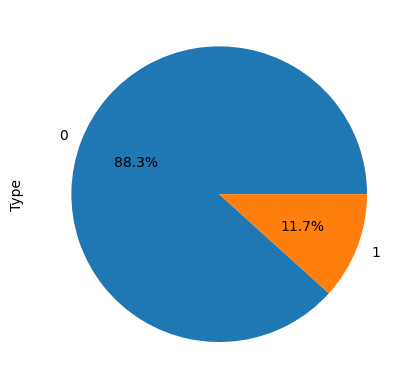

In [17]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')

In [18]:
dfyes = df[df['y'] == 1]
dfno = df[df['y'] == 0]

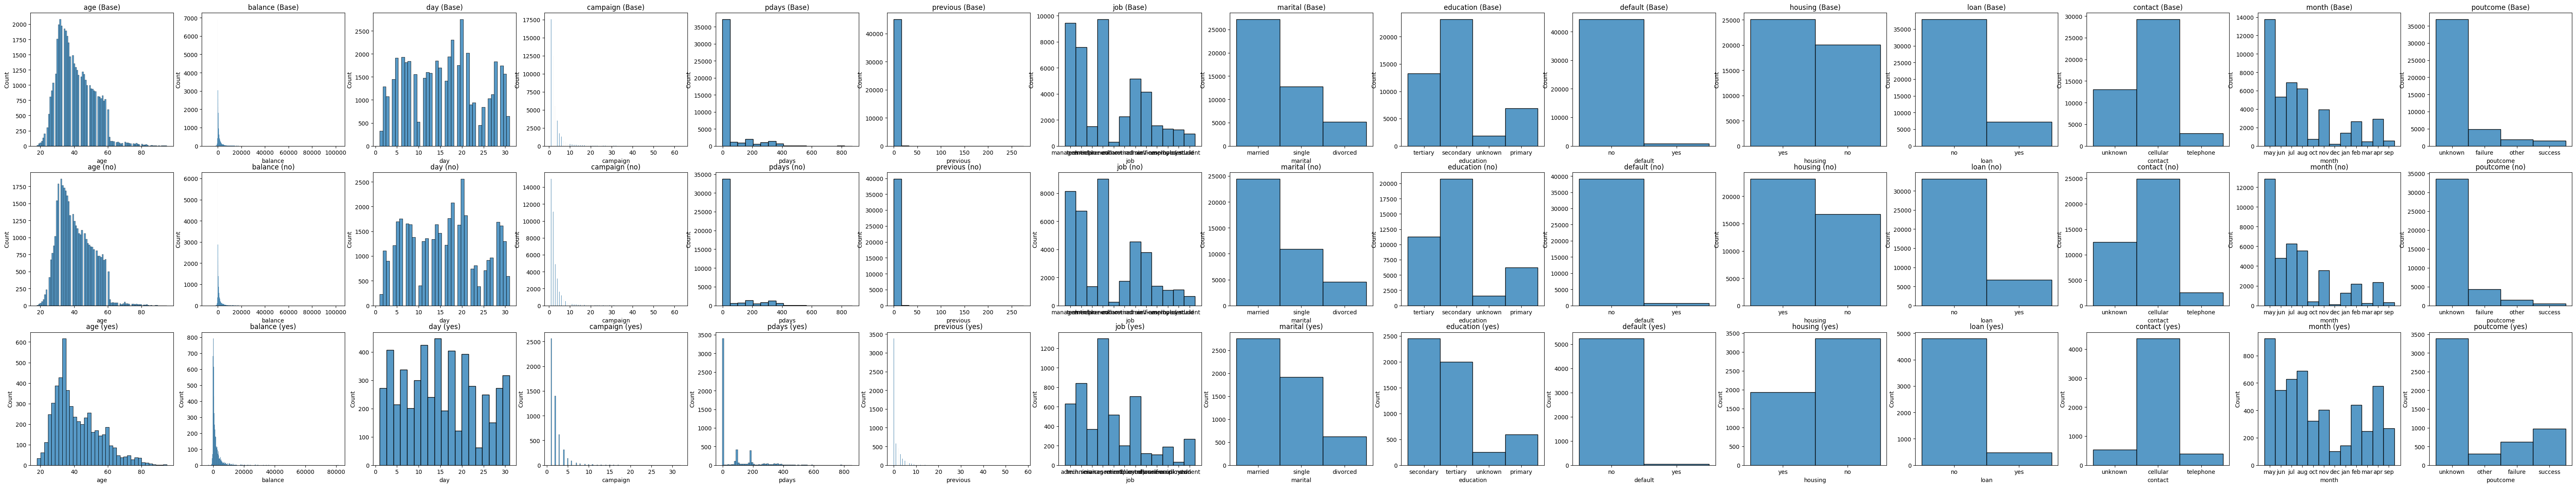

In [19]:
plt.figure(figsize=(80, 80))
for idx, col in enumerate(df.columns):
    if col != 'y':
        plt.subplot(16, 15, idx+1)
        sns.histplot(df[col], kde=False)
        plt.title(col + ' (Base)')
for idx, col in enumerate(dfyes.columns):
    if col != 'y':
        plt.subplot(16, 15, idx+len(dfno.columns))
        sns.histplot(dfno[col], kde=False)
        plt.title(col + ' (no)')
for idx, col in enumerate(dfno.columns):
    if col != 'y':
        plt.subplot(16, 15, idx+(len(dfno.columns)*2)-1)
        sns.histplot(dfyes[col], kde=False)
        plt.title(col + ' (yes)')
plt.savefig('img/AllHists.png', bbox_inches='tight')

From here, we will be taking some features that are noticeably different when plotting against output to re-plot it for better visualization.

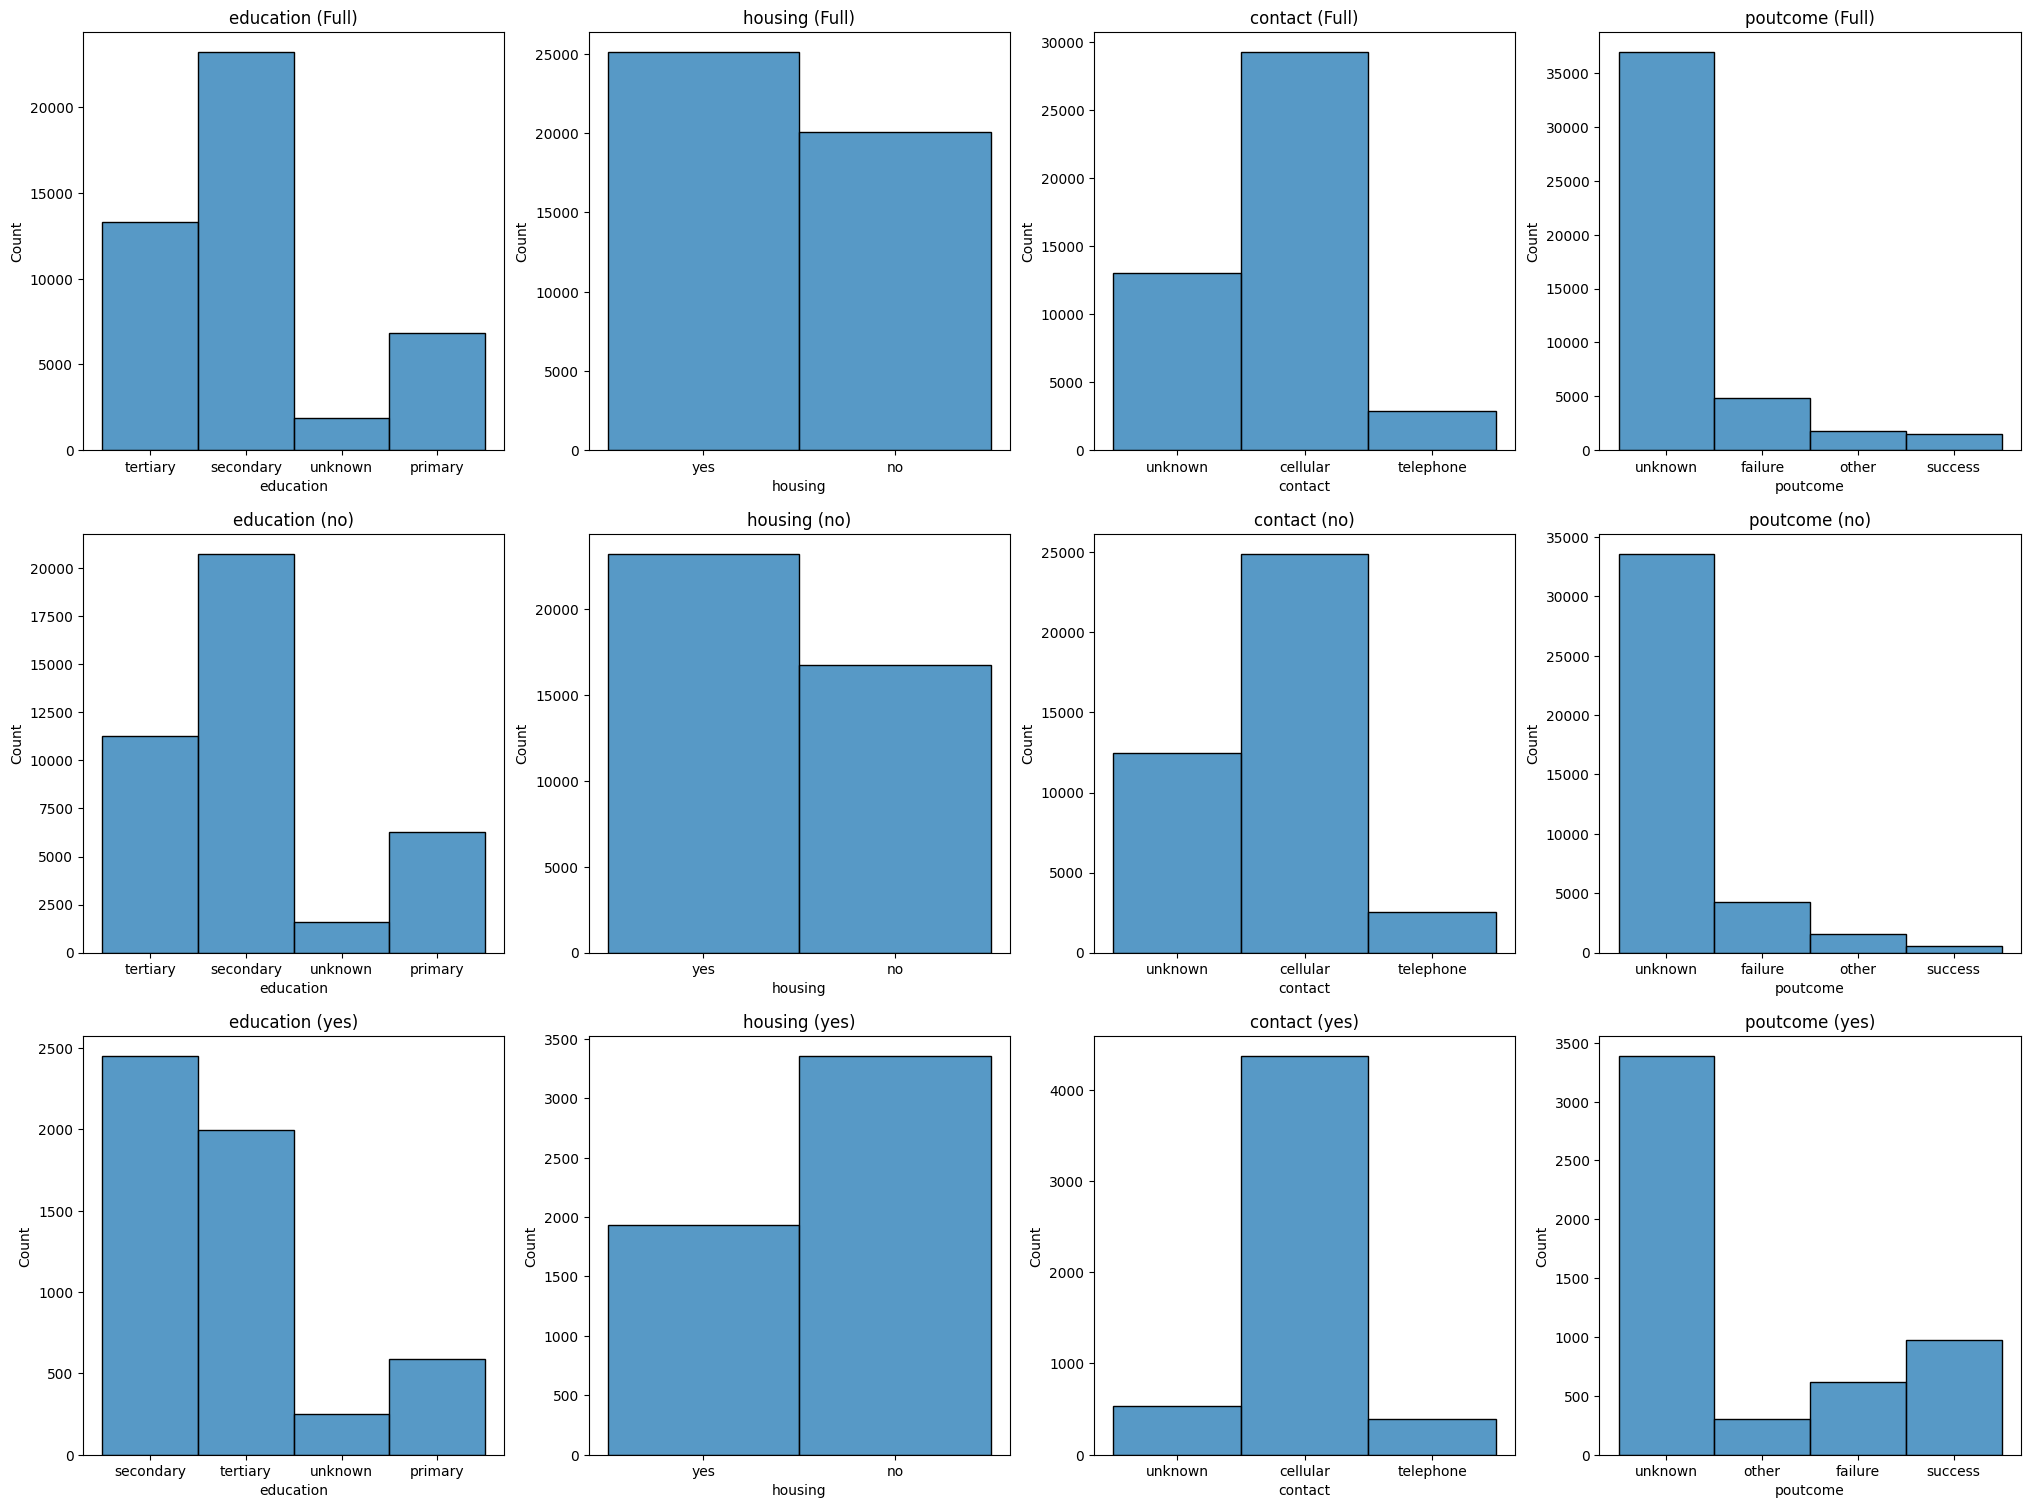

In [20]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
plt.figure(figsize=(25,25))
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1)
    sns.histplot(df[col], kde=False)
    plt.title(col + ' (Full)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+len(colToPlot)+1)
    sns.histplot(dfno[col], kde=False)
    plt.title(col + ' (no)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1+(len(colToPlot)*2))
    sns.histplot(dfyes[col], kde=False)
    plt.title(col + ' (yes)')
plt.savefig('img/SelectedHists.png', bbox_inches='tight')

We can see that these features have different charts when plotting against each output. Features plotted against output 'yes' have different bar charts compared to features plotted against all output data while features plotted against output 'no' has the same bar charts.

|Feature Names|Information|
|-|-|
|education|The client with 'secondary' education level has more chance to subscribe a term deposit|
|housing|The client with 'no' housing loan has more chance to subscribe a term deposit|
|contact|The client with 'unknown' communication type has more chance not to subscribe a term deposit|
|poutcome|The client with 'success' outcome of the previous marketing campaign has more chance to subscribe a term deposit|

#### **Pairplotting Data Samples**

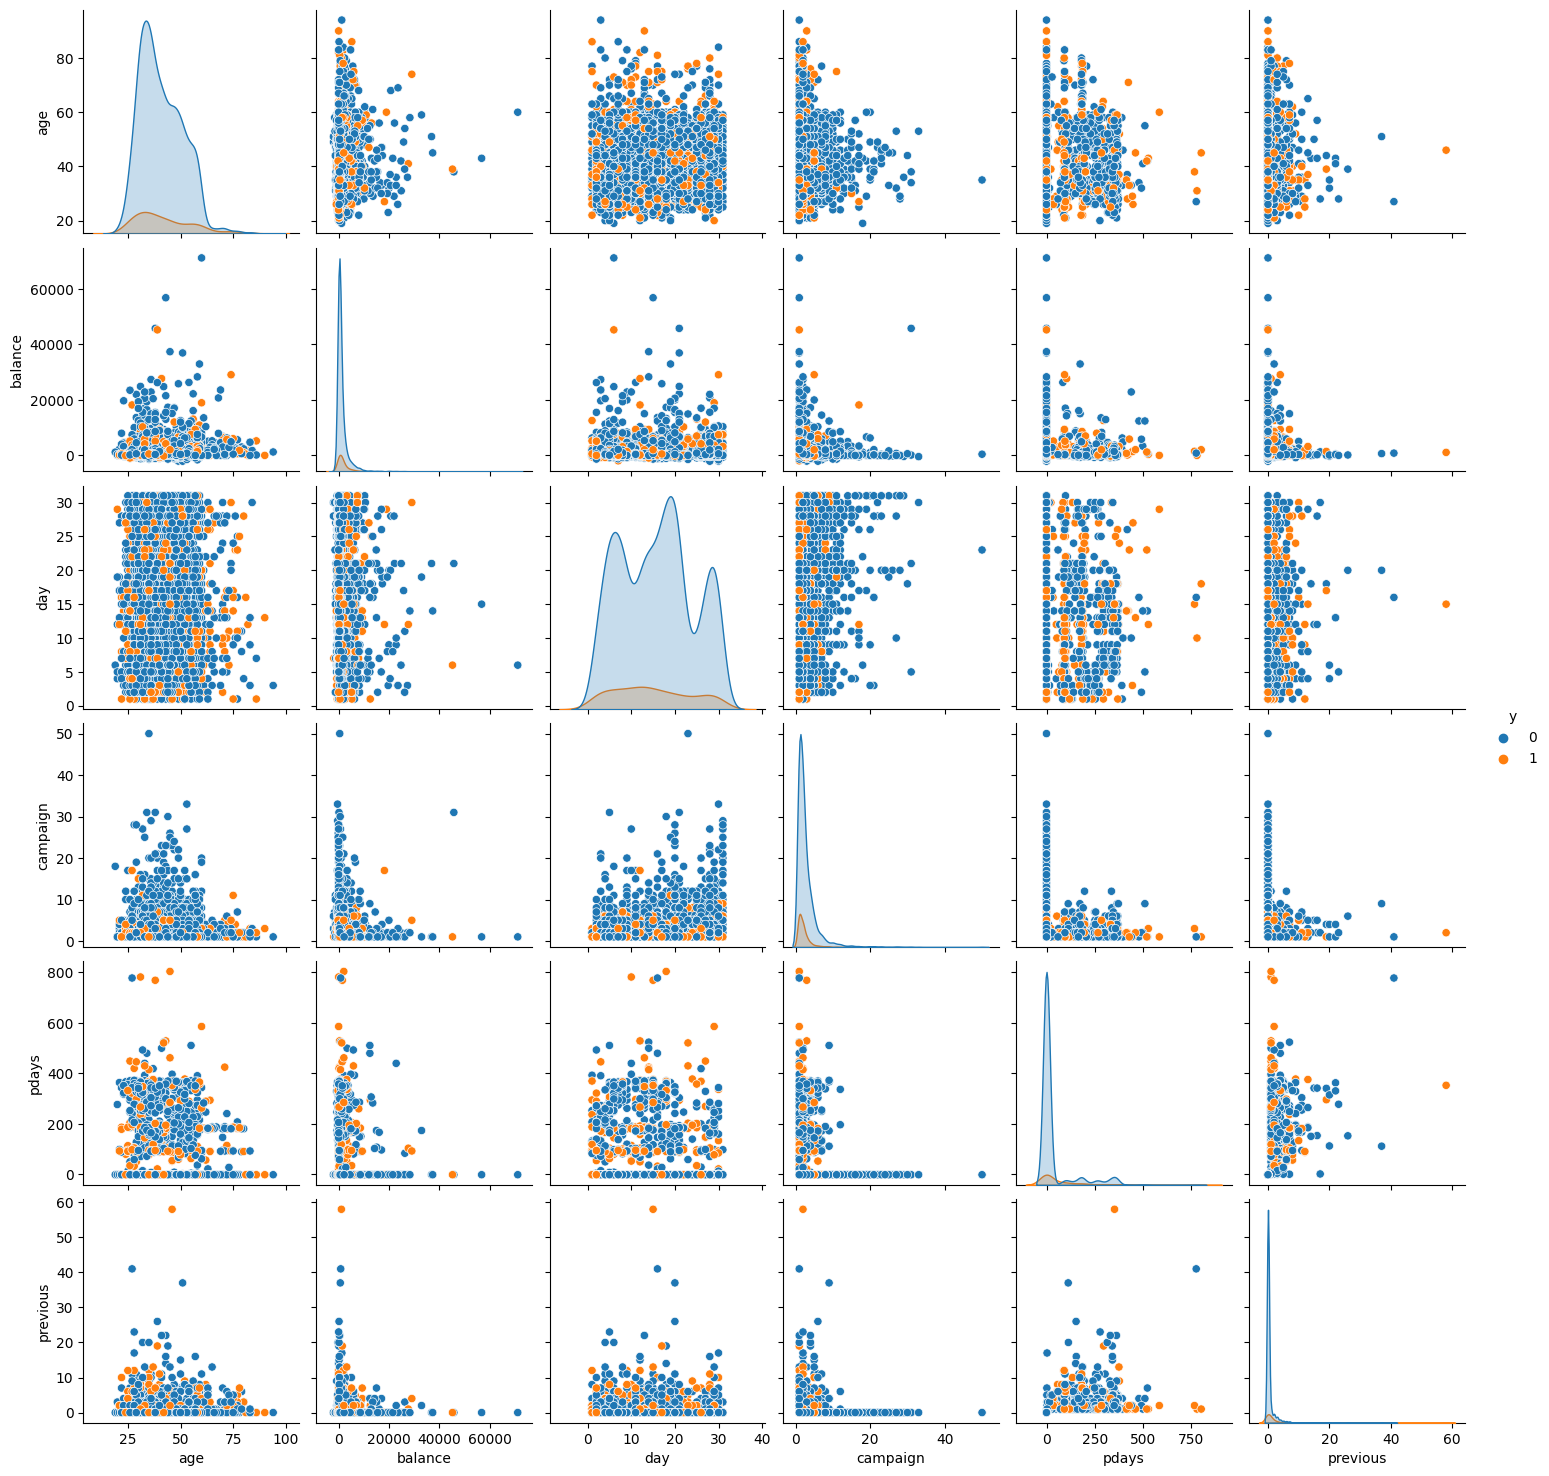

In [21]:
sns.pairplot(df.sample(int(df.shape[0]/10), random_state=777), diag_kind="kde", hue='y')
plt.savefig('img/PairplotSample.png', bbox_inches='tight')

As we can see when pairplotting, variance between features are quite low, so that we can't see the difference between 'no' and 'yes' output, variance within class are quite high in some feature.

#### **Check for Outliers**

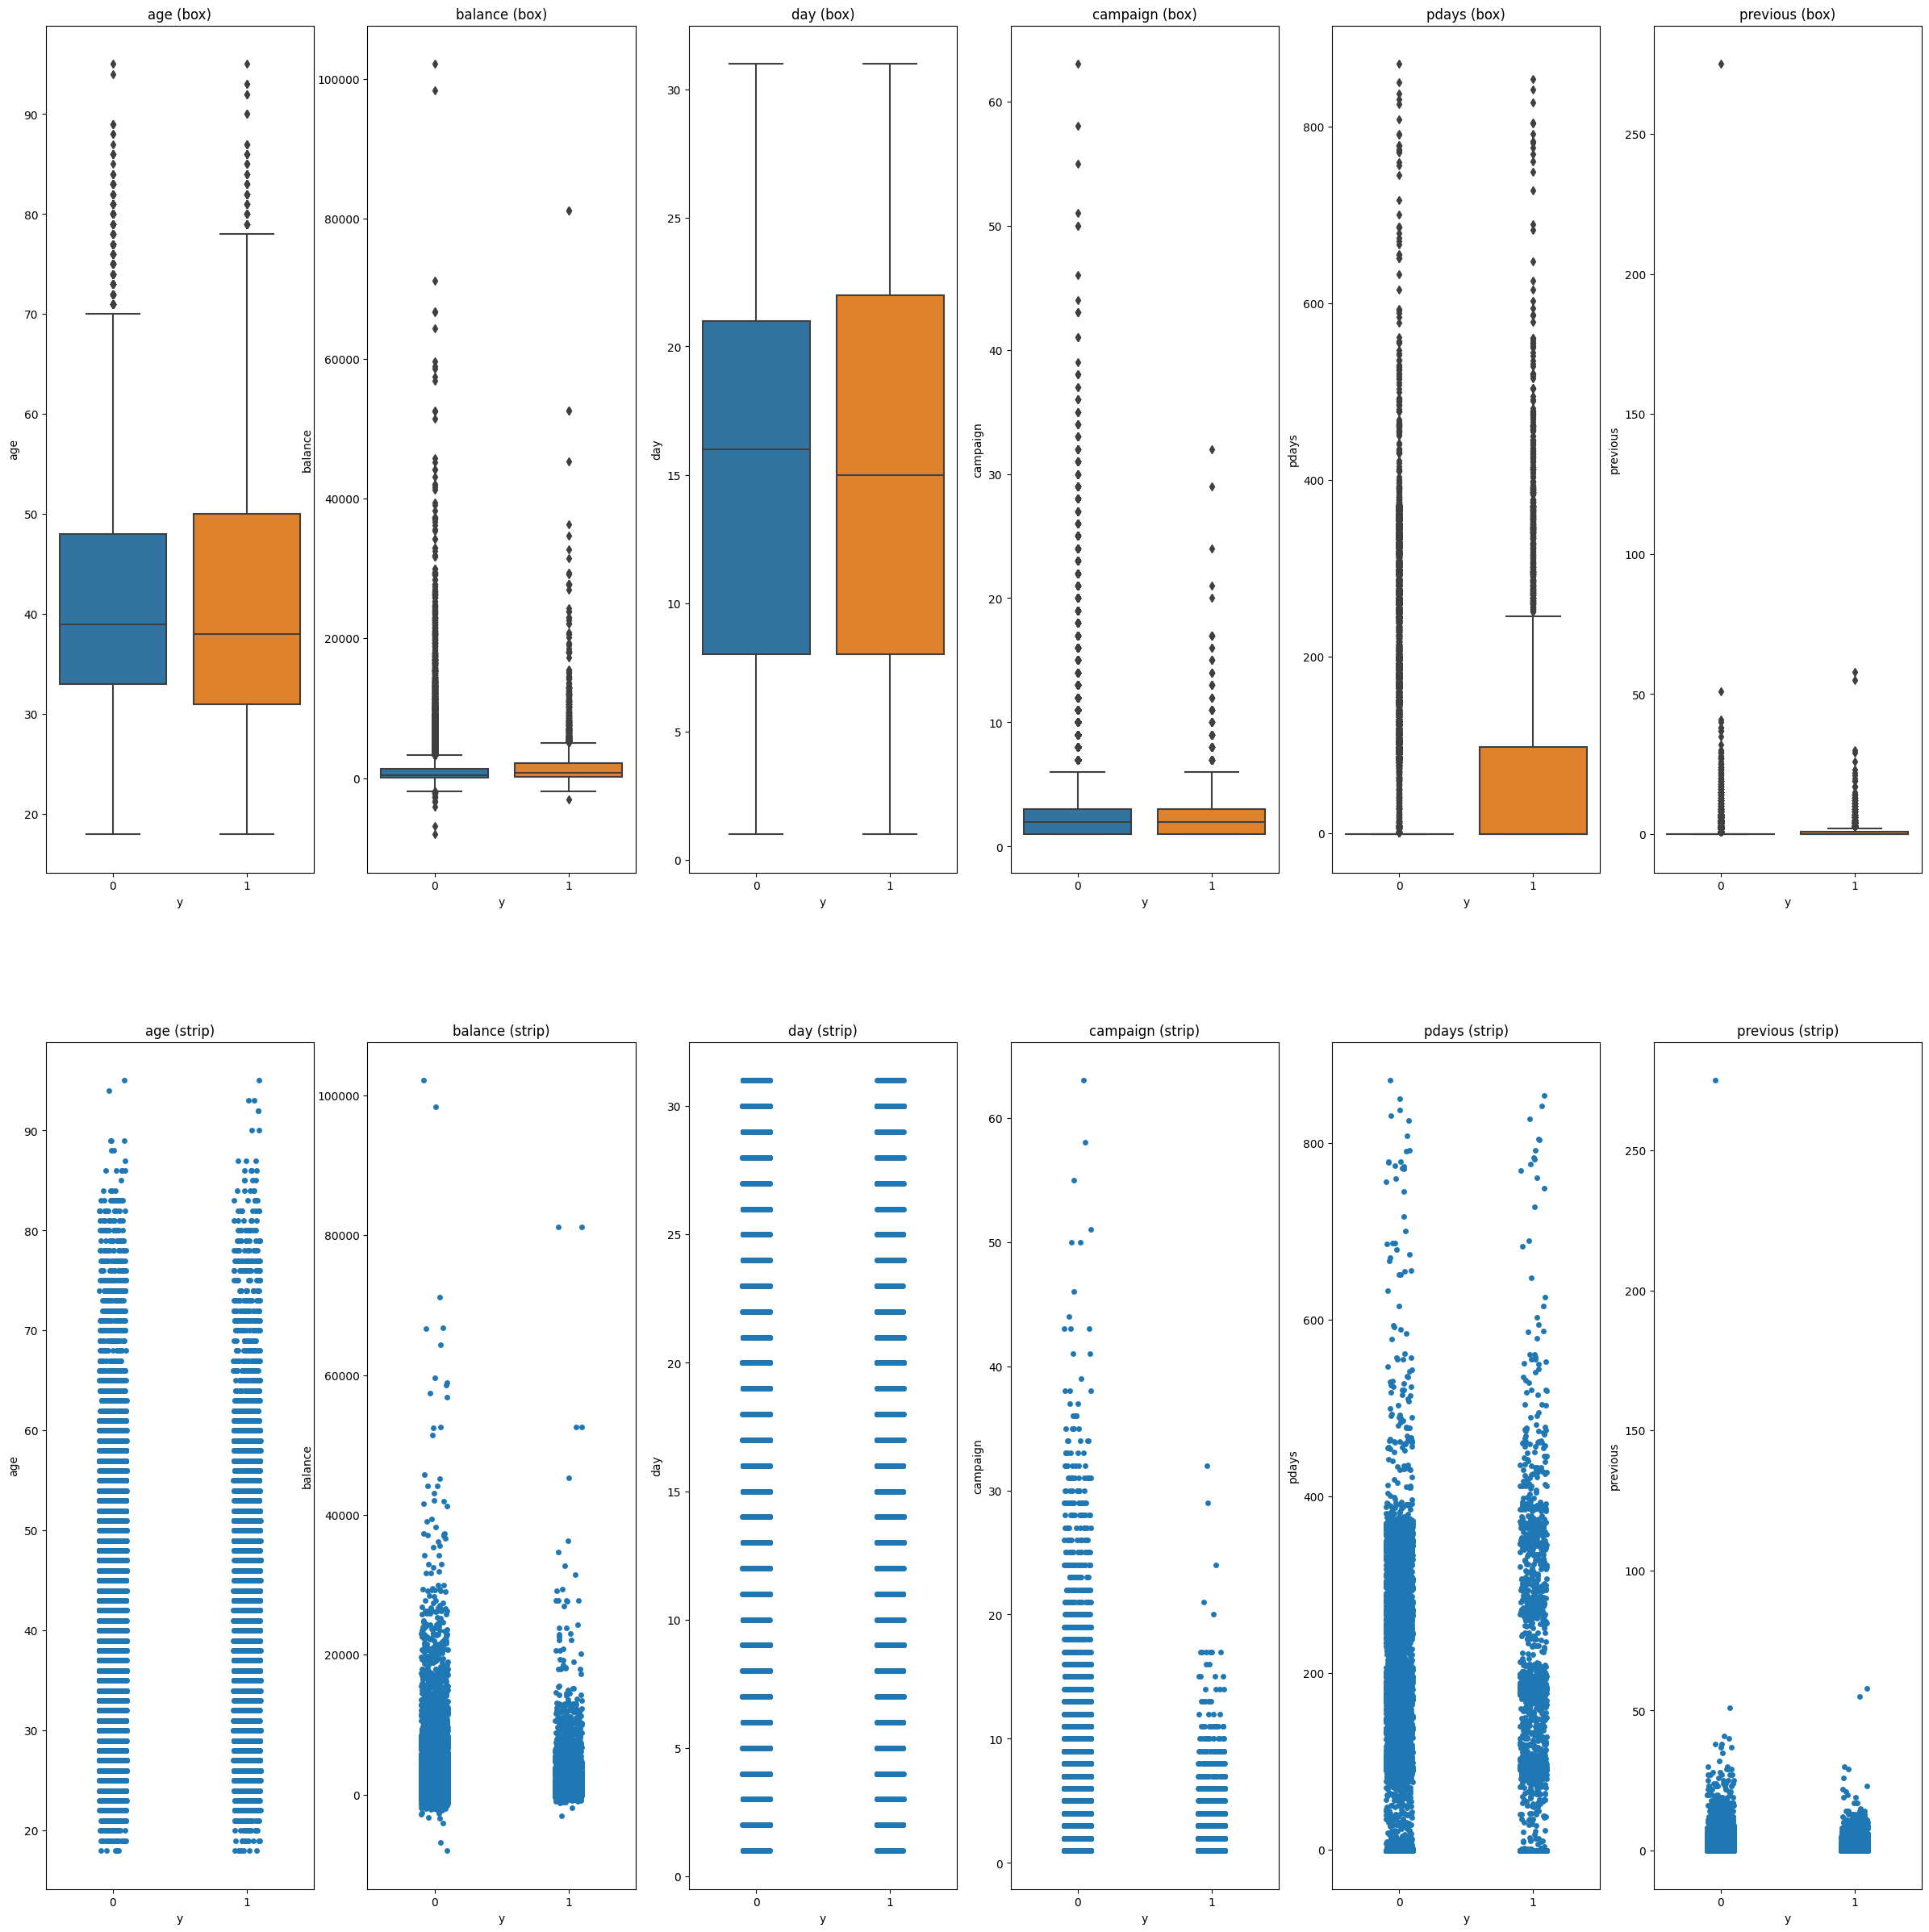

In [22]:
plt.figure(figsize=(30,30))
for idx, col in enumerate(dfNum.columns):
    plt.subplot(2, 6, idx+1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(col + ' (box)')
for idx, col in enumerate(dfNum.columns):
    plt.subplot(2, 6, idx+len(dfNum.columns)+1)
    sns.stripplot(x="y", y=col, data=df)    
    plt.title(col + ' (strip)')
plt.savefig('img/BoxStrip.png', bbox_inches='tight')

From the plot above, outliers can be seen in the following features:
- balance
- campaign
- previous

We will remove the outliers at the start of data preprocessing.

### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

Bad things of this dataset:

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome' Features|This feature's data are mostly 'unknown' (around 81.7%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high in some feature, which means that data variation is very bad.|
|Output data|The output is imbalanced. ('1' is 11.7% and '0' is 88.3%)|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

<hr>

### **Benchmarking** (before data preprocessing)

In [23]:
#get the dummy variables for the categorical 
dfBM = df.copy()
dfBM = pd.get_dummies(dfBM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xBM = dfBM.drop(['y'], axis = 1)
yBM = dfBM['y']

xBM_train, xBM_test, yBM_train, yBM_test = train_test_split(xBM, yBM, test_size = 0.2, random_state = 0)

### **Decision Tree Classifier**

In [24]:
DT_clf = DecisionTreeClassifier(random_state=0)
DT_clf.fit(xBM_train,yBM_train)
print('Train score: ', DT_clf.score(xBM_train, yBM_train))
print('Test score: ', DT_clf.score(xBM_test, yBM_test))

Train score:  1.0
Test score:  0.8277464321274477


#### **Predict using Test Data**

In [25]:
yDT_pred_test = DT_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7950
           1       0.30      0.31      0.31      1089

    accuracy                           0.83      9039
   macro avg       0.60      0.61      0.60      9039
weighted avg       0.83      0.83      0.83      9039

Confusion matrix on Test data
[[7139  811]
 [ 746  343]]


### **Multi-Layer Perceptron Classifier**

In [26]:
MLP_clf = MLPClassifier(random_state=1)
MLP_clf.fit(xBM_train,yBM_train)
print('Train score: ', MLP_clf.score(xBM_train, yBM_train))
print('Test score: ', MLP_clf.score(xBM_test, yBM_test))

Train score:  0.8906405575838036
Test score:  0.8860493417413431


#### **Predict using Test Data**

In [27]:
yMLP_pred_test = MLP_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7950
           1       0.67      0.11      0.18      1089

    accuracy                           0.89      9039
   macro avg       0.78      0.55      0.56      9039
weighted avg       0.86      0.89      0.85      9039

Confusion matrix on Test data
[[7894   56]
 [ 974  115]]


### **K-Nearest Neighbors**

In [147]:
KN_clf = KNeighborsClassifier(n_jobs=-1)
KN_clf.fit(xBM_train,yBM_train)
print('Train score: ', KN_clf.score(xBM_train, yBM_train))
print('Test score: ', KN_clf.score(xBM_test, yBM_test))

Train score:  0.8962827746432127
Test score:  0.8769775417634694


#### **Predict using Test Data**

In [148]:
yKN_pred_test = KN_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yKN_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7950
           1       0.46      0.12      0.20      1089

    accuracy                           0.88      9039
   macro avg       0.68      0.55      0.56      9039
weighted avg       0.84      0.88      0.84      9039

Confusion matrix on Test data
[[7791  159]
 [ 953  136]]


### **Benchmark Score**

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.91|0.90|0.90|0.83|Decision Tree|Test Data|
|1|0.30|0.31|0.31|^|Decision Tree|Test Data|
|0|0.89|0.99|0.94|0.89|MLP|Test Data|
|1|0.67|0.11|0.18|^|MLP|Test Data|
|0|0.89|0.98|0.93|0.88|K-Nearest|Test Data|
|1|0.46|0.12|0.20|^|K-Nearest|Test Data|

<hr>

## **Data Preprocessing**

### **Experiment 1 : Remove Outliers**

#### **Hypothesis**
    
Outliers in features affects model's performance.

From the figure,

<img src='img/BoxStrip.png'/>

we will be removing outliers from the following features:
- balance
- campaign
- previous

In [231]:
dfEX1 = df.copy()

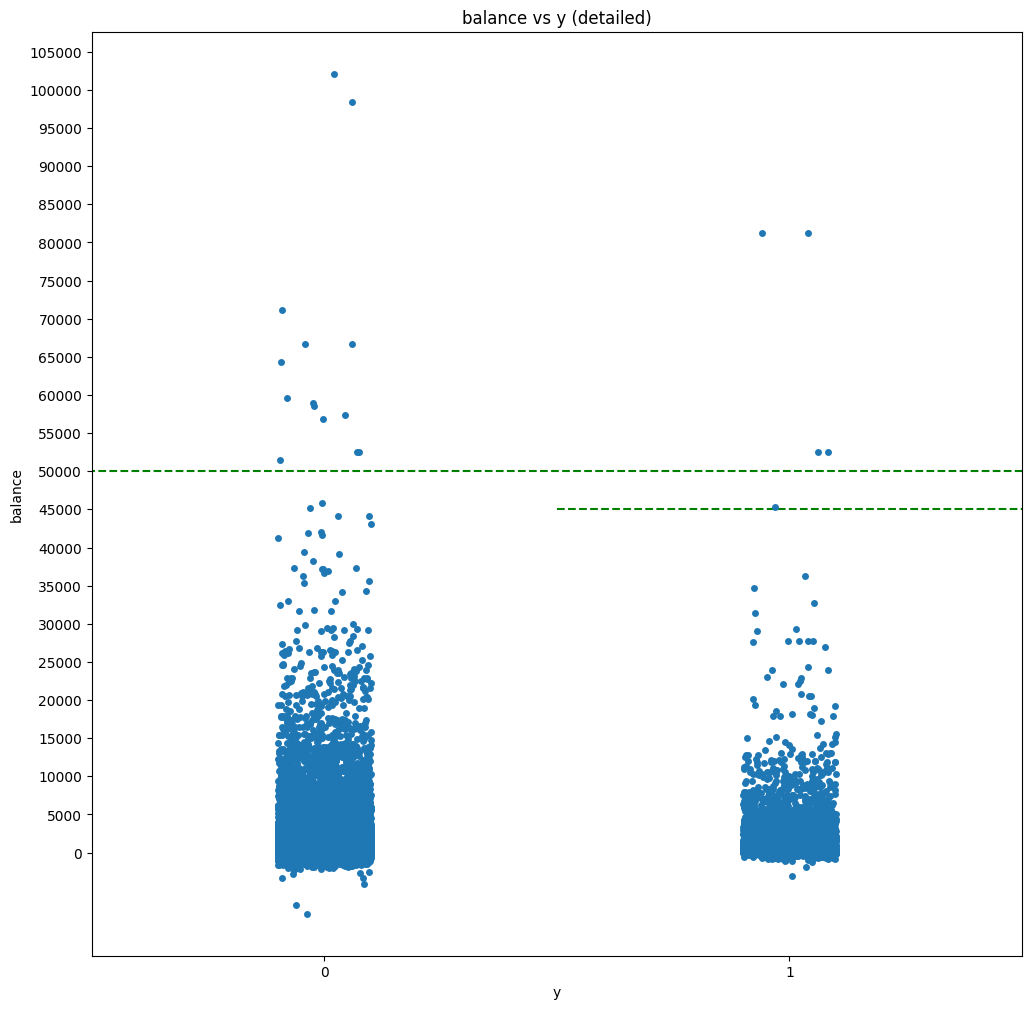

In [234]:
plt.figure(figsize=(12, 12))
plt.title('balance vs y (detailed)')
plt.yticks(np.arange(0, 120000, 5000))
plt.plot(np.arange(-1, 3, 1), np.full(4, 50000), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 45000), 'g--')
sns.stripplot(x="y", y="balance", data=dfEX1)
plt.savefig('img/balance-y-detailed.png', bbox_inches='tight')

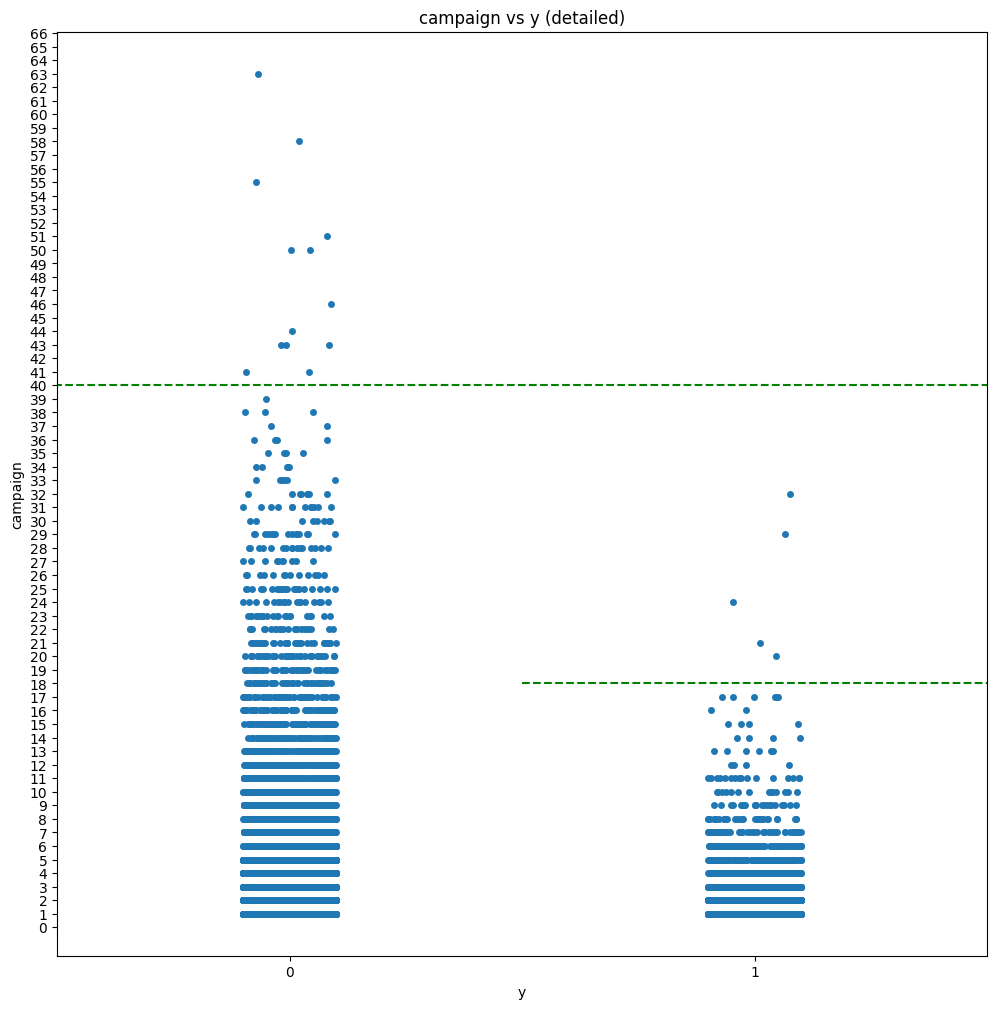

In [233]:
plt.figure(figsize=(12, 12))
plt.title('campaign vs y (detailed)')
plt.yticks(np.arange(0, 70, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 40), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 18), 'g--')
sns.stripplot(x="y", y="campaign", data=dfEX1)
plt.savefig('img/campaign-y-detailed.png', bbox_inches='tight')

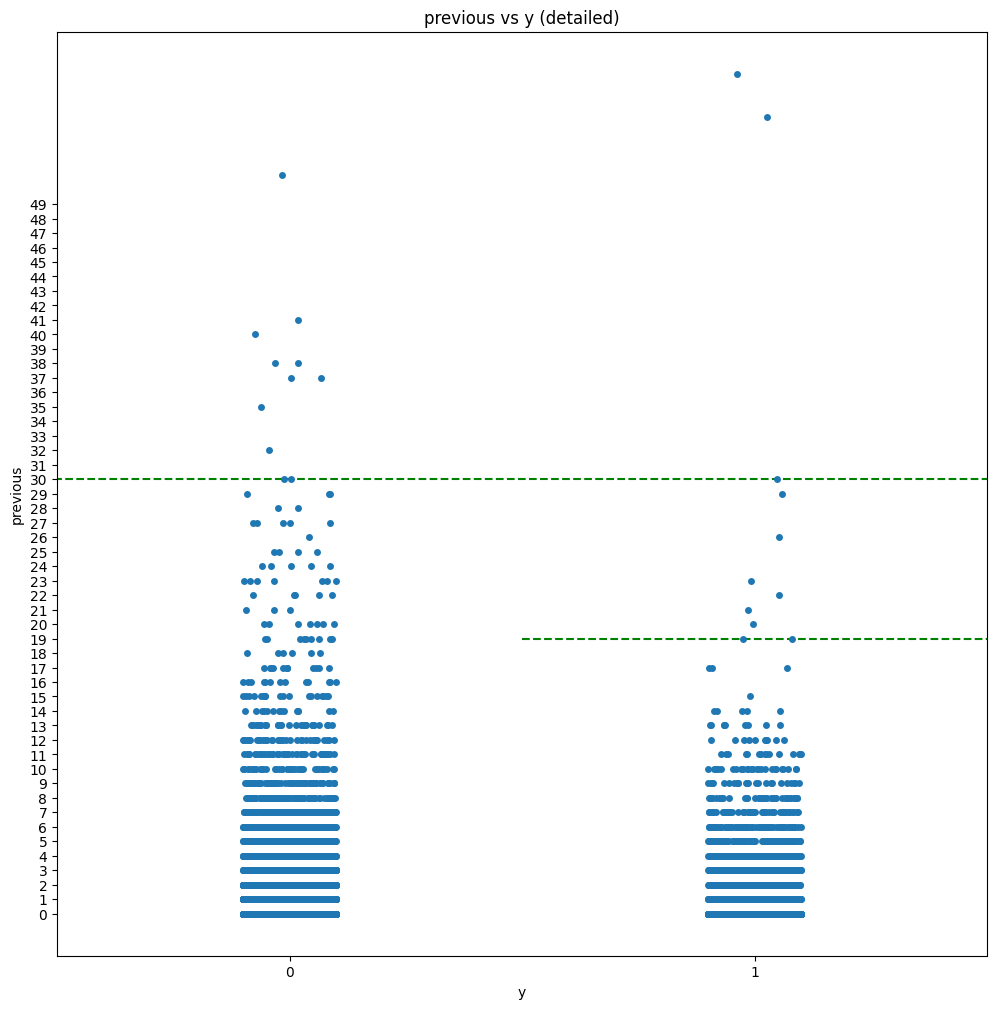

In [235]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] > 60].index)
plt.figure(figsize=(12, 12))
plt.title('previous vs y (detailed)')
plt.yticks(np.arange(0, 50, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 30), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 19), 'g--')
sns.stripplot(x="y", y="previous", data=dfEX1)
plt.savefig('img/previous-y-detailed.png', bbox_inches='tight')

In [236]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 50000].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 45000].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 40].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 18].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 30].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 19].index & dfEX1[dfEX1['y'] == 1].index)

dfEX1.shape

(45135, 16)

After removing outliers, we are left with <u>**45135 instances**</u> (originally 45211 instances).

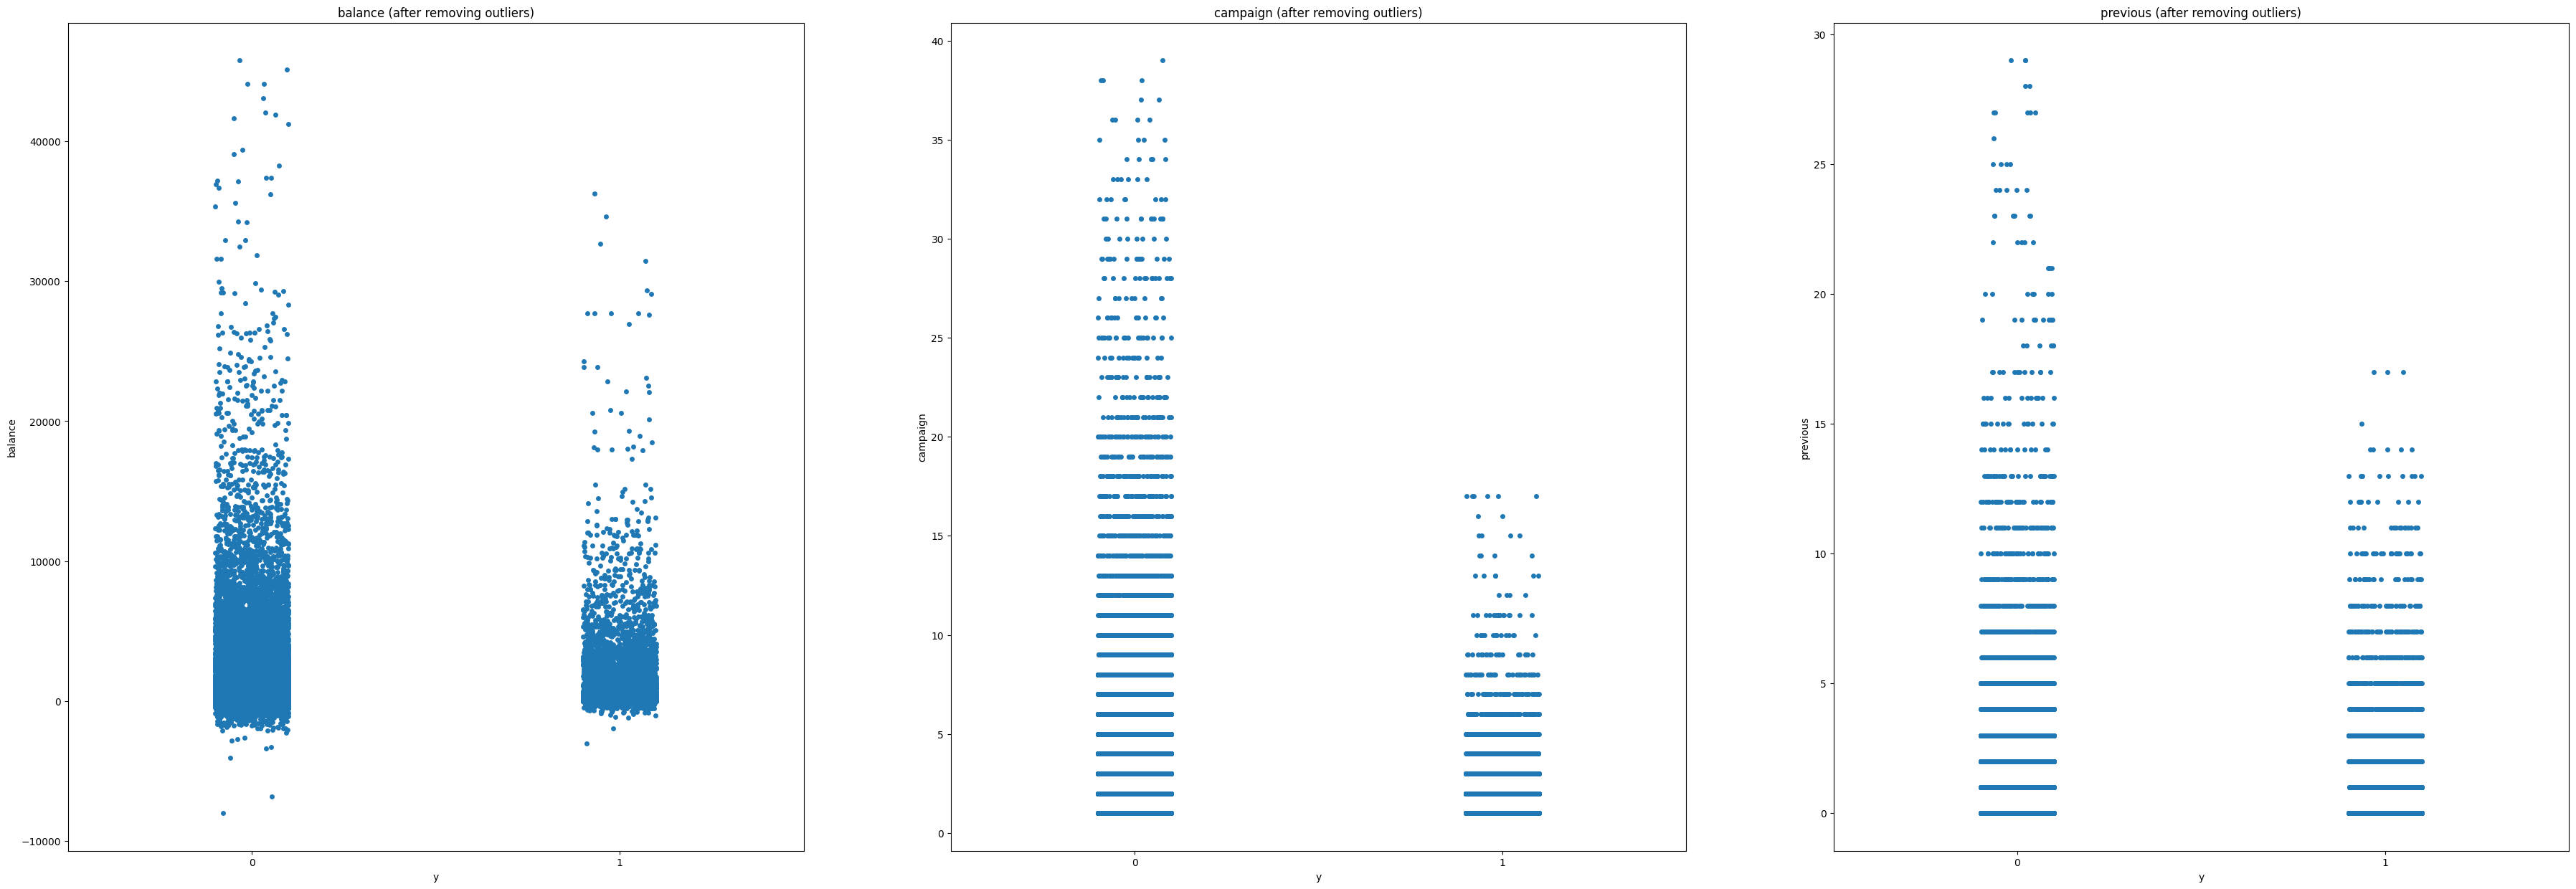

In [237]:
plt.figure(figsize=(45, 15))
for idx, col in enumerate(['balance', 'campaign', 'previous']):
    plt.subplot(1, 3, idx+1)
    sns.stripplot(x='y', y=col, data=dfEX1)
    plt.title(col + ' (after removing outliers)')
plt.savefig('img/SelectedHists-After.png', bbox_inches='tight')

<hr>

#### **Benchmarking** (Remove Outliers)

In [238]:
#get the dummy variables for the categorical 
dfEX1_BM = dfEX1.copy()
dfEX1_BM = pd.get_dummies(dfEX1_BM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xEX1 = dfEX1_BM.drop(['y'], axis = 1)
yEX1 = dfEX1_BM['y']

xEX1_train, xEX1_test, yEX1_train, yEX1_test = train_test_split(xEX1, yEX1, test_size = 0.2, random_state = 0)

##### **Decision Tree Classifier**

In [239]:
DT_clf_Ex1 = DecisionTreeClassifier(random_state=0)
DT_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', DT_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', DT_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  1.0
Test score:  0.8360474133156087


In [240]:
yDT_pred_test = DT_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7989
           1       0.31      0.34      0.32      1038

    accuracy                           0.84      9027
   macro avg       0.61      0.62      0.61      9027
weighted avg       0.84      0.84      0.84      9027

Confusion matrix on Test data
[[7194  795]
 [ 685  353]]


##### **Multi-Layer Perceptron Classifier**

In [241]:
MLP_clf_Ex1 = MLPClassifier(random_state=1)
MLP_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', MLP_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', MLP_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  0.8909936856098372
Test score:  0.8909936856098372


In [242]:
yMLP_pred_test = MLP_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7989
           1       0.61      0.14      0.23      1038

    accuracy                           0.89      9027
   macro avg       0.75      0.57      0.59      9027
weighted avg       0.87      0.89      0.86      9027

Confusion matrix on Test data
[[7893   96]
 [ 888  150]]


##### **K-Nearest Neighbors**

In [243]:
KN_clf_Ex1 = KNeighborsClassifier(n_jobs=-1)
KN_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', KN_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', KN_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  0.8966157084302647
Test score:  0.8788080203832945


In [244]:
yKN_pred_test = KN_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yKN_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      7989
           1       0.41      0.13      0.20      1038

    accuracy                           0.88      9027
   macro avg       0.65      0.55      0.57      9027
weighted avg       0.84      0.88      0.85      9027

Confusion matrix on Test data
[[7799  190]
 [ 904  134]]


#### **Conclusion**

From the result of this experiment, we can compare the model's performance before and after removing outliers.

1. Decision Tree  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.91|0.90|0.90|0.83|Decision Tree|Test Data|
|1|0.30|0.31|0.31|^|Decision Tree|Test Data|
|0|0.91|0.90|0.90|0.84|Decision Tree|Test Ex1 Data|
|1|0.31|0.34|0.32|^|Decision Tree|Test Ex1 Data|

2. MLP  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.89|0.99|0.94|0.89|MLP|Test Data|
|1|0.67|0.11|0.18|^|MLP|Test Data|
|0|0.93|0.95|0.94|0.89|MLP|Test Ex1 Data|
|1|0.61|0.14|0.23|^|MLP|Test Ex1 Data|

3. K-Nearest  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.89|0.98|0.93|0.88|K-Nearest|Test Data|
|1|0.46|0.12|0.20|^|K-Nearest|Test Data|
|0|0.89|0.98|0.93|0.88|K-Nearest|Test Ex1 Data|
|1|0.41|0.13|0.20|^|K-Nearest|Test Ex1 Data|

From the result above, we can see that removing outliers from the data can improve the model's performance in Decision Tree and MLP. However, it doesn't improve the model's performance in K-Nearest.Therefore, we will be removing outliers from the data.

In [397]:
df = dfEX1.copy()

### **Experiment 2 : Data Imbalance**

#### **Hypothesis**
    
Imbalance data affects model's performance.

In [246]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

y
0    39867
1     5268
dtype: int64


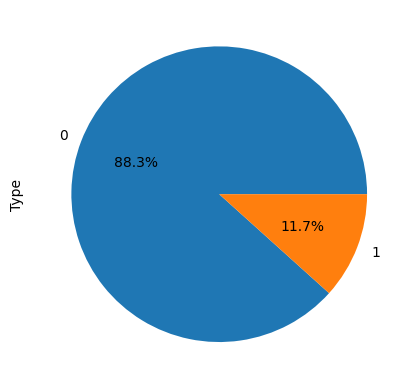

In [247]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(df.groupby('y').size())

In [248]:
dfDI = df.copy()
dfDI = LE_pipeline.fit_transform(dfDI)

xdi_train , xdi_test , ydi_train , ydi_test = train_test_split(dfDI.drop(['y'], axis = 1), dfDI['y'], test_size = 0.2, random_state = 0)

In [249]:
dfDI.head()

age  balance  day  campaign  pdays  previous  default  housing  loan  \
0   58     2143    5         1     -1         0        0        1     0   
1   44       29    5         1     -1         0        0        1     0   
2   33        2    5         1     -1         0        0        1     1   
3   47     1506    5         1     -1         0        0        1     0   
4   33        1    5         1     -1         0        0        0     0   

   month  ...  education_secondary  education_tertiary  education_unknown  \
0      5  ...                    0                   1                  0   
1      5  ...                    1                   0                  0   
2      5  ...                    1                   0                  0   
3      5  ...                    0                   0                  1   
4      5  ...                    0                   0                  1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 37 columns]

So, We consider to use 6 different methods to address the imbalance data problem.
1. Random Oversampling
2. SMOTE
3. ADASYN
4. Random Undersampling
5. InstanceHardnessThreshold
6. NearMiss

#### **Random Oversampling**

In [251]:
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(xdi_train, ydi_train)
dfDI_Ros = pd.concat([x_ros, y_ros], axis=1)

y
0    31878
1    31878
dtype: int64


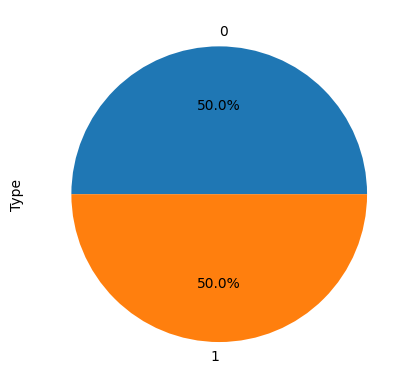

In [252]:
dfDI_Ros.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_Ros.groupby('y').size())

#### **SMOTE**

In [253]:
smote = SMOTE(random_state=0)
x_su, y_su = smote.fit_resample(xdi_train, ydi_train)
dfDI_SM = pd.concat([x_su, y_su], axis=1)

y
0    31878
1    31878
dtype: int64


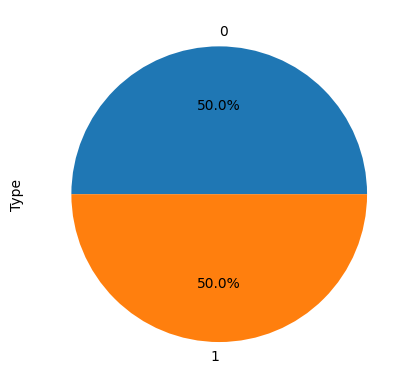

In [254]:
dfDI_SM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_SM.groupby('y').size())

#### **ADASYN**

In [255]:
adasyb = ADASYN(random_state=0)
x_ad, y_ad = adasyb.fit_resample(xdi_train, ydi_train)
dfDI_AD = pd.concat([x_ad, y_ad], axis=1)

y
0    31878
1    31144
dtype: int64


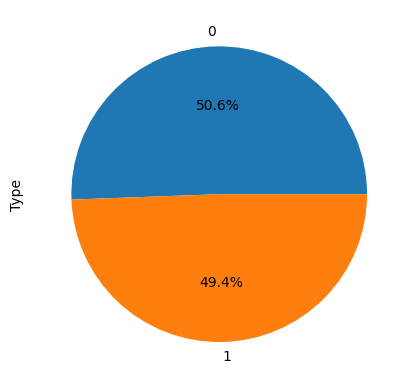

In [256]:
dfDI_AD.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_AD.groupby('y').size())

#### **Random Undersampling**

In [257]:
rus = RandomUnderSampler(random_state=0)
x_rus , y_rus = rus.fit_resample(xdi_train, ydi_train)
dfDI_RUS = pd.concat([x_rus, y_rus], axis=1)

y
0    4230
1    4230
dtype: int64


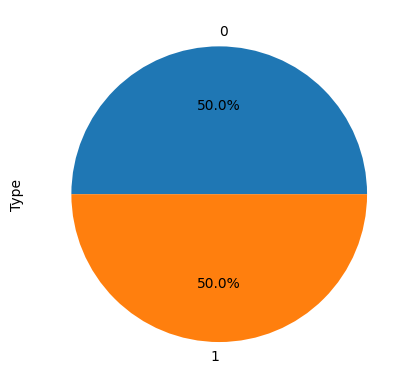

In [258]:
dfDI_RUS.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_RUS.groupby('y').size())

#### **Instance Hardness Threshold**

In [259]:
instanace = InstanceHardnessThreshold(n_jobs=-1)
x_iht , y_iht = instanace.fit_resample(xdi_train, ydi_train)
dfDI_IHT = pd.concat([x_iht, y_iht], axis=1)

y
0    5618
1    4230
dtype: int64


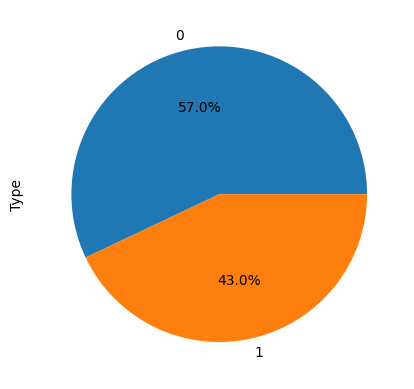

In [260]:
dfDI_IHT.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_IHT.groupby('y').size())

#### **NearMiss**

In [261]:
nearMiss = NearMiss(n_jobs=-1)
x_nearM , y_nearM = nearMiss.fit_resample(xdi_train, ydi_train)
dfDI_NearM = pd.concat([x_nearM, y_nearM], axis=1)

y
0    4230
1    4230
dtype: int64


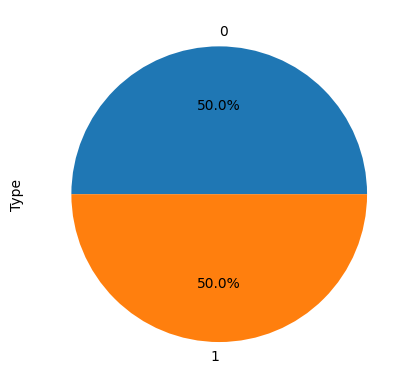

In [262]:
dfDI_NearM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_NearM.groupby('y').size())

#### **Histogram Comparison**

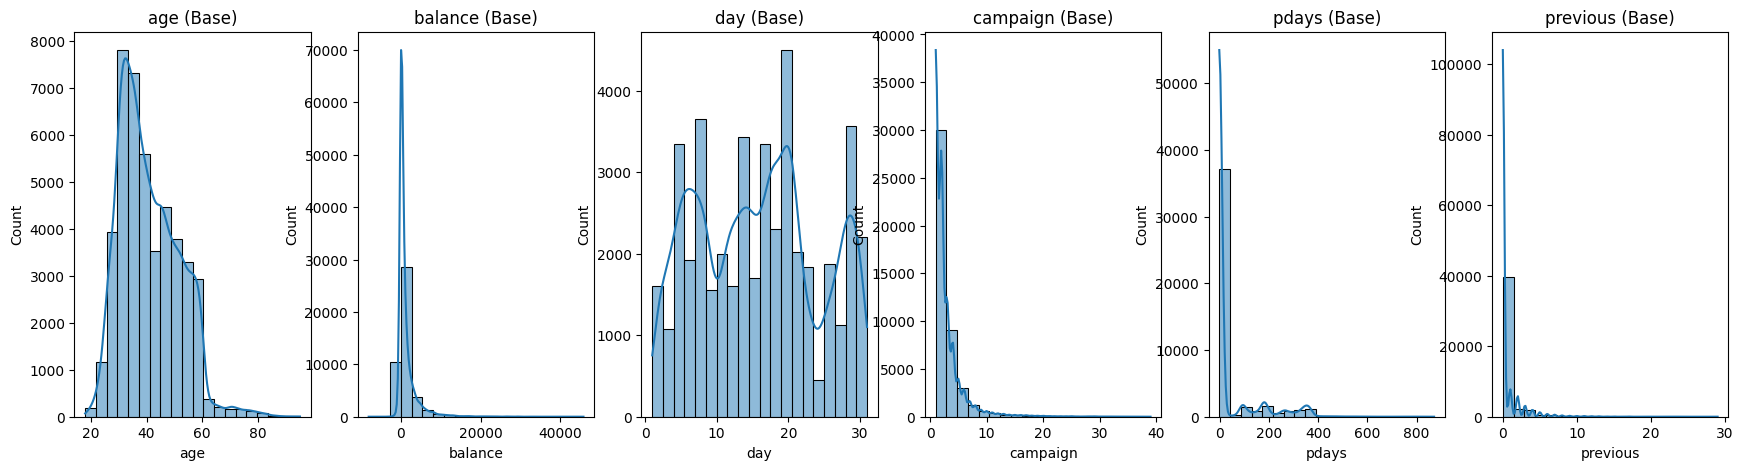

In [263]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

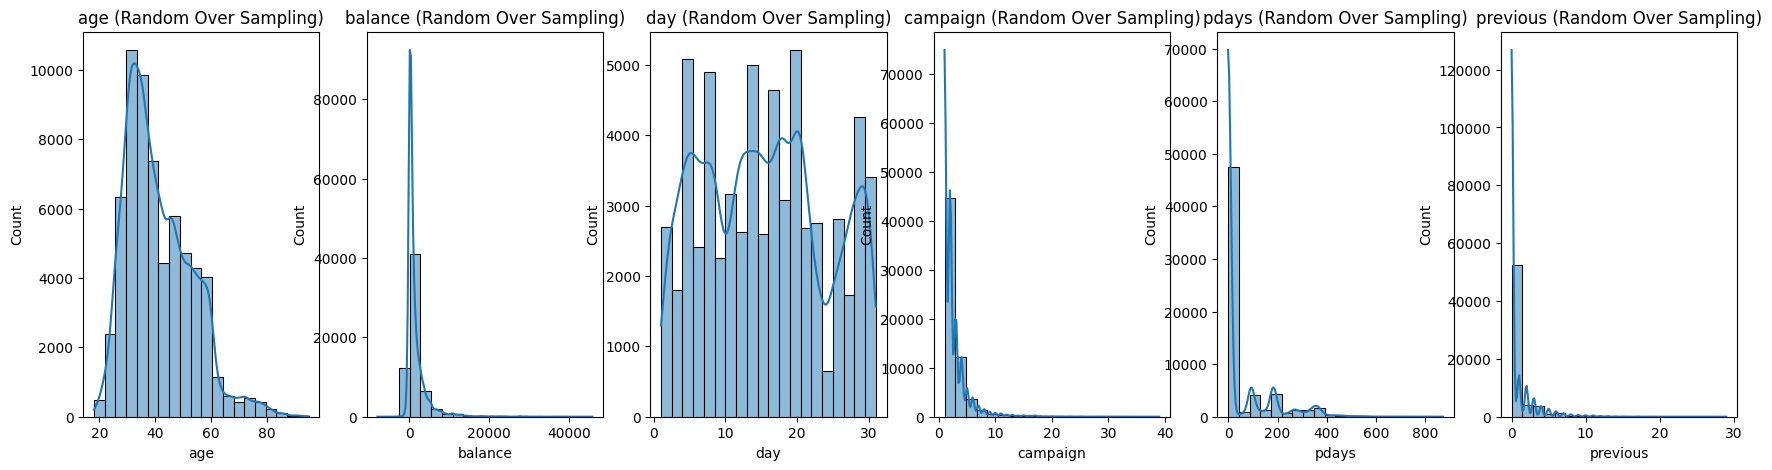

In [264]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_Ros[col], kde=True,bins=20)
        plt.title(col + ' (Random Over Sampling)')

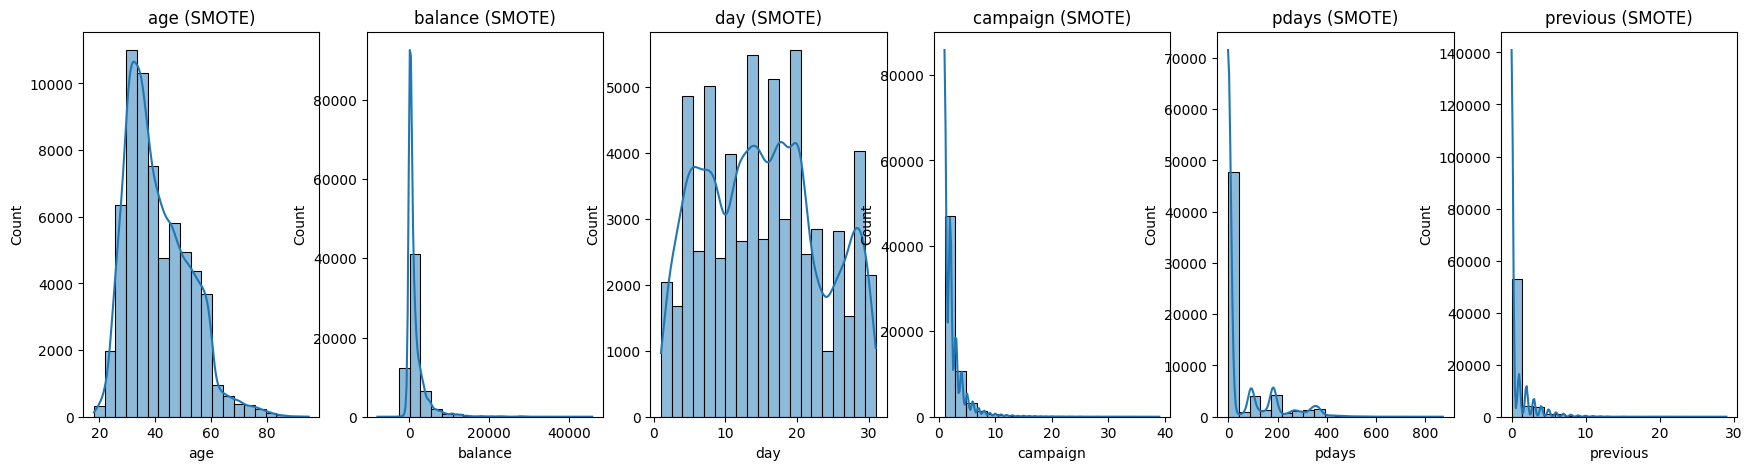

In [265]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_SM[col], kde=True,bins=20)
        plt.title(col + ' (SMOTE)')

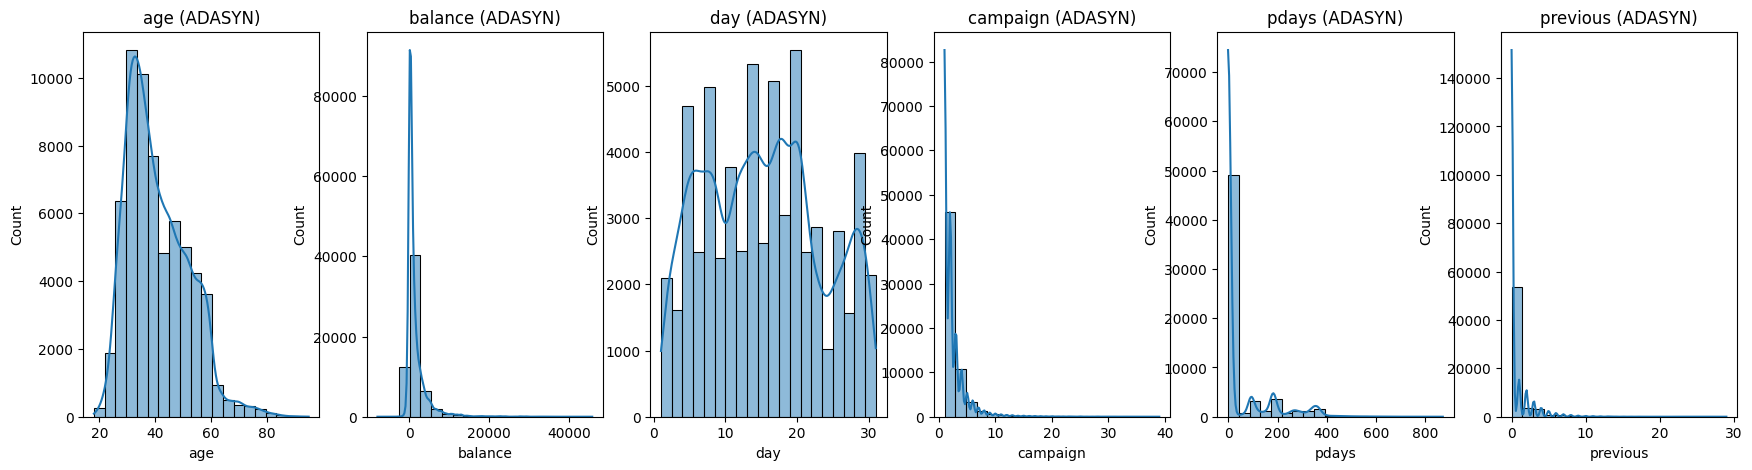

In [266]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_AD[col], kde=True,bins=20)
        plt.title(col + ' (ADASYN)')

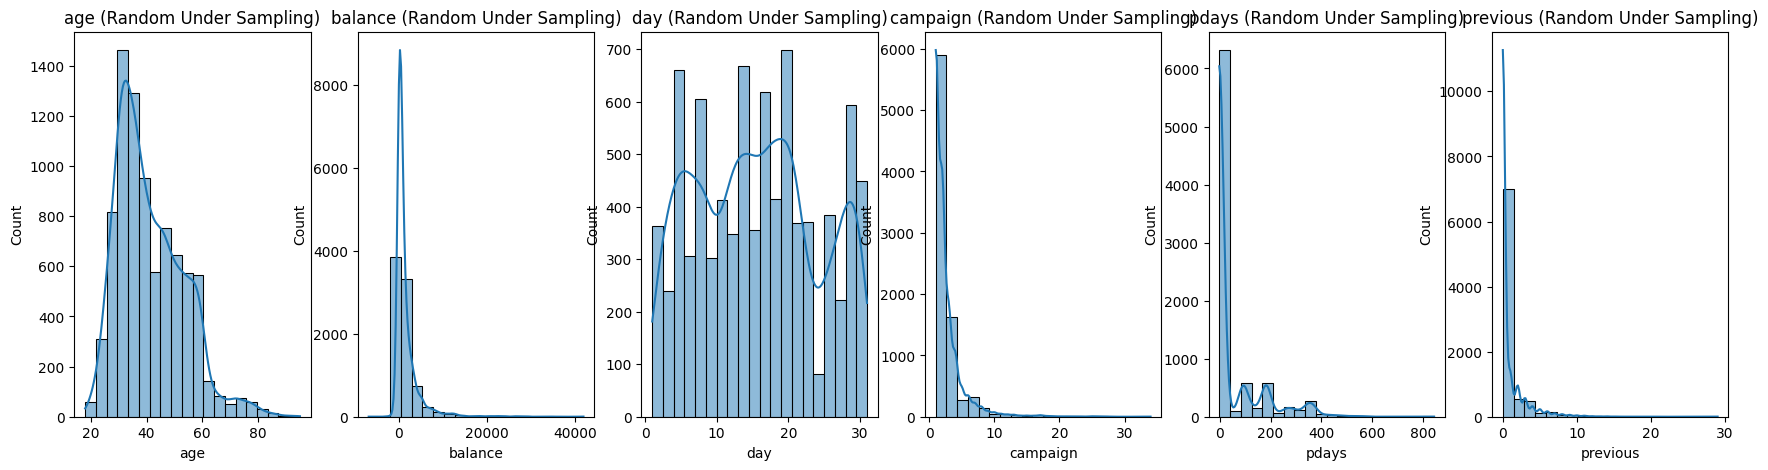

In [267]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_RUS[col], kde=True,bins=20)
        plt.title(col + ' (Random Under Sampling)')

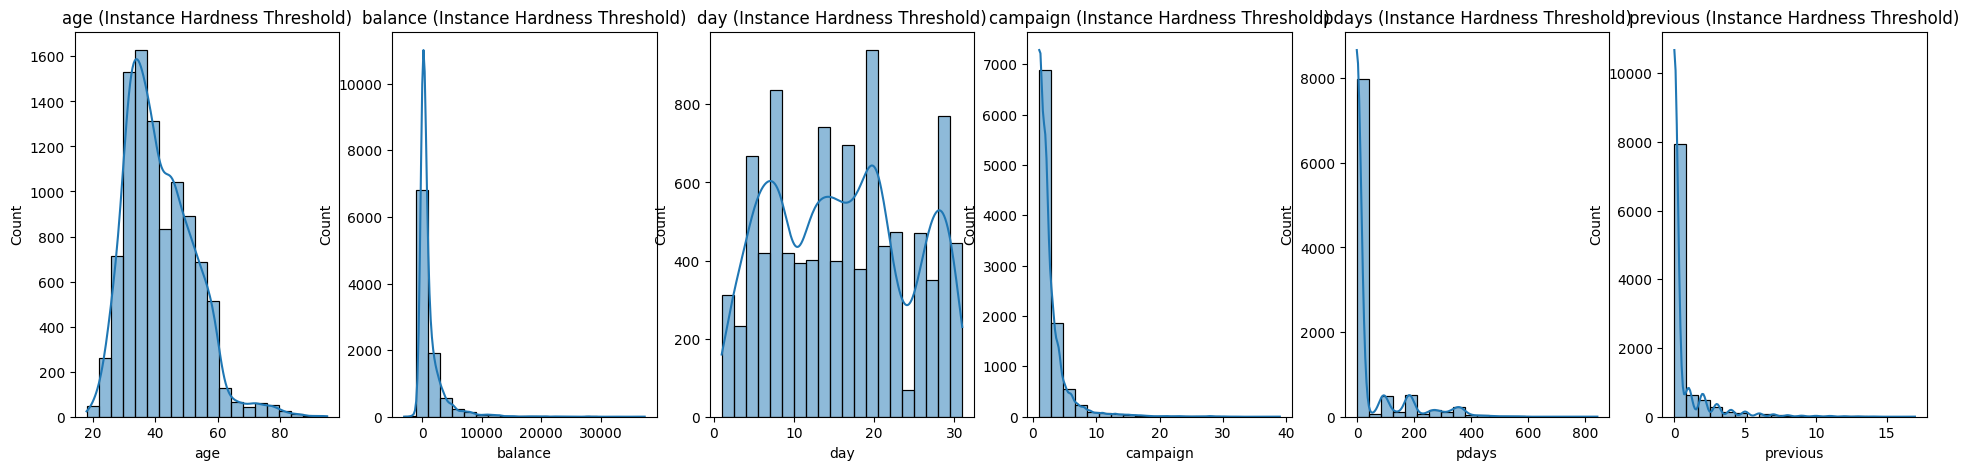

In [268]:
plt.figure(figsize=(28, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_IHT[col], kde=True,bins=20)
        plt.title(col + ' (Instance Hardness Threshold)')

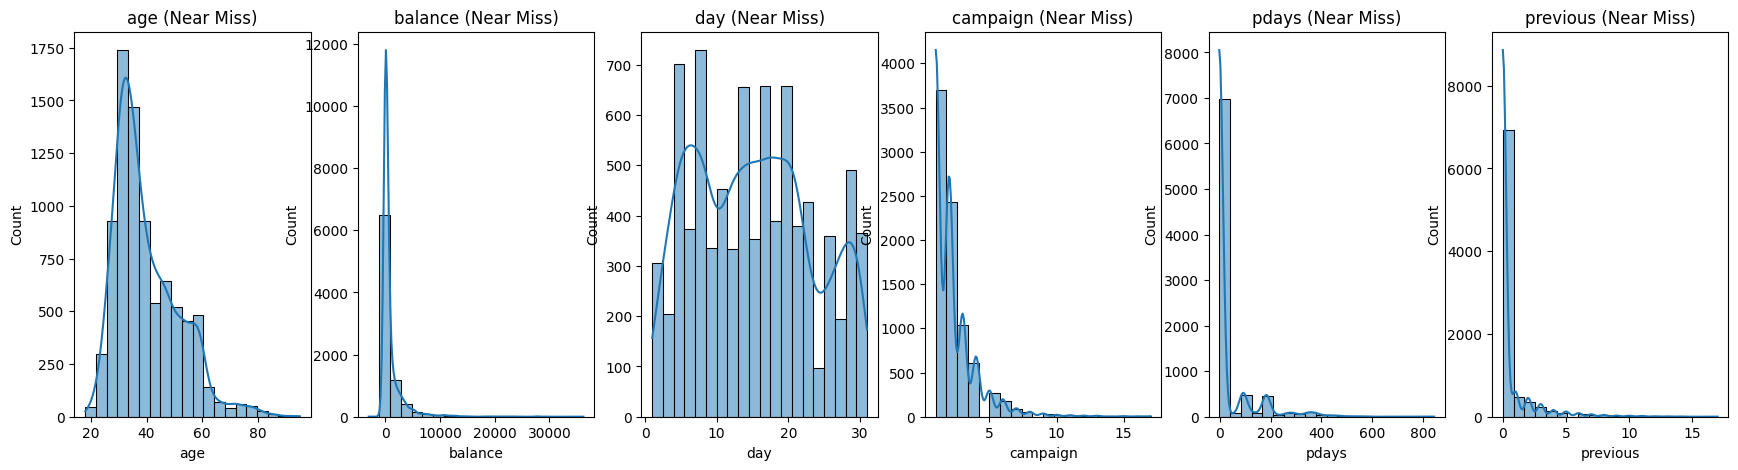

In [269]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_NearM[col], kde=True,bins=20)
        plt.title(col + ' (Near Miss)')

We can see that in some features, the data not have the same distribution as the original data.

#### **Model Training**

In [270]:
DT_clf_Ex2_Base = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_Base = MLPClassifier(random_state=1)
KN_clf_Ex2_Base = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_Base.fit(xdi_train, ydi_train)
MLP_clf_Ex2_Base.fit(xdi_train, ydi_train)
KN_clf_Ex2_Base.fit(xdi_train, ydi_train)
print("Decision Tree Classifier Base: ", DT_clf_Ex2_Base.score(xdi_test, ydi_test))
print("MLP Classifier Base: ", MLP_clf_Ex2_Base.score(xdi_test, ydi_test))
print("KNeighbors Classifier Base: ", KN_clf_Ex2_Base.score(xdi_test, ydi_test))

Decision Tree Classifier Base:  0.8362689708651823
MLP Classifier Base:  0.8908829068350504
KNeighbors Classifier Base:  0.8793619142572283


In [271]:
yDI_pred_test1 = DT_clf_Ex2_Base.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_Base.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_Base.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7989
           1       0.31      0.34      0.33      1038

    accuracy                           0.84      9027
   macro avg       0.61      0.62      0.62      9027
weighted avg       0.84      0.84      0.84      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7989
           1       0.76      0.07      0.14      1038

    accuracy                           0.89      9027
   macro avg       0.83      0.54      0.54      9027
weighted avg       0.88      0.89      0.85      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      7989
           1       0.42      0.13      0.20      1038

    acc

##### **Random Oversampling**

In [272]:
DT_clf_Ex2_ros = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_ros = MLPClassifier(random_state=1)
KN_clf_Ex2_ros = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_ros.fit(x_ros,y_ros)
MLP_clf_Ex2_ros.fit(x_ros,y_ros)
KN_clf_Ex2_ros.fit(x_ros,y_ros)
print("Score of Decision Tree Classifier on test data with Random Over Sampling: ",DT_clf_Ex2_ros.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Random Over Sampling: ",MLP_clf_Ex2_ros.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Random Over Sampling: ",KN_clf_Ex2_ros.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Random Over Sampling:  0.838595325135704
Score of MLP Classifier on test data with Random Over Sampling:  0.8604187437686939
Score of KNN Classifier on test data with Random Over Sampling:  0.7124183006535948


In [273]:
yDI_pred_test1 = DT_clf_Ex2_ros.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_ros.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_ros.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7989
           1       0.31      0.33      0.32      1038

    accuracy                           0.84      9027
   macro avg       0.61      0.62      0.61      9027
weighted avg       0.84      0.84      0.84      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7989
           1       0.36      0.27      0.31      1038

    accuracy                           0.86      9027
   macro avg       0.63      0.60      0.61      9027
weighted avg       0.84      0.86      0.85      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      7989
           1       0.19      0.45      0.27      1038

    acc

##### **SMOTE**

In [274]:
DT_clf_Ex2_sm = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_sm = MLPClassifier(random_state=1)
KN_clf_Ex2_sm = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_sm.fit(x_su,y_su)
MLP_clf_Ex2_sm.fit(x_su,y_su)
KN_clf_Ex2_sm.fit(x_su,y_su)
print("Score of Decision Tree Classifier on test data with SMOTE: ",DT_clf_Ex2_sm.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with SMOTE: ",MLP_clf_Ex2_sm.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with SMOTE: ",KN_clf_Ex2_sm.score(xdi_test,ydi_test))


Score of Decision Tree Classifier on test data with SMOTE:  0.8181012518001551
Score of MLP Classifier on test data with SMOTE:  0.8917691370333444
Score of KNN Classifier on test data with SMOTE:  0.6699900299102692


In [275]:
yDI_pred_test1 = DT_clf_Ex2_sm.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_sm.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_sm.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7989
           1       0.25      0.29      0.26      1038

    accuracy                           0.82      9027
   macro avg       0.58      0.59      0.58      9027
weighted avg       0.83      0.82      0.82      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7989
           1       0.63      0.14      0.23      1038

    accuracy                           0.89      9027
   macro avg       0.76      0.57      0.59      9027
weighted avg       0.87      0.89      0.86      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      7989
           1       0.17      0.50      0.26      1038

    acc

##### **ADASYN**

In [276]:
DT_clf_Ex2_ad = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_ad = MLPClassifier(random_state=1)
KN_clf_Ex2_ad = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_ad.fit(x_ad,y_ad)
MLP_clf_Ex2_ad.fit(x_ad,y_ad)
KN_clf_Ex2_ad.fit(x_ad,y_ad)
print("Score of Decision Tree Classifier on test data with ADASYN: ",DT_clf_Ex2_ad.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with ADASYN: ",MLP_clf_Ex2_ad.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with ADASYN: ",KN_clf_Ex2_ad.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with ADASYN:  0.8260773235848011
Score of MLP Classifier on test data with ADASYN:  0.8911044643846239
Score of KNN Classifier on test data with ADASYN:  0.6583582585576604


In [277]:
yDI_pred_test1 = DT_clf_Ex2_ad.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_ad.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_ad.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7989
           1       0.29      0.34      0.31      1038

    accuracy                           0.83      9027
   macro avg       0.60      0.62      0.61      9027
weighted avg       0.84      0.83      0.83      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7989
           1       0.65      0.12      0.20      1038

    accuracy                           0.89      9027
   macro avg       0.77      0.55      0.57      9027
weighted avg       0.87      0.89      0.86      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      7989
           1       0.17      0.50      0.25      1038

    acc

##### **Random Undersampling**

In [278]:
DT_clf_Ex2_rus = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_rus = MLPClassifier(random_state=1)
KN_clf_Ex2_rus = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_rus.fit(x_rus,y_rus)
MLP_clf_Ex2_rus.fit(x_rus,y_rus)
KN_clf_Ex2_rus.fit(x_rus,y_rus)
print("Score of Decision Tree Classifier on test data with Random Under Sampling: ",DT_clf_Ex2_rus.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Random Under Sampling: ",MLP_clf_Ex2_rus.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Random Under Sampling: ",KN_clf_Ex2_rus.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Random Under Sampling:  0.6477234961781323
Score of MLP Classifier on test data with Random Under Sampling:  0.8235294117647058
Score of KNN Classifier on test data with Random Under Sampling:  0.6191425722831505


In [279]:
yDI_pred_test1 = DT_clf_Ex2_rus.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_rus.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_rus.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.65      0.77      7989
           1       0.19      0.64      0.30      1038

    accuracy                           0.65      9027
   macro avg       0.56      0.65      0.53      9027
weighted avg       0.85      0.65      0.71      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7989
           1       0.24      0.25      0.25      1038

    accuracy                           0.82      9027
   macro avg       0.57      0.58      0.57      9027
weighted avg       0.83      0.82      0.83      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      7989
           1       0.17      0.58      0.26      1038

    acc

##### **InstanceHardnessThreshold**

In [280]:
DT_clf_Ex2_iht = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_iht = MLPClassifier(random_state=1)
KN_clf_Ex2_iht = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_iht.fit(x_iht,y_iht)
MLP_clf_Ex2_iht.fit(x_iht,y_iht)
KN_clf_Ex2_iht.fit(x_iht,y_iht)
print("Score of Decision Tree Classifier on test data with Instance Hardness Threshold: ",DT_clf_Ex2_iht.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Instance Hardness Threshold: ",MLP_clf_Ex2_iht.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Instance Hardness Threshold: ",KN_clf_Ex2_iht.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Instance Hardness Threshold:  0.543369890329013
Score of MLP Classifier on test data with Instance Hardness Threshold:  0.6551456740888446
Score of KNN Classifier on test data with Instance Hardness Threshold:  0.6710978176581367


In [281]:
yDI_pred_test1 = DT_clf_Ex2_iht.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_iht.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_iht.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.95      0.51      0.66      7989
           1       0.17      0.79      0.28      1038

    accuracy                           0.54      9027
   macro avg       0.56      0.65      0.47      9027
weighted avg       0.86      0.54      0.62      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      7989
           1       0.20      0.68      0.31      1038

    accuracy                           0.66      9027
   macro avg       0.57      0.67      0.54      9027
weighted avg       0.86      0.66      0.72      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      7989
           1       0.19      0.55      0.28      1038

    acc

##### **NearMiss**

In [282]:
DT_clf_Ex2_nm = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_nm = MLPClassifier(random_state=1)
KN_clf_Ex2_nm = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_nm.fit(x_nearM,y_nearM)
MLP_clf_Ex2_nm.fit(x_nearM,y_nearM)
KN_clf_Ex2_nm.fit(x_nearM,y_nearM)
print("Score of Decision Tree Classifier on test data with Near Miss: ",DT_clf_Ex2_nm.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Near Miss: ",MLP_clf_Ex2_nm.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Near Miss: ",KN_clf_Ex2_nm.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Near Miss:  0.3447435471363687
Score of MLP Classifier on test data with Near Miss:  0.37055500166168165
Score of KNN Classifier on test data with Near Miss:  0.358369336435139


In [283]:
yDI_pred_test1 = DT_clf_Ex2_nm.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_nm.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_nm.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.94      0.28      0.43      7989
           1       0.14      0.87      0.23      1038

    accuracy                           0.34      9027
   macro avg       0.54      0.57      0.33      9027
weighted avg       0.85      0.34      0.41      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.94      0.31      0.46      7989
           1       0.14      0.86      0.24      1038

    accuracy                           0.37      9027
   macro avg       0.54      0.58      0.35      9027
weighted avg       0.85      0.37      0.44      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.94      0.30      0.45      7989
           1       0.13      0.84      0.23      1038

    acc

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.90|0.91|0.84|Decision Tree|No Resampling|
1|0.31|0.34|0.33|^|Decision Tree|No Resampling|
0|0.89|1.00|0.94|0.89|MLP|No Resampling|
1|0.76|0.07|0.14|^|MLP|No Resampling|
0|0.90|0.98|0.93|0.88|K-Nearest|No Resampling|
1|0.42|0.13|0.20|^|K-Nearest|No Resampling|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.90|0.91|0.84|Decision Tree|Random Oversampling|
1|0.31|0.33|0.32|^|Decision Tree|Random Oversamplinga|
0|0.91|0.94|0.92|0.86|MLP|Random Oversampling|
1|0.36|0.27|0.31|^|MLP|Random Oversampling|
0|0.91|0.75|0.82|0.71|K-Nearest|Random Oversampling|
1|0.19|0.45|0.27|^|K-Nearest|Random Oversampling|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.89|0.90|0.82|Decision Tree|SMOTE|
1|0.25|0.29|0.26|^|Decision Tree|SMOTE|
0|0.90|0.99|0.94|0.89|MLP|SMOTE|
1|0.63|0.14|0.23|^|MLP|SMOTE|
0|0.91|0.69|0.79|0.67|K-Nearest|SMOTE|
1|0.17|0.50|0.26|^|K-Nearest|SMOTE|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.89|0.90|0.83|Decision Tree|ADASYN|
1|0.29|0.34|0.31|^|Decision Tree|ADASYN|
0|0.90|0.99|0.94|0.89|MLP|ADASYN|
1|0.65|0.12|0.20|^|MLP|ADASYN|
0|0.91|0.68|0.78|0.66|K-Nearest|ADASYN|
1|0.17|0.50|0.25|^|K-Nearest|ADASYN|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.65|0.77|0.65|Decision Tree|Random Undersampling|
1|0.19|0.64|0.30|^|Decision Tree|Random Undersampling|
0|0.90|0.90|0.90|0.82|MLP|Random Undersampling|
1|0.24|0.25|0.25|^|MLP|Random Undersampling|
0|0.92|0.62|0.74|0.62|K-Nearest|Random Undersampling|
1|0.17|0.58|0.26|^|K-Nearest|Random Undersampling|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.95|0.51|0.66|0.54|Decision Tree|Instance Hardness Threshold|
1|0.17|0.79|0.28|^|Decision Tree|Instance Hardness Threshold|
0|0.94|0.65|0.77|0.66|MLP|Instance Hardness Threshold|
1|0.20|0.68|0.31|^|MLP|Instance Hardness Threshold|
0|0.92|0.69|0.79|0.67|K-Nearest|Instance Hardness Threshold|
1|0.19|0.55|0.28|^|K-Nearest|Instance Hardness Threshold|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.94|0.28|0.483|0.34|Decision Tree|Near Miss|
1|0.14|0.89|0.23|^|Decision Tree|Near Miss|
0|0.94|0.31|0.46|0.54|MLP|Near Miss|
1|0.14|0.86|0.24|MLP|Near Miss|
0|0.91|0.30|0.45|0.36|K-Nearest|Near Miss|
1|0.13|0.84|0.23|^|K-Nearest|Near Miss|

Since resampling makes the data have more or less instances, we have to train the model again. Therefore, we trained the model again with the 3 models that we chose before, which are Decision Tree, MLP, K-Nearest, using the data that we resampled. However, the results showed that resampling our data set will reduce the performance of our model in some cases or not increase in some cases. In addition, resampling multiple times will change the histogram of the data.

Therefore, we will not consider using the data that we resampled to train the model further.

### **Experiment 3 : Data Transformation**

#### **Hypothesis**
    
Right-skewed data affects model's performance.

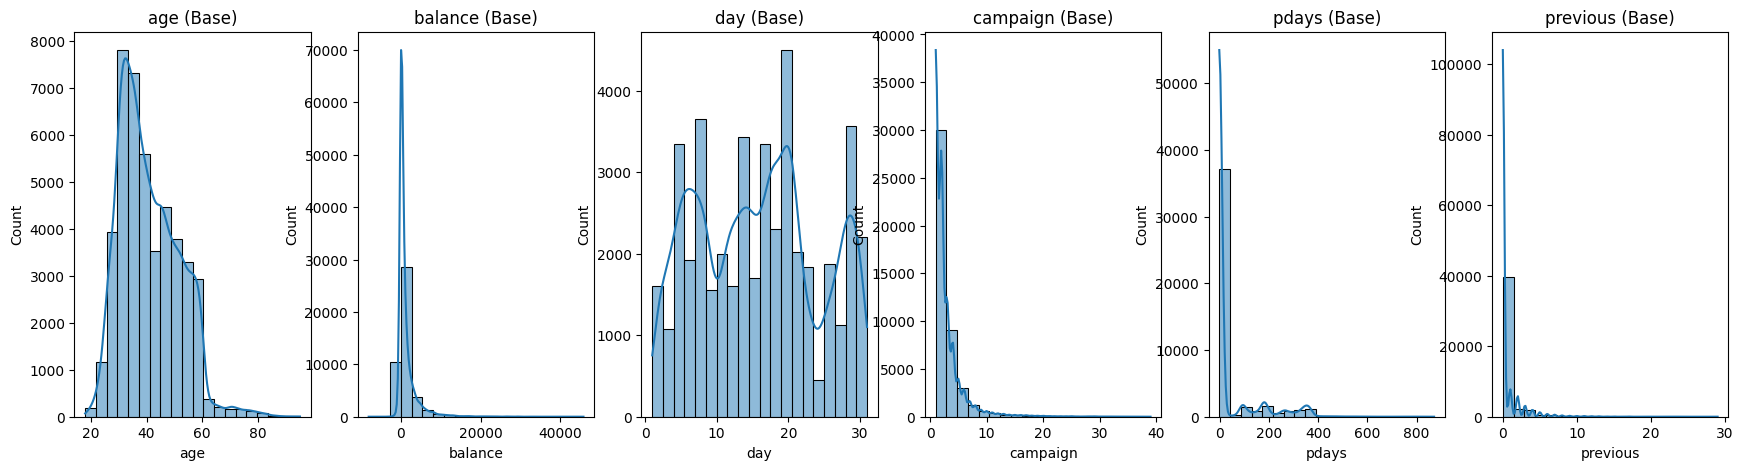

In [370]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

Since the data is right-skewed, we will try to transform the data to make it more normal distribution. We will try to transform the data using log, square root, and cube root.

#### **Age Feature**

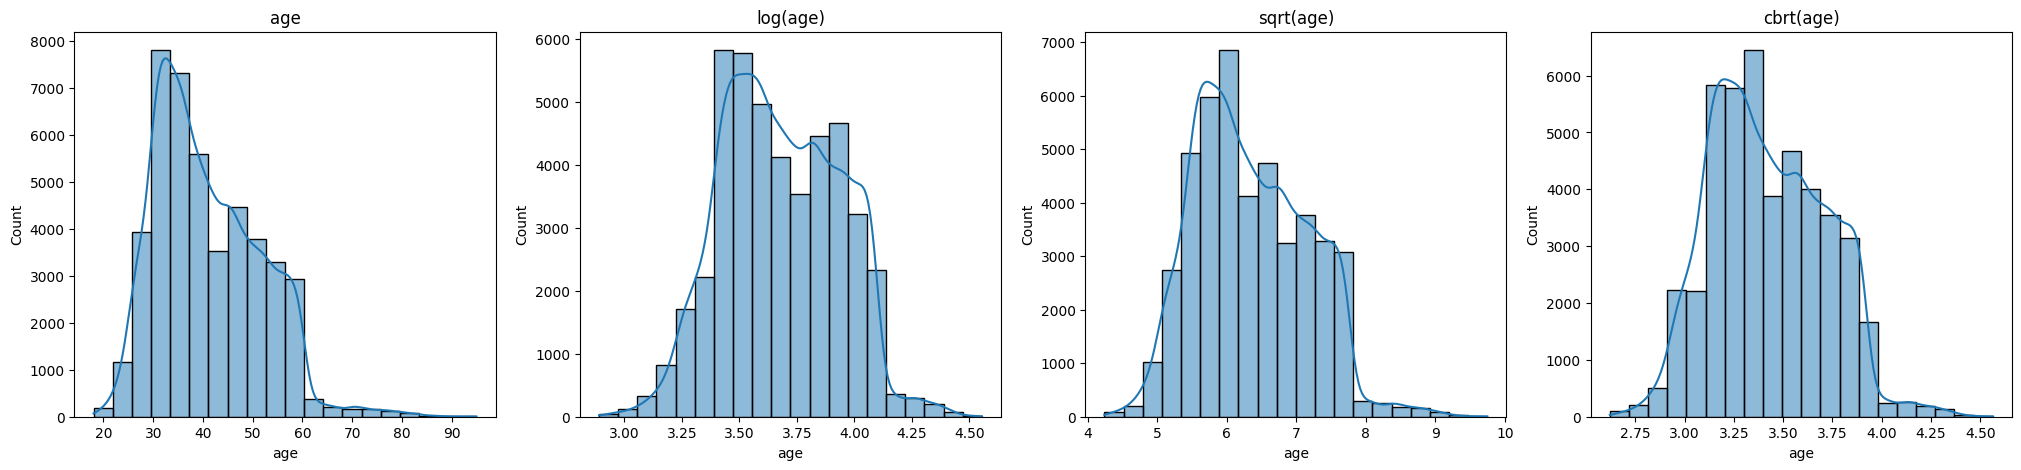

In [371]:
age_base = df['age']
age_log = np.log(df["age"])
age_sqrt = np.sqrt(df["age"])
age_cbrt = np.cbrt(df["age"])
title = ['age', 'log(age)', 'sqrt(age)', 'cbrt(age)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([age_base, age_log, age_sqrt, age_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Balance Feature**

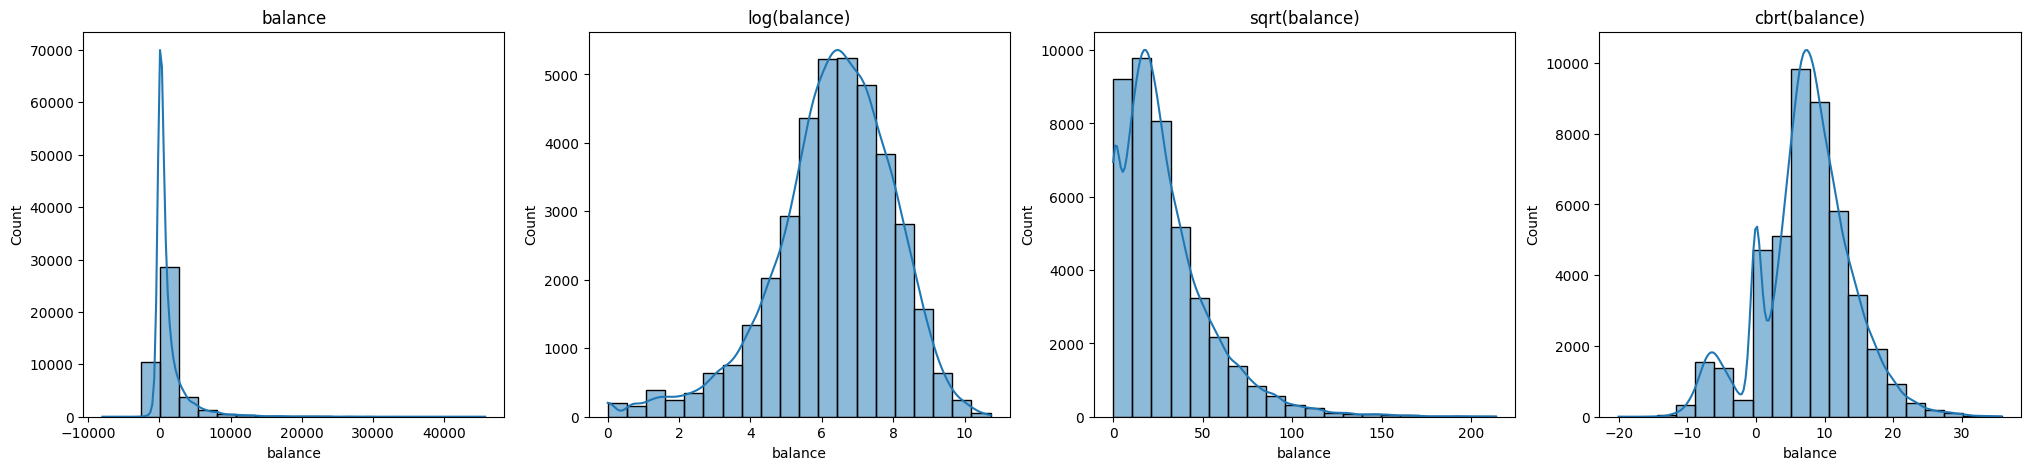

In [372]:
balance_base = df['balance']
balance_log = np.log(df["balance"])
balance_sqrt = np.sqrt(df["balance"])
balance_cbrt = np.cbrt(df["balance"])
title = ['balance', 'log(balance)', 'sqrt(balance)', 'cbrt(balance)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([balance_base, balance_log, balance_sqrt, balance_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Day Feature**

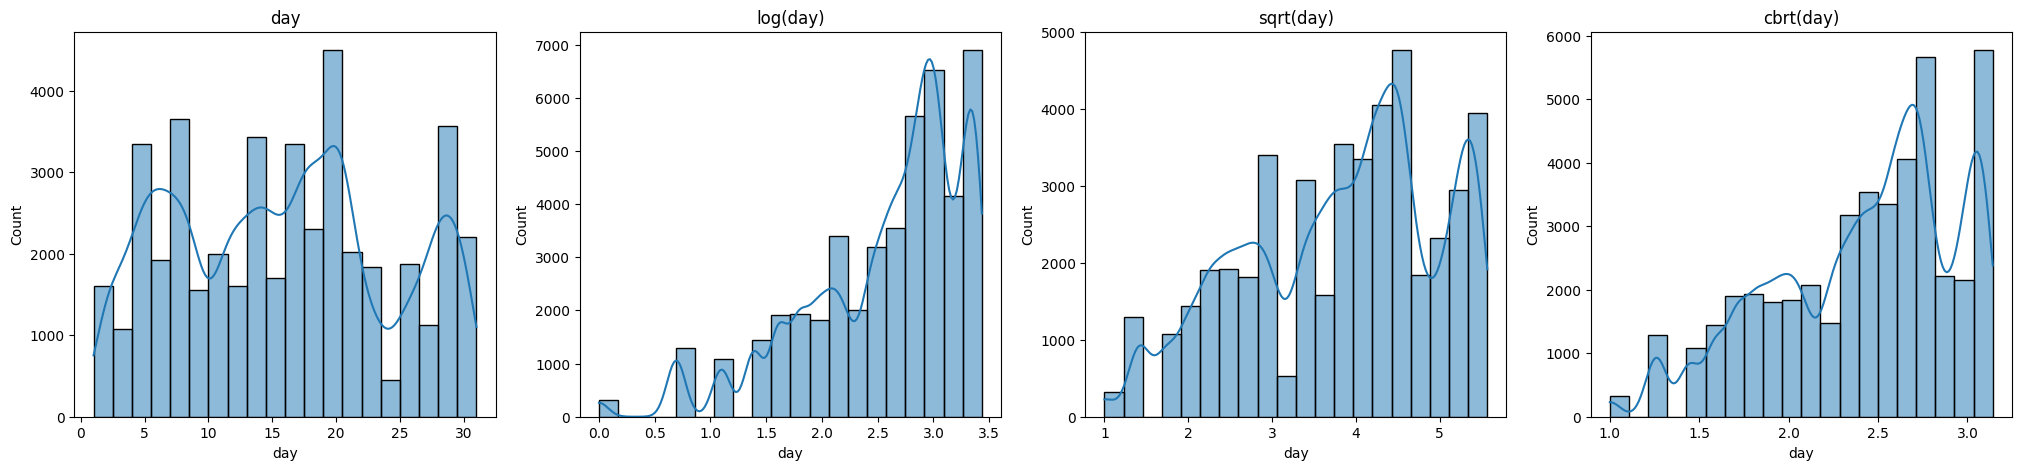

In [373]:
day_base = df['day']
day_log = np.log(df["day"])
day_sqrt = np.sqrt(df["day"])
day_cbrt = np.cbrt(df["day"])
title = ['day', 'log(day)', 'sqrt(day)', 'cbrt(day)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([day_base, day_log, day_sqrt, day_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Campaign Feature**

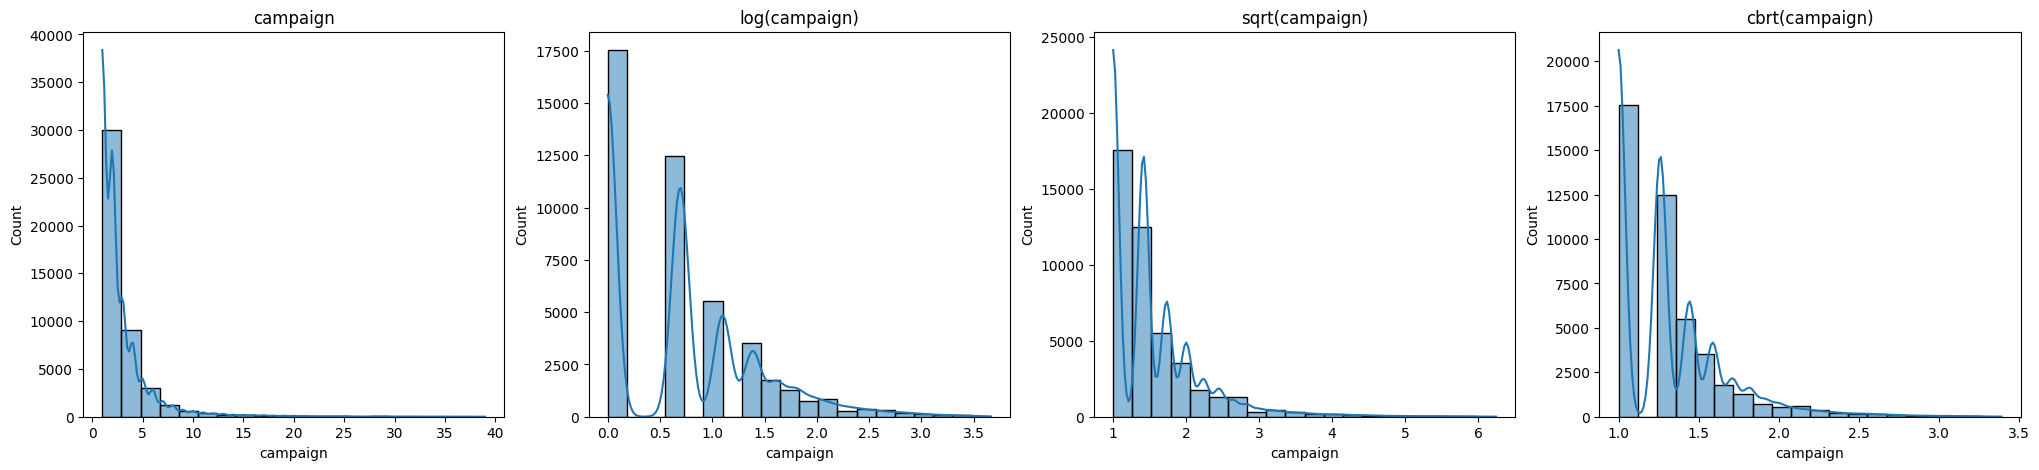

In [374]:
campaign_base = df['campaign']
campaign_log = np.log(df["campaign"])
campaign_sqrt = np.sqrt(df["campaign"])
campaign_cbrt = np.cbrt(df["campaign"])
title = ['campaign', 'log(campaign)', 'sqrt(campaign)', 'cbrt(campaign)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([campaign_base, campaign_log, campaign_sqrt, campaign_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Pdays Feature**

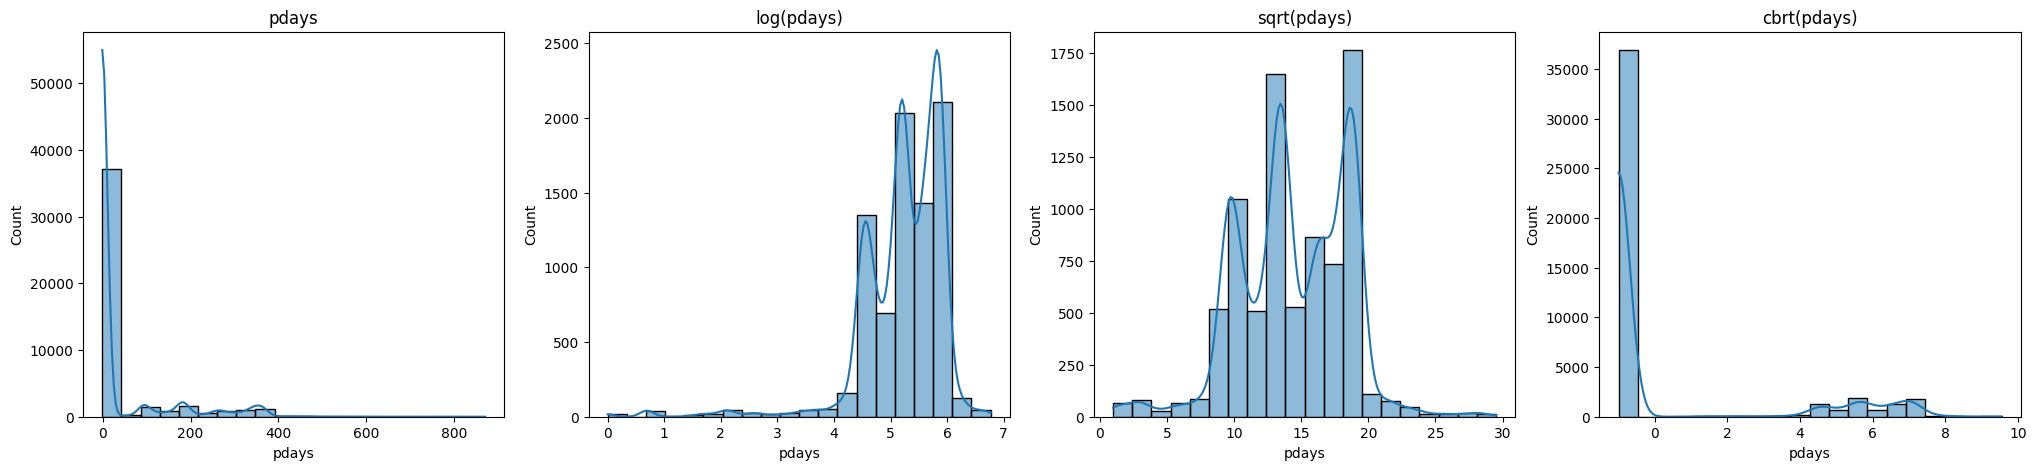

In [289]:
pdays_base = df['pdays']
pdays_log = np.log(df["pdays"])
pdays_sqrt = np.sqrt(df["pdays"])
pdays_cbrt = np.cbrt(df["pdays"])
title = ['pdays', 'log(pdays)', 'sqrt(pdays)', 'cbrt(pdays)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([pdays_base, pdays_log, pdays_sqrt, pdays_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Previous Feature**

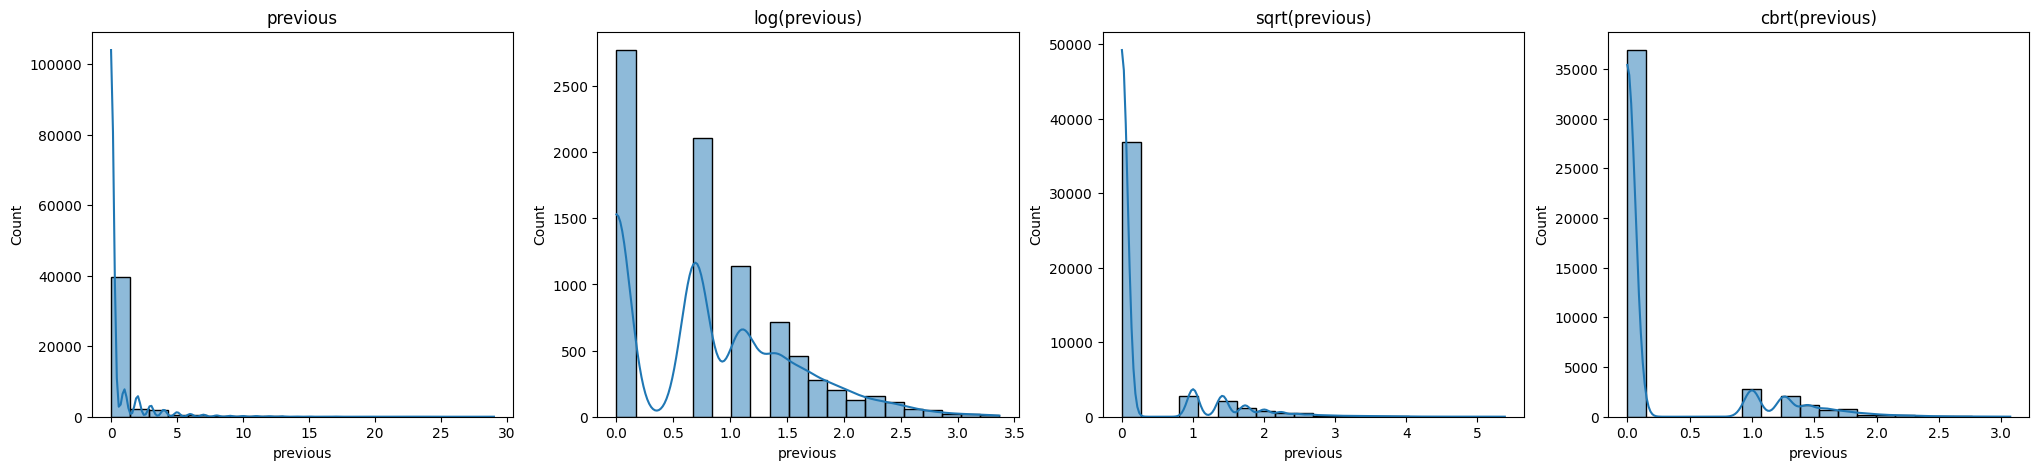

In [290]:
previous_base = df['previous']
previous_log = np.log(df["previous"])
previous_sqrt = np.sqrt(df["previous"])
previous_cbrt = np.cbrt(df["previous"])
title = ['previous', 'log(previous)', 'sqrt(previous)', 'cbrt(previous)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([previous_base, previous_log, previous_sqrt, previous_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

from the graph above, we can see that some of the features after transformed are more normal distribution than before. However, some of the features are still right-skewed. so we will try to use the features that are more normal distribution than before. which are 
1.Age = Log
2.Balance = cbrt(followed by Log)

In [375]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [399]:
dfDT = df.copy()
dfDT = LE_pipeline.fit_transform(dfDT)
dfDT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45135 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45135 non-null  int64
 1   balance              45135 non-null  int64
 2   day                  45135 non-null  int64
 3   campaign             45135 non-null  int64
 4   pdays                45135 non-null  int64
 5   previous             45135 non-null  int64
 6   default              45135 non-null  int64
 7   housing              45135 non-null  int64
 8   loan                 45135 non-null  int64
 9   month                45135 non-null  int64
 10  y                    45135 non-null  int64
 11  job_admin.           45135 non-null  uint8
 12  job_blue-collar      45135 non-null  uint8
 13  job_entrepreneur     45135 non-null  uint8
 14  job_housemaid        45135 non-null  uint8
 15  job_management       45135 non-null  uint8
 16  job_retired          4

In [378]:
dfDT_X = dfDT.copy()
dfDT_X.drop('y', axis=1, inplace=True)
dfDT_Y = dfDT['y']

In [379]:
x_tf_train, x_tf_test, y_tf_train, y_tf_test = train_test_split(dfDT_X, dfDT_Y,  test_size = 0.2, random_state = 0)

#### **Model Training**

##### **Nontransformed Data**

In [295]:
DT_clf_DT_N = DecisionTreeClassifier(random_state=0)
MLP_clf_DT_N = MLPClassifier(random_state=1)
KN_clf_DT_N = KNeighborsClassifier(n_jobs=-1)

DT_clf_DT_N.fit(x_tf_train, y_tf_train)
MLP_clf_DT_N.fit(x_tf_train, y_tf_train)
KN_clf_DT_N.fit(x_tf_train, y_tf_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DT_N.score(x_tf_test, y_tf_test))
print("MLP Classifier Accuracy: ", MLP_clf_DT_N.score(x_tf_test, y_tf_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DT_N.score(x_tf_test, y_tf_test))

Decision Tree Classifier Accuracy:  0.8362689708651823
MLP Classifier Accuracy:  0.8908829068350504
KNeighbors Classifier Accuracy:  0.8793619142572283


In [296]:
yDT_pred_test1 = DT_clf_DT_N.predict(x_tf_test)
yDT_pred_test2 = MLP_clf_DT_N.predict(x_tf_test)
yDT_pred_test3 = KN_clf_DT_N.predict(x_tf_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7989
           1       0.31      0.34      0.33      1038

    accuracy                           0.84      9027
   macro avg       0.61      0.62      0.62      9027
weighted avg       0.84      0.84      0.84      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7989
           1       0.76      0.07      0.14      1038

    accuracy                           0.89      9027
   macro avg       0.83      0.54      0.54      9027
weighted avg       0.88      0.89      0.85      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      7989
           1       0.42      0.13      0.20      1038

    acc

##### **Transformed Data**

In [297]:
x_tf_train_T = x_tf_train.copy()
x_tf_test_T = x_tf_test.copy()
x_tf_train_T["age"] , x_tf_test_T["age"] = np.log(x_tf_train["age"]) , np.log(x_tf_test["age"])
x_tf_train_T["balance"] , x_tf_test_T["balance"] = np.cbrt(x_tf_train["balance"]) , np.cbrt(x_tf_test["balance"])
x_tf_train_T.head()

age    balance  day  campaign  pdays  previous  default  housing  \
15274  3.526361   3.391211   18         3     -1         0        0        0   
43830  3.526361   9.333192   28         3     -1         0        0        1   
16781  3.496508   1.912931   24         1     -1         0        0        1   
11544  4.007333  11.540500   19         1     -1         0        0        0   
20591  3.583519   2.289428   12         2     -1         0        1        0   

       loan  month  ...  education_secondary  education_tertiary  \
15274     0      7  ...                    1                   0   
43830     0      5  ...                    0                   1   
16781     0      7  ...                    0                   1   
11544     0      6  ...                    0                   0   
20591     0      8  ...                    1                   0   

       education_unknown  contact_cellular  contact_telephone  \
15274                  0                 1                  0   
43830                  0                 1                  0   
16781                  0                 0                  1   
11544                  0                 0                  0   
20591                  0                 1                  0   

       contact_unknown  poutcome_failure  poutcome_other  poutcome_success  \
15274                0                 0               0                 0   
43830                0                 0               0                 0   
16781                0                 0               0                 0   
11544                1                 0               0                 0   
20591                0                 0               0                 0   

       poutcome_unknown  
15274                 1  
43830                 1  
16781                 1  
11544                 1  
20591                 1  

[5 rows x 36 columns]

In [298]:
DT_clf_DT_T = DecisionTreeClassifier(random_state=0)
MLP_clf_DT_T = MLPClassifier(random_state=1)
KN_clf_DT_T = KNeighborsClassifier(n_jobs=-1)

DT_clf_DT_T.fit(x_tf_train_T, y_tf_train)
MLP_clf_DT_T.fit(x_tf_train_T, y_tf_train)
KN_clf_DT_T.fit(x_tf_train_T, y_tf_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DT_T.score(x_tf_test_T, y_tf_test))
print("MLP Classifier Accuracy: ", MLP_clf_DT_T.score(x_tf_test_T, y_tf_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DT_T.score(x_tf_test_T, y_tf_test))

Decision Tree Classifier Accuracy:  0.8367120859643292
MLP Classifier Accuracy:  0.8975296333222554
KNeighbors Classifier Accuracy:  0.8839038440234851


In [299]:
yDT_pred_test1 = DT_clf_DT_T.predict(x_tf_test_T)
yDT_pred_test2 = MLP_clf_DT_T.predict(x_tf_test_T)
yDT_pred_test3 = KN_clf_DT_T.predict(x_tf_test_T)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7989
           1       0.31      0.34      0.33      1038

    accuracy                           0.84      9027
   macro avg       0.61      0.62      0.62      9027
weighted avg       0.84      0.84      0.84      9027

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7989
           1       0.63      0.26      0.37      1038

    accuracy                           0.90      9027
   macro avg       0.77      0.62      0.66      9027
weighted avg       0.88      0.90      0.88      9027

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7989
           1       0.49      0.21      0.29      1038

    acc

#### **Conclusion**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.90|0.91|0.84|Decision Tree|Not Transformed|
1|0.31|0.34|0.33|^|Decision Tree|Not Transformed|
0|0.89|1.00|0.94|0.89|MLP|Not Transformed|
1|0.76|0.07|0.14|^|MLP|Not Transformed|
0|0.90|0.98|0.93|0.88|K-Nearest|Not Transformed|
1|0.42|0.13|0.20|^|K-Nearest|Not Transformed|

<br>

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.90|0.91|0.84|Decision Tree|Transformed|
1|0.31|0.34|0.33|^|Decision Tree|Transformed|
0|0.91|0.98|0.94|0.90|MLP|Transformed|
1|0.63|0.26|0.37|^|MLP|Transformed|
0|0.90|0.97|0.94|0.89|K-Nearest|Transformed|
1|0.49|0.21|0.29|^|K-Nearest|Transformed|

From data transformation, we can see that the data is distributed differently in some features. Therefore, we will train the model again with the 3 models that we have chosen before, which are Decision Tree, MLP, K-Nearest, using the transformed data. However, the results showed that when we transformed the data, the performance of the model will change into 2 different forms with all 3 models as follows:
1. Decision Tree has similar performance as the model trained with the data that was not transformed.
2. K-Nearest and MLP has better performance than the model trained with the data that was not transformed.

Therefore, we will use the data that was transformed.

In [415]:
dfDT = dfEX1.copy()
dfDT = LE_pipeline.fit_transform(dfDT)
dfDT["age"] = np.log(dfDT["age"])
dfDT['balance'] = np.cbrt(dfDT['balance'])

In [416]:
df = dfDT.copy()

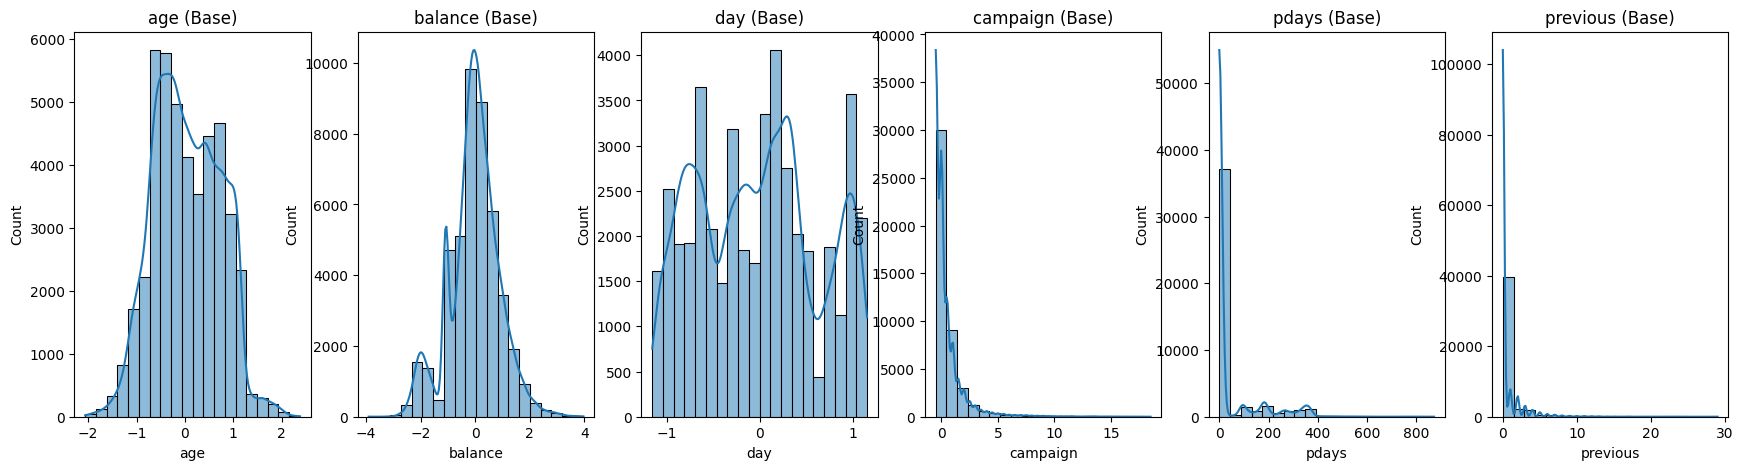

In [430]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

### **Experiment 4 : Data Scaling**

#### **Hypothesis**
    
Scaling data affects model's performance.

In [418]:
dfDS = df.copy()

In [419]:
X, y = dfDS.drop(['y'], axis = 1), dfDS['y']

#### **Feature Scaling**

In [420]:
MinMaxScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

StandardScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

RobustScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

In [421]:
dfMMS = pd.concat([X, y], axis=1)
dfSS = pd.concat([X, y], axis=1)
dfRS = pd.concat([X, y], axis=1)

for idx in dfDS.columns:
    if idx not in ['y']:
        dfMMS[idx] = MinMaxScale.fit_transform(X[idx].values.reshape(-1,1))
        dfSS[idx] = StandardScale.fit_transform(X[idx].values.reshape(-1,1))
        dfRS[idx] = RobustScale.fit_transform(X[idx].values.reshape(-1,1))

In [422]:
XMMS, yMMS = dfMMS.drop(['y'], axis = 1), dfMMS['y']
XSS, ySS = dfSS.drop(['y'], axis = 1), dfSS['y']
XRS, yRS = dfRS.drop(['y'], axis = 1), dfRS['y']

xMMS_train, xMMS_test, yMMS_train, yMMS_test = train_test_split(XMMS, yMMS, test_size=0.2, random_state=1)
xSS_train, xSS_test, ySS_train, ySS_test = train_test_split(XSS, ySS, test_size=0.2, random_state=1)
xRS_train, xRS_test, yRS_train, yRS_test = train_test_split(XRS, yRS, test_size=0.2, random_state=1)

##### **Decision Tree Classification**

In [423]:
DT_MMS = DecisionTreeClassifier(random_state=1)
DT_SS = DecisionTreeClassifier(random_state=1)
DT_RS = DecisionTreeClassifier(random_state=1)

DT_MMS = DT_MMS.fit(xMMS_train,yMMS_train)
DT_SS = DT_SS.fit(xSS_train,ySS_train)
DT_RS = DT_RS.fit(xRS_train,yRS_train)

print("Decision Tree Classifier Accuracy with MinMaxScaler: ", DT_MMS.score(xMMS_test, yMMS_test))
print("Decision Tree Classifier Accuracy with StandardScaler: ", DT_SS.score(xSS_test, ySS_test))
print("Decision Tree Classifier Accuracy with RobustScaler: ", DT_RS.score(xRS_test, yRS_test))

Decision Tree Classifier Accuracy with MinMaxScaler:  0.8229755178907722
Decision Tree Classifier Accuracy with StandardScaler:  0.8230862966655589
Decision Tree Classifier Accuracy with RobustScaler:  0.8230862966655589


In [431]:
yDTMMS_pred_test = DT_MMS.predict(xMMS_test)
yDTSS_pred_test = DT_SS.predict(xSS_test)
yDTRS_pred_test = DT_RS.predict(xRS_test)

print("Classification report on Decision Tree Classifier Accuracy with MinMaxScaler\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yDTMMS_pred_test))
print("Classification report on Decision Tree Classifier Accuracy with StandardScaler\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yDTSS_pred_test))
print("Classification report on Decision Tree Classifier Accuracy with RobustScaler\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yDTRS_pred_test))

Classification report on Decision Tree Classifier Accuracy with MinMaxScaler
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7941
           1       0.28      0.30      0.29      1086

    accuracy                           0.82      9027
   macro avg       0.59      0.60      0.59      9027
weighted avg       0.83      0.82      0.83      9027

Classification report on Decision Tree Classifier Accuracy with StandardScaler
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7941
           1       0.28      0.30      0.29      1086

    accuracy                           0.82      9027
   macro avg       0.59      0.60      0.59      9027
weighted avg       0.83      0.82      0.83      9027

Classification report on Decision Tree Classifier Accuracy with RobustScaler
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7941
    

##### **Multi-Layer Perceptron Classifier**

In [425]:
MLP_MMS = MLPClassifier(random_state=1)
MLP_SS = MLPClassifier(random_state=1)
MLP_RS = MLPClassifier(random_state=1)
MLP_MMS = MLP_MMS.fit(xMMS_train,yMMS_train)
MLP_SS = MLP_SS.fit(xSS_train,ySS_train)
MLP_RS = MLP_RS.fit(xRS_train,yRS_train)

print("MLP Classifier Accuracy with MinMaxScaler: ", MLP_MMS.score(xMMS_test, yMMS_test))
print("MLP Classifier Accuracy with StandardScaler: ", MLP_SS.score(xSS_test, ySS_test))
print("MLP Classifier Accuracy with RobustScaler: ", MLP_RS.score(xRS_test, yRS_test))

MLP Classifier Accuracy with MinMaxScaler:  0.8855655256452863
MLP Classifier Accuracy with StandardScaler:  0.8782541265093609
MLP Classifier Accuracy with RobustScaler:  0.8860086407444334


In [426]:
yMLPMMS_pred_test = MLP_MMS.predict(xMMS_test)
yMLPSS_pred_test = MLP_SS.predict(xSS_test)
yMLPRS_pred_test = MLP_RS.predict(xRS_test)

print("Classification report on MLP Classifier Accuracy with MinMaxScaler\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yMLPMMS_pred_test))
print("Classification report on MLP Classifier Accuracy with StandardScaler\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yMLPSS_pred_test))
print("Classification report on MLP Classifier Accuracy with RobustScaler\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yMLPRS_pred_test))

Classification report on MLP Classifier Accuracy with MinMaxScaler
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7941
           1       0.59      0.16      0.25      1086

    accuracy                           0.89      9027
   macro avg       0.74      0.57      0.59      9027
weighted avg       0.86      0.89      0.86      9027

Classification report on MLP Classifier Accuracy with StandardScaler
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7941
           1       0.48      0.17      0.25      1086

    accuracy                           0.88      9027
   macro avg       0.69      0.57      0.59      9027
weighted avg       0.85      0.88      0.85      9027

Classification report on MLP Classifier Accuracy with RobustScaler
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7941
           1       0.57      0.20 

##### **K-Nearest Neighbors**

In [427]:
KNN_MMS = KNeighborsClassifier(n_jobs=-1)
KNN_SS = KNeighborsClassifier(n_jobs=-1)
KNN_RS = KNeighborsClassifier(n_jobs=-1)
KNN_MMS = KNN_MMS.fit(xMMS_train,yMMS_train)
KNN_SS = KNN_SS.fit(xSS_train,ySS_train)
KNN_RS = KNN_RS.fit(xRS_train,yRS_train)

print("KNN Classifier Accuracy with MinMaxScaler: ", KNN_MMS.score(xMMS_test, yMMS_test))
print("KNN Classifier Accuracy with StandardScaler: ", KNN_SS.score(xSS_test, ySS_test))
print("KNN Classifier Accuracy with RobustScaler: ", KNN_RS.score(xRS_test, yRS_test))

KNN Classifier Accuracy with MinMaxScaler:  0.8806912595546693
KNN Classifier Accuracy with StandardScaler:  0.8793619142572283
KNN Classifier Accuracy with RobustScaler:  0.8774786750858535


In [428]:
yKNNMMS_pred_test = KNN_MMS.predict(xMMS_test)
yKNNSS_pred_test = KNN_SS.predict(xSS_test)
yKNNRS_pred_test = KNN_RS.predict(xRS_test)

print("Classification report on KNN Classifier Accuracy with MinMaxScaler\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yKNNMMS_pred_test))
print("Classification report on KNN Classifier Accuracy with StandardScaler\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yKNNSS_pred_test))
print("Classification report on KNN Classifier Accuracy with RobustScaler\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yKNNRS_pred_test))

Classification report on KNN Classifier Accuracy with MinMaxScaler
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7941
           1       0.51      0.21      0.30      1086

    accuracy                           0.88      9027
   macro avg       0.71      0.59      0.62      9027
weighted avg       0.85      0.88      0.86      9027

Classification report on KNN Classifier Accuracy with StandardScaler
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7941
           1       0.50      0.20      0.28      1086

    accuracy                           0.88      9027
   macro avg       0.70      0.59      0.61      9027
weighted avg       0.85      0.88      0.86      9027

Classification report on KNN Classifier Accuracy with RobustScaler
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7941
           1       0.48      0.19 

#### **Conclusion**

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Scaler|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.89|0.90|0.82|Decision Tree|Min-Max Scaler|
|1|0.28|0.30|0.29|^|Decision Tree|Min-Max Scaler|
|0|0.90|0.89|0.90|0.82|Decision Tree|Standard Scaler|
|1|0.28|0.30|0.29|^|Decision Tree|Standard Scaler|
|0|0.90|0.89|0.90|0.82|Decision Tree|Robust Scaler|
|1|0.28|0.30|0.29|^|Decision Tree|Robust Scaler|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Scaler|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.99|0.94|0.89|MLP|Min-Max Scaler|
|1|0.59|0.16|0.25|^|MLP|Min-Max Scaler|
|0|0.90|0.97|0.93|0.88|MLP|Standard Scaler|
|1|0.48|0.17|0.25|^|MLP|Standard Scaler|
|0|0.90|0.98|0.94|0.89|MLP|Robust Scaler|
|1|0.57|0.20|0.30|^|MLP|Robust Scaler|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Scaler|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.97|0.93|0.88|KNN|Min-Max Scaler|
|1|0.51|0.21|0.30|^|KNN|Min-Max Scaler|
|0|0.90|0.97|0.93|0.88|KNN|Standard Scaler|
|1|0.50|0.20|0.28|^|KNN|Standard Scaler|
|0|0.90|0.97|0.93|0.88|KNN|Robust Scaler|
|1|0.48|0.19|0.27|^|KNN|Robust Scaler|

From the experiment compared with before scaling, we can see that the performance of the models are affected by different scalers. Therefore, we will use the scaler that gives the best performance for each model. which are:
1. Decision Tree = No Scaling
2. MLP = Robust Scaler
3. KNN = Min-Max Scaler

In [432]:
dfDT = df.copy()
dfNN = dfRS.copy()
dfKNN = dfMMS.copy()

### **Experiment 5 : Drop Feature**

#### **Hypothesis**
    
We will drop some features that we think are not important to the model or have a low correlation with the target.

In [313]:
def checkCorrFF(df):
    plt.figure(figsize=(20,10))
    cor = df.corr()
    sns.heatmap(cor, annot=True, cmap='inferno')
    plt.show()

In [439]:
dfDF = dfNN.copy()
dfDF2 = dfKNN.copy()
dfDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45135 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45135 non-null  float64
 1   balance              45135 non-null  float64
 2   day                  45135 non-null  float64
 3   campaign             45135 non-null  float64
 4   pdays                45135 non-null  float64
 5   previous             45135 non-null  float64
 6   default              45135 non-null  float64
 7   housing              45135 non-null  float64
 8   loan                 45135 non-null  float64
 9   month                45135 non-null  float64
 10  job_admin.           45135 non-null  float64
 11  job_blue-collar      45135 non-null  float64
 12  job_entrepreneur     45135 non-null  float64
 13  job_housemaid        45135 non-null  float64
 14  job_management       45135 non-null  float64
 15  job_retired          45135 non-null 

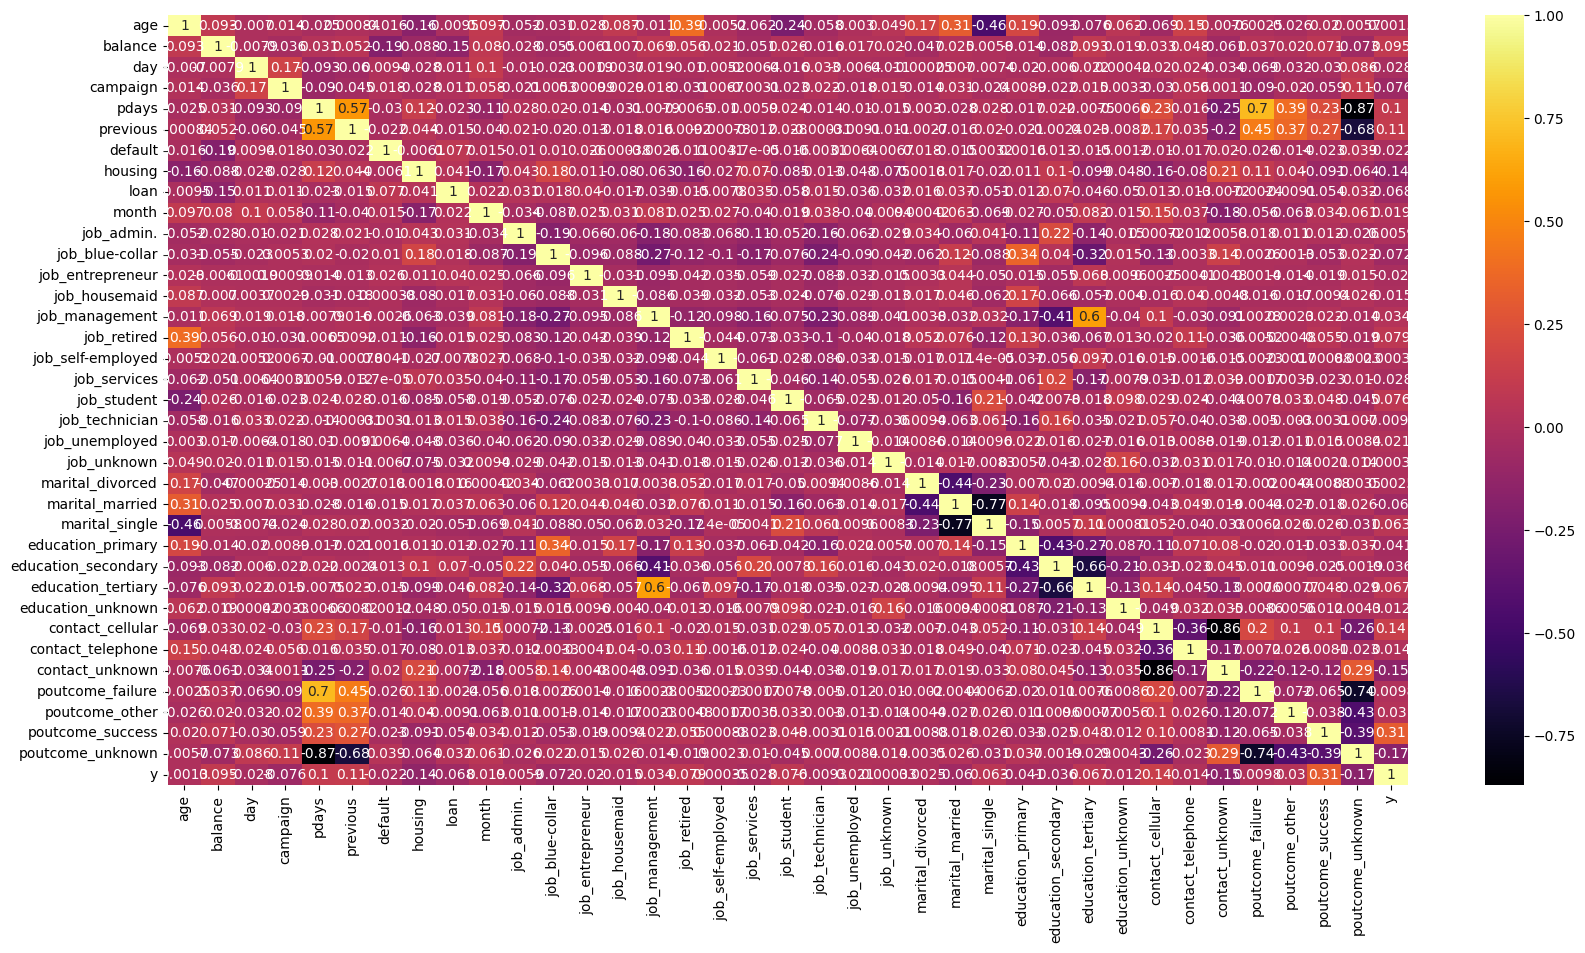

In [440]:
checkCorrFF(dfDF)

Since we have many features, we will drop the features fist, with ANOVA method(beacause we have both categorical and numerical features).

#### **ANOVA method**

In [505]:
selector = SelectKBest(f_classif, k=12)
selector2 = SelectKBest(f_classif, k=12)
x_sa = dfDF.drop(['y'], axis = 1)
y_sa = dfDF['y']
x_sa2 = dfDF2.drop(['y'], axis = 1)
y_sa2 = dfDF2['y']

dfDF = selector.fit(x_sa, y_sa)
dfDF2 = selector2.fit(x_sa2, y_sa2)

col = selector.get_support(indices=True)
col2 = selector2.get_support(indices=True)
dfDF = x_sa.iloc[:,col]
dfDF = pd.concat([dfDF, y_sa], axis=1)
dfDF2 = x_sa2.iloc[:,col2]
dfDF2 = pd.concat([dfDF2, y_sa2], axis=1)

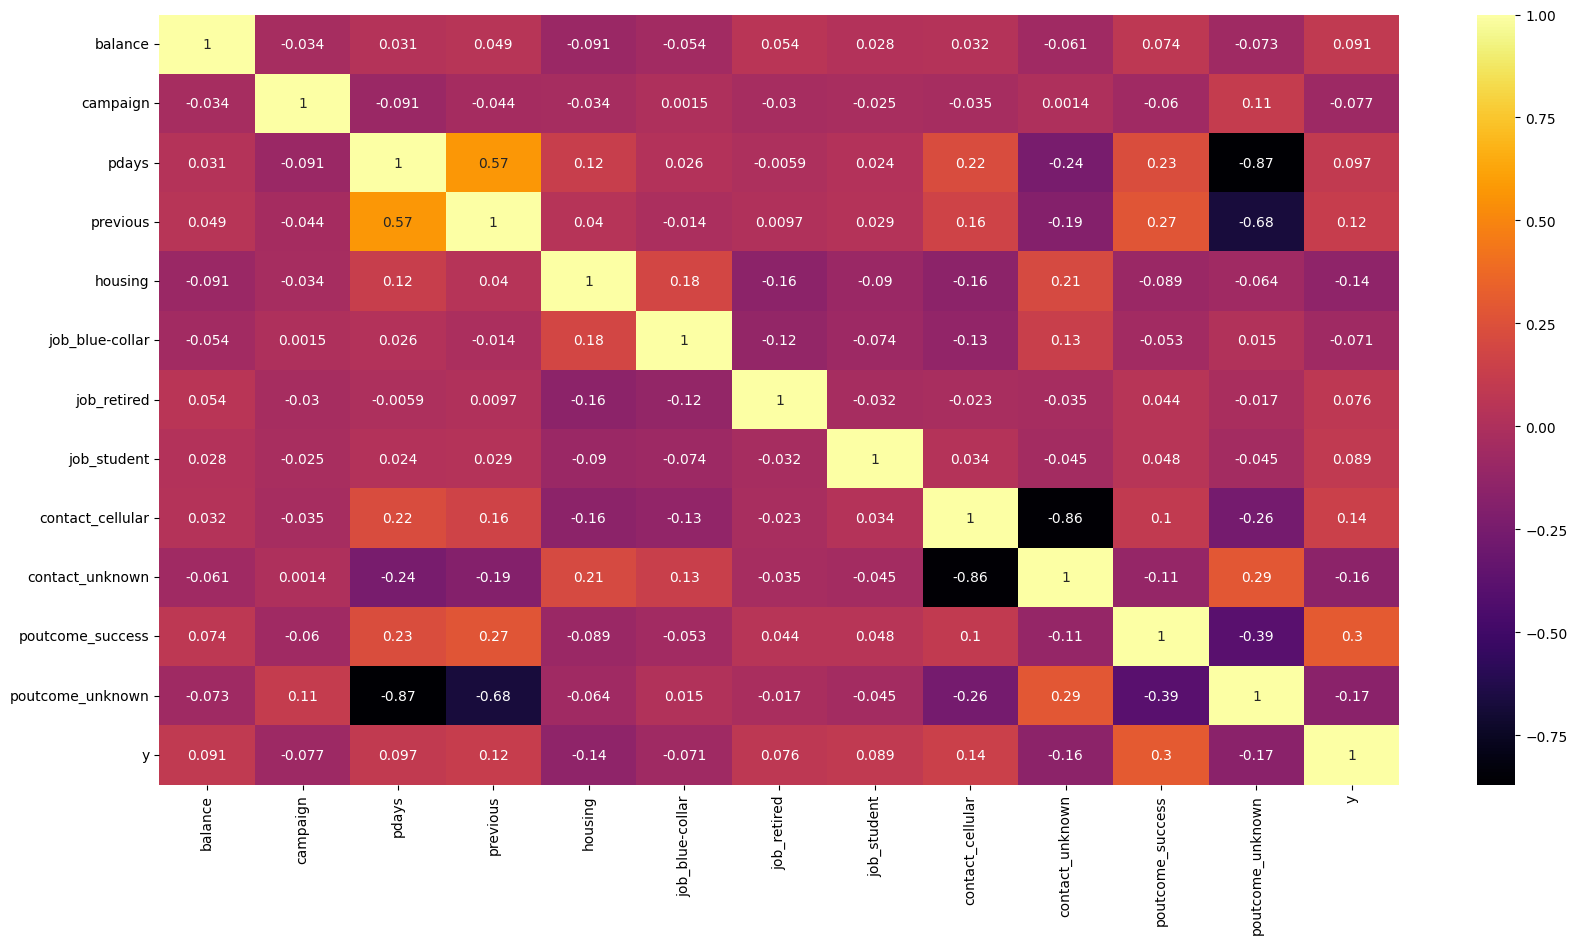

In [506]:
checkCorrFF(dfDF)

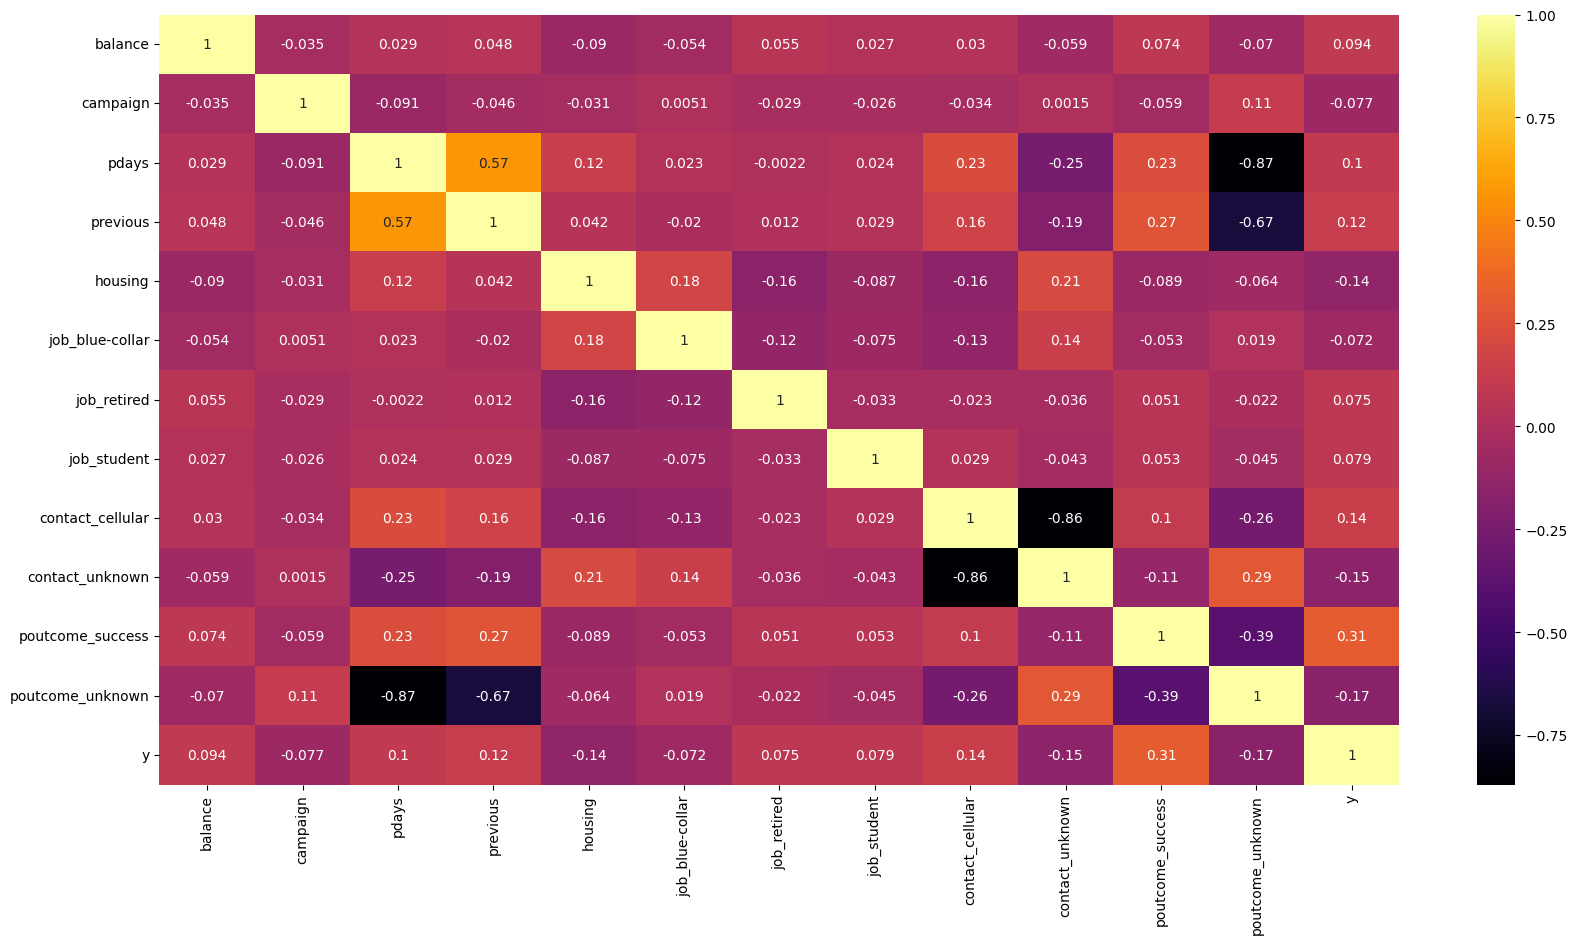

In [507]:
checkCorrFF(dfDF2)

From the correlation matrix, we can see that there are some features that have a low correlation with the target. We will drop these features.

In [508]:
dfDF.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'housing',
       'job_blue-collar', 'job_retired', 'job_student', 'contact_cellular',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown', 'y'],
      dtype='object')

In [509]:
x_fd_train , x_fd_test , y_fd_train , y_fd_test = train_test_split(dfDF.drop(['y'], axis = 1), dfDF['y'], test_size=0.2, random_state=0)
dfBase = dfDF.copy()
dfDF = pd.concat([x_fd_train, y_fd_train], axis=1)
dfDF_Test = pd.concat([x_fd_test, y_fd_test], axis=1)

In [510]:
x_fd_train2 , x_fd_test2 , y_fd_train2 , y_fd_test2 = train_test_split(dfDF2.drop(['y'], axis = 1), dfDF2['y'], test_size=0.2, random_state=0)
dfBase2 = dfDF2.copy()
dfDF2 = pd.concat([x_fd_train2, y_fd_train2], axis=1)
dfDF_Test2 = pd.concat([x_fd_test2, y_fd_test2], axis=1)

Then we will consider dropping some features that have a low correlation with the target and have a high correlation with other features.

In [447]:
dfSep = dfOri.copy()

dfContact1, dfContact2 = dfSep[dfSep['contact'] == 'unknown'], dfSep[dfSep['contact'] == 'cellular']
dfContact = pd.concat([dfContact1, dfContact2], axis=0)
dfContactYes = dfContact[dfContact['y'] == 'yes']
dfContactNo = dfContact[dfContact['y'] == 'no']

dfPoutcome1, dfPoutcome2 = dfSep[dfSep['poutcome'] == 'unknown'], dfSep[dfSep['poutcome'] == 'success']
dfPoutcome = pd.concat([dfPoutcome1, dfPoutcome2], axis=0)
dfPoutcomeYes = dfPoutcome[dfPoutcome['y'] == 'yes']
dfPoutcomeNo = dfPoutcome[dfPoutcome['y'] == 'no']

Text(0.5, 1.0, 'poutcome (Yes)')

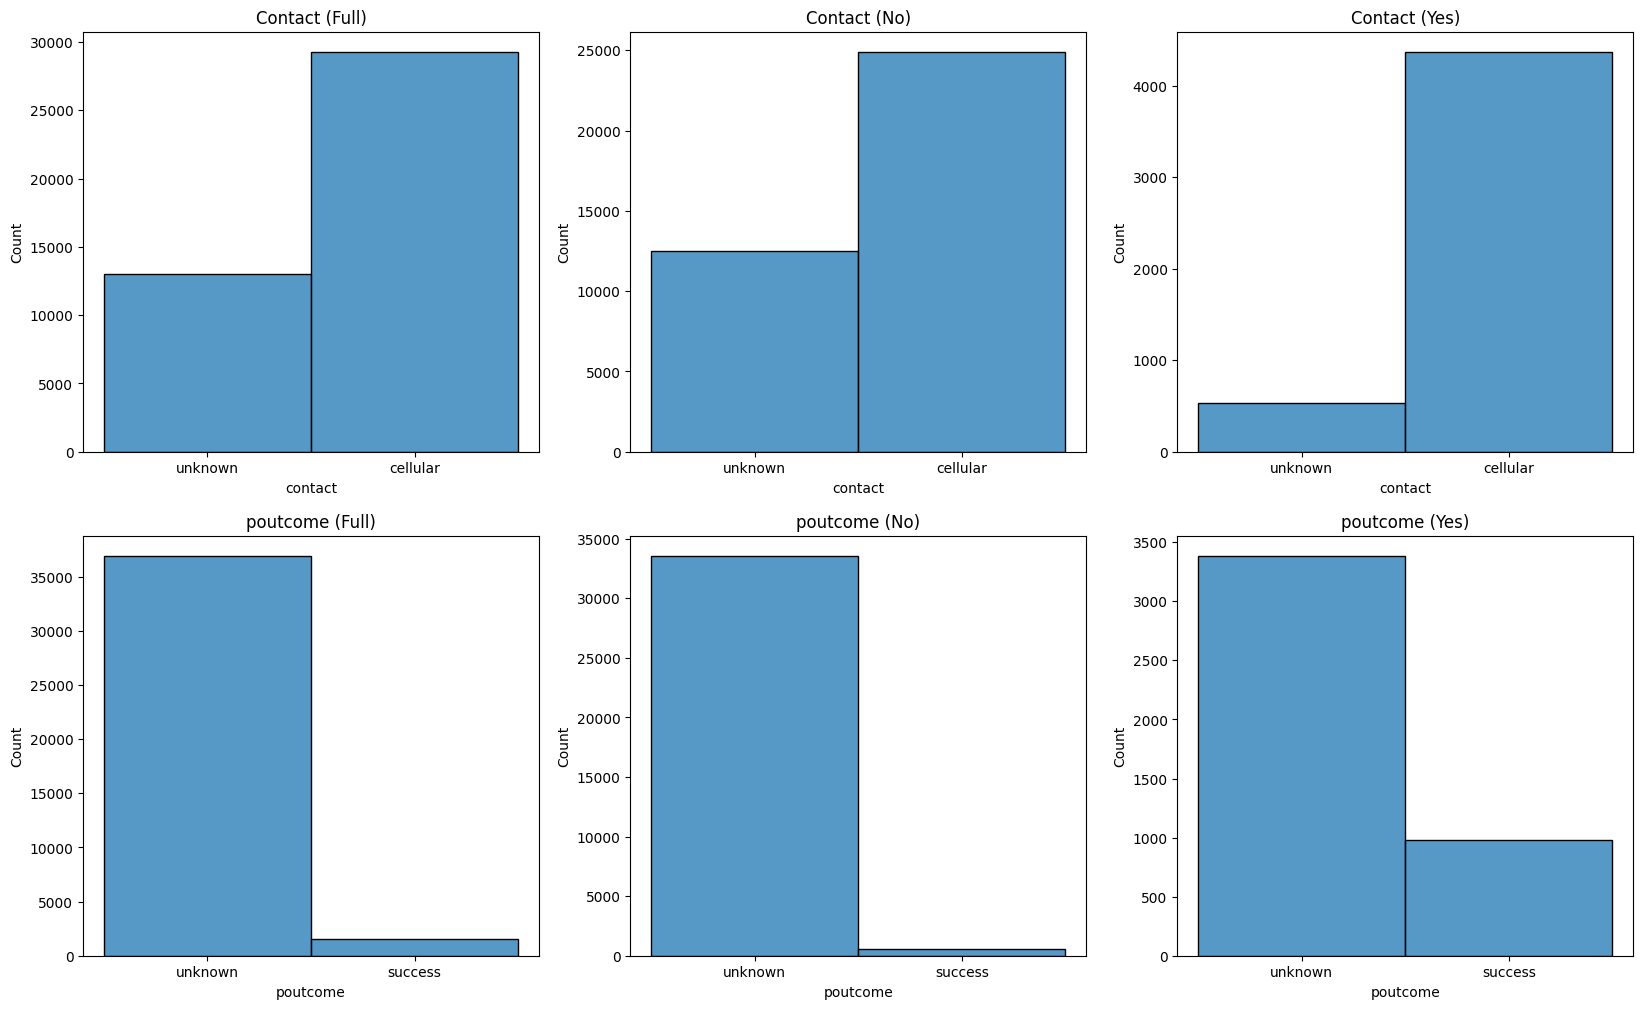

In [448]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.histplot(dfContact['contact'], kde=False)
plt.title('Contact (Full)')
plt.subplot(2, 3, 2)
sns.histplot(dfContactNo['contact'], kde=False)
plt.title('Contact (No)')
plt.subplot(2, 3, 3)
sns.histplot(dfContactYes['contact'], kde=False)
plt.title('Contact (Yes)')
plt.subplot(2, 3, 4)
sns.histplot(dfPoutcome['poutcome'], kde=False)
plt.title('poutcome (Full)')
plt.subplot(2, 3, 5)
sns.histplot(dfPoutcomeNo['poutcome'], kde=False)
plt.title('poutcome (No)')
plt.subplot(2, 3, 6)
sns.histplot(dfPoutcomeYes['poutcome'], kde=False)
plt.title('poutcome (Yes)')

From this figure, we can see that there are "contact" and "poutcome" have different histograms in the separated target class. In "contact", 'unknown' is not visually similar in 'yes' and 'no'. In "poutcome", 'success' is not visually similar in 'yes' and 'no'. Therefore, we will keep these features.

Going back to the selected features, we will drop the "poutcome_unknown" and "contact_cellular" features.

In [451]:
colToDropLowCor = ['job_blue-collar','job_student','job_retired','campaign']

colToDropHighCor = ['poutcome_unknown','contact_cellular']

colToDropLowHighCor = ['job_blue-collar','job_student','job_retired','campaign','poutcome_unknown','contact_cellular']


In [492]:
dfDF_D_L = dfDF.copy()
dfDF_D_H = dfDF.copy()
dfDF_D_LH = dfDF.copy()
dfDF_D_L = dfDF_D_L.drop(colToDropLowCor, axis = 1)
dfDF_D_H = dfDF_D_H.drop(colToDropHighCor, axis = 1)
dfDF_D_LH = dfDF_D_LH.drop(colToDropLowHighCor, axis = 1)

dfDF_Test_D_L = dfDF_Test.copy()
dfDF_Test_D_H = dfDF_Test.copy()
dfDF_Test_D_LH = dfDF_Test.copy()
dfDF_Test_D_L = dfDF_Test_D_L.drop(colToDropLowCor, axis = 1)
dfDF_Test_D_H = dfDF_Test_D_H.drop(colToDropHighCor, axis = 1)
dfDF_Test_D_LH = dfDF_Test_D_LH.drop(colToDropLowHighCor, axis = 1)

In [491]:
dfDF_D_L2 = dfDF2.copy()
dfDF_D_H2 = dfDF2.copy()
dfDF_D_LH2 = dfDF2.copy()
dfDF_D_L2 = dfDF_D_L2.drop(colToDropLowCor, axis = 1)
dfDF_D_H2 = dfDF_D_H2.drop(colToDropHighCor, axis = 1)
dfDF_D_LH2 = dfDF_D_LH2.drop(colToDropLowHighCor, axis = 1)

dfDF_Test_D_L2 = dfDF_Test2.copy()
dfDF_Test_D_H2 = dfDF_Test2.copy()
dfDF_Test_D_LH2 = dfDF_Test2.copy()
dfDF_Test_D_L2 = dfDF_Test_D_L2.drop(colToDropLowCor, axis = 1)
dfDF_Test_D_H2 = dfDF_Test_D_H2.drop(colToDropHighCor, axis = 1)
dfDF_Test_D_LH2 = dfDF_Test_D_LH2.drop(colToDropLowHighCor, axis = 1)

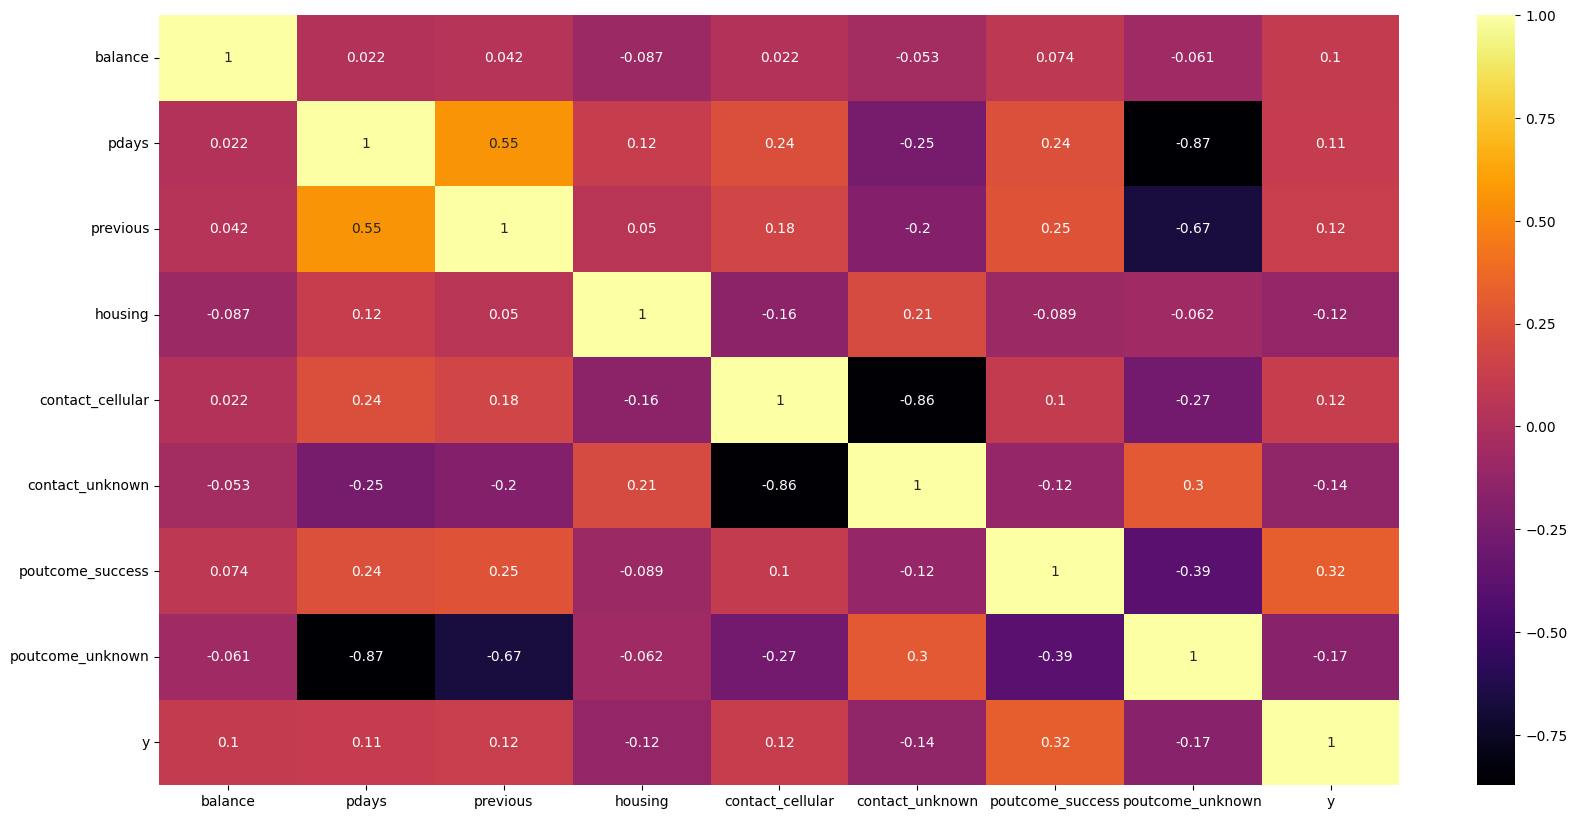

In [452]:
checkCorrFF(dfDF_Test_D_L)

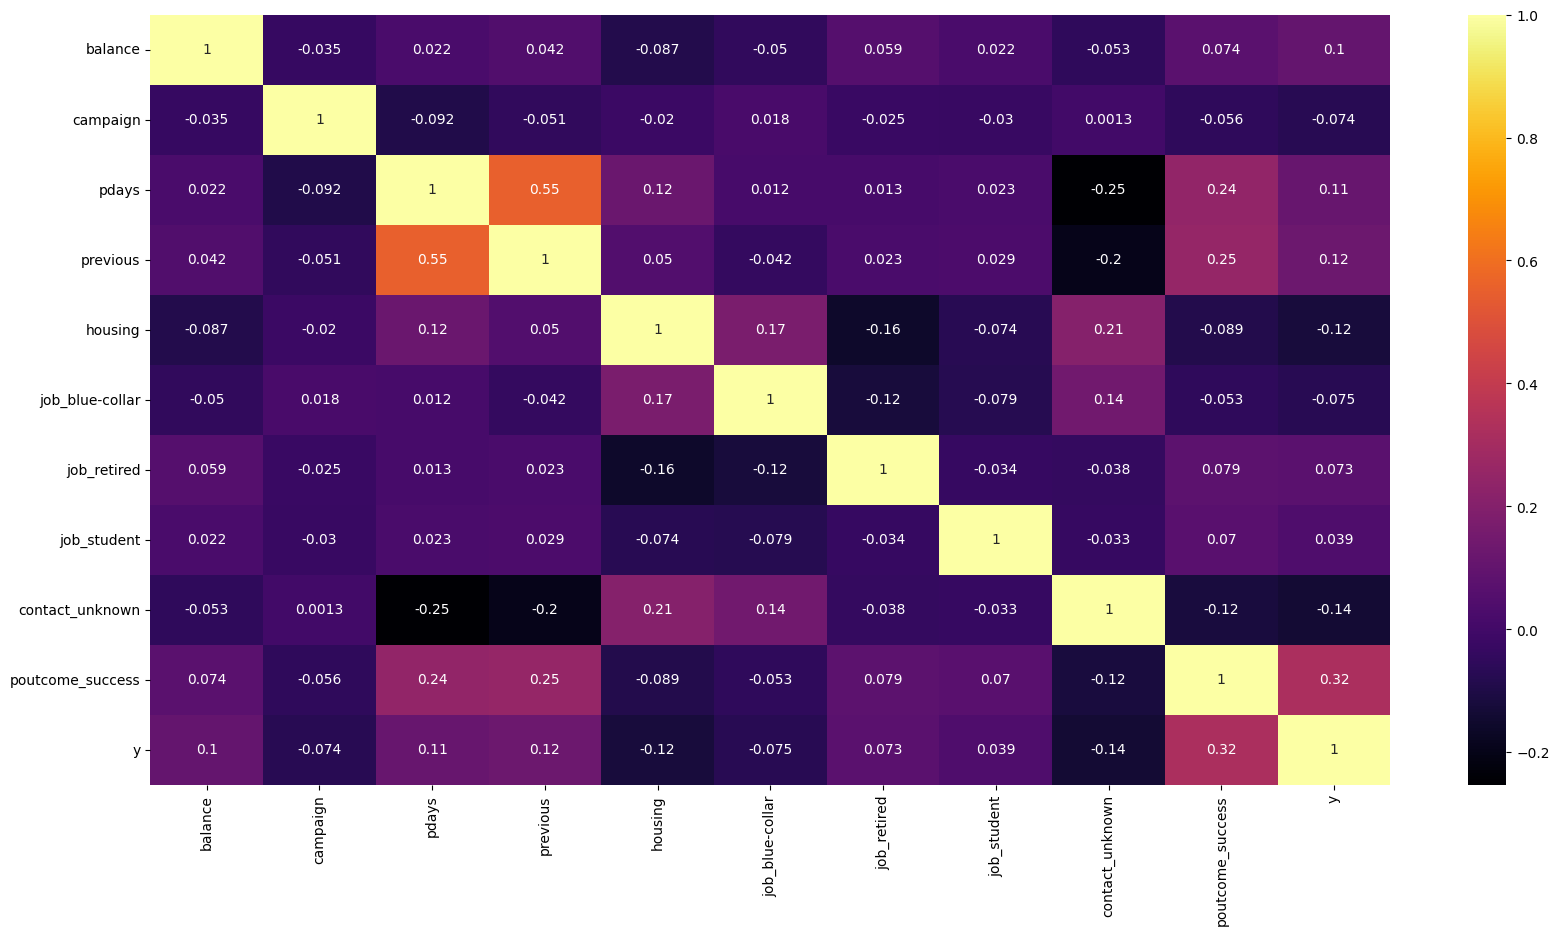

In [453]:
checkCorrFF(dfDF_Test_D_H)

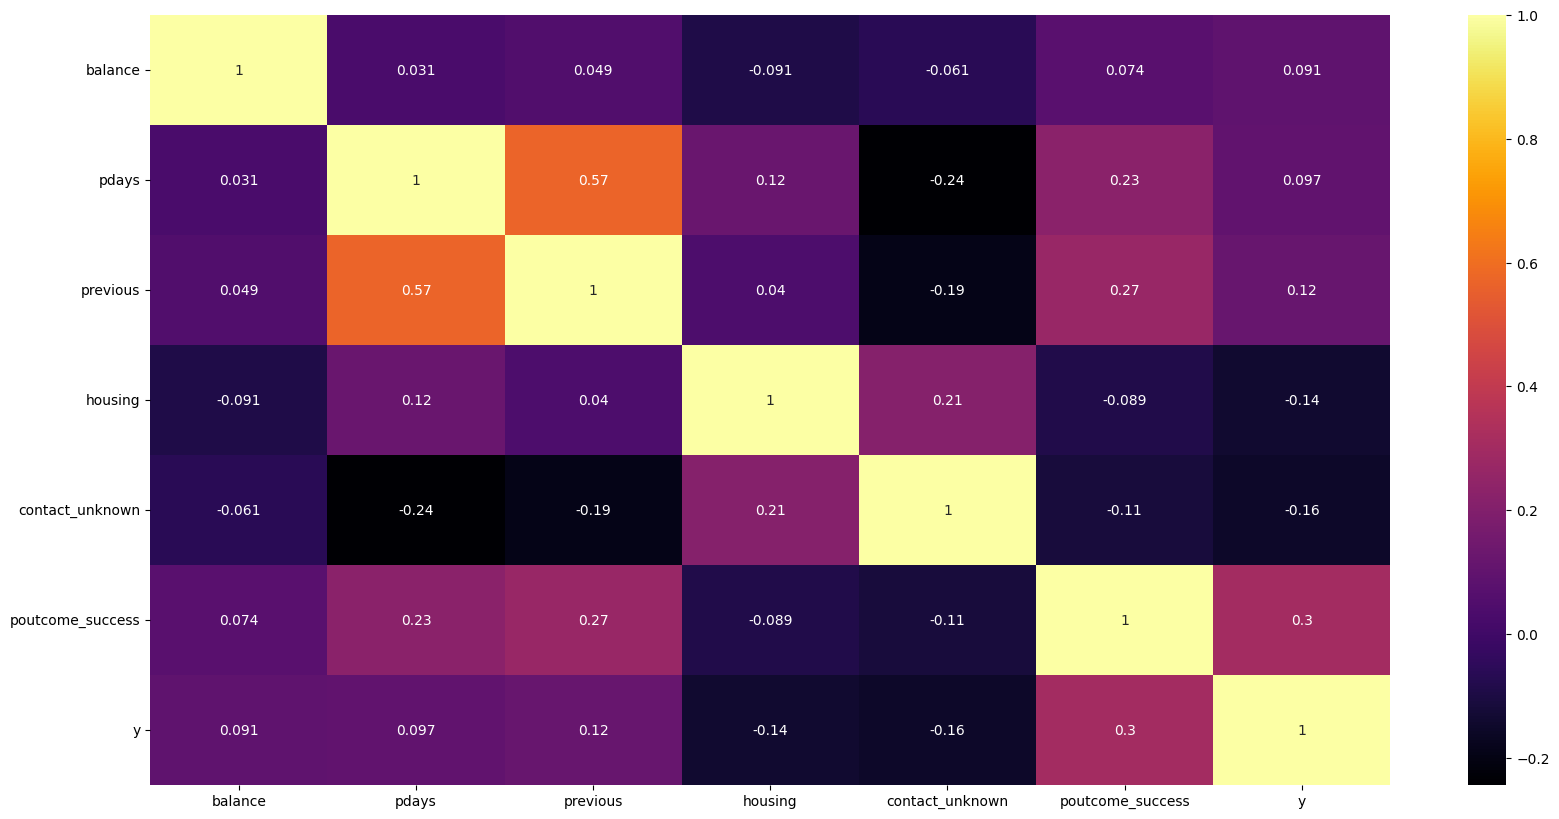

In [454]:
checkCorrFF(dfDF_D_LH)

In [455]:
x_fd_train , y_fd_train, x_fd_test , y_fd_test = dfDF.drop(['y'], axis = 1) , dfDF['y'] , dfDF_Test.drop(['y'], axis = 1) , dfDF_Test['y']
x_fd_train_L , y_fd_train_L, x_fd_test_L , y_fd_test_L = dfDF_D_L.drop(['y'], axis = 1) , dfDF_D_L['y'] , dfDF_Test_D_L.drop(['y'], axis = 1) , dfDF_Test_D_L['y']
x_fd_train_H , y_fd_train_H, x_fd_test_H , y_fd_test_H = dfDF_D_H.drop(['y'], axis = 1) , dfDF_D_H['y'] , dfDF_Test_D_H.drop(['y'], axis = 1) , dfDF_Test_D_H['y']
x_fd_train_LH , y_fd_train_LH, x_fd_test_LH , y_fd_test_LH = dfDF_D_LH.drop(['y'], axis = 1) , dfDF_D_LH['y'] , dfDF_Test_D_LH.drop(['y'], axis = 1) , dfDF_Test_D_LH['y']

In [493]:
x_fd_train2 , y_fd_train2, x_fd_test2 , y_fd_test2 = dfDF2.drop(['y'], axis = 1) , dfDF2['y'] , dfDF_Test2.drop(['y'], axis = 1) , dfDF_Test2['y']
x_fd_train_L2 , y_fd_train_L2, x_fd_test_L2 , y_fd_test_L2 = dfDF_D_L2.drop(['y'], axis = 1) , dfDF_D_L2['y'] , dfDF_Test_D_L2.drop(['y'], axis = 1) , dfDF_Test_D_L2['y']
x_fd_train_H2 , y_fd_train_H2, x_fd_test_H2 , y_fd_test_H2 = dfDF_D_H2.drop(['y'], axis = 1) , dfDF_D_H2['y'] , dfDF_Test_D_H2.drop(['y'], axis = 1) , dfDF_Test_D_H2['y']
x_fd_train_LH2 , y_fd_train_LH2, x_fd_test_LH2 , y_fd_test_LH2 = dfDF_D_LH2.drop(['y'], axis = 1) , dfDF_D_LH2['y'] , dfDF_Test_D_LH2.drop(['y'], axis = 1) , dfDF_Test_D_LH2['y']

In [494]:
x_fd_train.head()

balance  campaign  pdays  previous  housing  job_blue-collar  \
20594  0.363680       1.0    0.0       0.0     -1.0              0.0   
9789   2.006797      -0.5    0.0       0.0     -1.0              1.0   
40855  0.399592       0.0    0.0       0.0     -1.0              0.0   
41107  0.414821      -0.5    0.0       0.0     -1.0              0.0   
33300  0.403003       1.5  335.0       1.0      0.0              0.0   

       job_retired  job_student  contact_cellular  contact_unknown  \
20594          0.0          0.0               0.0              0.0   
9789           0.0          0.0              -1.0              1.0   
40855          0.0          0.0               0.0              0.0   
41107          0.0          0.0               0.0              0.0   
33300          0.0          0.0               0.0              0.0   

       poutcome_success  poutcome_unknown  
20594               0.0               0.0  
9789                0.0               0.0  
40855               0.0               0.0  
41107               0.0               0.0  
33300               0.0              -1.0

In [495]:
x_fd_train_LH.head()

balance  pdays  previous  housing  contact_unknown  poutcome_success
20594  0.363680    0.0       0.0     -1.0              0.0               0.0
9789   2.006797    0.0       0.0     -1.0              1.0               0.0
40855  0.399592    0.0       0.0     -1.0              0.0               0.0
41107  0.414821    0.0       0.0     -1.0              0.0               0.0
33300  0.403003  335.0       1.0      0.0              0.0               0.0

#### **Model Training**

##### **ANOVA**

In [496]:
DT_clf_DF_N = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_N = MLPClassifier(random_state=1)
KN_clf_DF_N = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_N.fit(x_fd_train, y_fd_train)
MLP_clf_DF_N.fit(x_fd_train, y_fd_train)
KN_clf_DF_N.fit(x_fd_train2, y_fd_train2)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_N.score(x_fd_test, y_fd_test))
print("MLP Classifier Accuracy: ", MLP_clf_DF_N.score(x_fd_test, y_fd_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_N.score(x_fd_test2, y_fd_test2))

Decision Tree Classifier Accuracy:  0.8339795070617557
MLP Classifier Accuracy:  0.8954583217945168
KNeighbors Classifier Accuracy:  0.8837930652486984


In [497]:
yFD_pred_test1 = DT_clf_DF_N.predict(x_fd_test)
yFD_pred_test2 = MLP_clf_DF_N.predict(x_fd_test)
yFD_pred_test3 = KN_clf_DF_N.predict(x_fd_test2)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test2, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6387
           1       0.27      0.25      0.26       835

    accuracy                           0.83      7222
   macro avg       0.58      0.58      0.58      7222
weighted avg       0.83      0.83      0.83      7222

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6387
           1       0.67      0.19      0.30       835

    accuracy                           0.90      7222
   macro avg       0.78      0.59      0.62      7222
weighted avg       0.88      0.90      0.87      7222

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7989
           1       0.49      0.20      0.28      1038

    acc

##### **Drop Low Correltation with Output**

In [498]:
DT_clf_DF_L = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_L = MLPClassifier(random_state=1)
KN_clf_DF_L = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
MLP_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
KN_clf_DF_L.fit(x_fd_train_L2, y_fd_train_L2)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_L.score(x_fd_test_L, y_fd_test_L))
print("MLP Classifier Accuracy: ", MLP_clf_DF_L.score(x_fd_test_L, y_fd_test_L))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_L.score(x_fd_test_L2, y_fd_test_L2))

Decision Tree Classifier Accuracy:  0.8504569371365273
MLP Classifier Accuracy:  0.8955967875934644
KNeighbors Classifier Accuracy:  0.8829068350504043


In [499]:
yFD_pred_test1 = DT_clf_DF_L.predict(x_fd_test_L)
yFD_pred_test2 = MLP_clf_DF_L.predict(x_fd_test_L)
yFD_pred_test3 = KN_clf_DF_L.predict(x_fd_test_L2)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L2, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      6387
           1       0.30      0.21      0.25       835

    accuracy                           0.85      7222
   macro avg       0.60      0.57      0.58      7222
weighted avg       0.83      0.85      0.84      7222

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6387
           1       0.73      0.15      0.25       835

    accuracy                           0.90      7222
   macro avg       0.82      0.57      0.60      7222
weighted avg       0.88      0.90      0.86      7222

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7989
           1       0.48      0.19      0.27      1038

    acc

##### **Drop High Correltation with other Feature**

In [500]:
DT_clf_DF_H = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_H = MLPClassifier(random_state=1)
KN_clf_DF_H = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
MLP_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
KN_clf_DF_H.fit(x_fd_train_H2, y_fd_train_H2)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_H.score(x_fd_test_H, y_fd_test_H))
print("MLP Classifier Accuracy: ", MLP_clf_DF_H.score(x_fd_test_H, y_fd_test_H))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_H.score(x_fd_test_H2, y_fd_test_H2))

Decision Tree Classifier Accuracy:  0.8346718360564941
MLP Classifier Accuracy:  0.8953198559955691
KNeighbors Classifier Accuracy:  0.8836822864739116


In [501]:
yFD_pred_test1 = DT_clf_DF_H.predict(x_fd_test_H)
yFD_pred_test2 = MLP_clf_DF_H.predict(x_fd_test_H)
yFD_pred_test3 = KN_clf_DF_H.predict(x_fd_test_H2)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H2, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6387
           1       0.27      0.25      0.26       835

    accuracy                           0.83      7222
   macro avg       0.58      0.58      0.58      7222
weighted avg       0.83      0.83      0.83      7222

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6387
           1       0.73      0.15      0.25       835

    accuracy                           0.90      7222
   macro avg       0.82      0.57      0.60      7222
weighted avg       0.88      0.90      0.86      7222

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7989
           1       0.49      0.19      0.28      1038

    acc

##### **Drop Low Correltation with Output and High Correltation with other Feature**

In [502]:
DT_clf_DF_LH = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_LH = MLPClassifier(random_state=1)
KN_clf_DF_LH = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
MLP_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
KN_clf_DF_LH.fit(x_fd_train_LH2, y_fd_train_LH2)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))
print("MLP Classifier Accuracy: ", MLP_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_LH.score(x_fd_test_LH2, y_fd_test_LH2))

Decision Tree Classifier Accuracy:  0.8533647189144281
MLP Classifier Accuracy:  0.8882581002492385
KNeighbors Classifier Accuracy:  0.8820206048521103


In [503]:
yFD_pred_test1 = DT_clf_DF_LH.predict(x_fd_test_LH)
yFD_pred_test2 = MLP_clf_DF_LH.predict(x_fd_test_LH)
yFD_pred_test3 = KN_clf_DF_LH.predict(x_fd_test_LH2)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH2, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6387
           1       0.30      0.21      0.25       835

    accuracy                           0.85      7222
   macro avg       0.60      0.57      0.58      7222
weighted avg       0.83      0.85      0.84      7222

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6387
           1       0.68      0.06      0.12       835

    accuracy                           0.89      7222
   macro avg       0.78      0.53      0.53      7222
weighted avg       0.87      0.89      0.85      7222

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7989
           1       0.47      0.19      0.27      1038

    acc

#### **Conclusion**

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.91|0.91|0.83|Decision Tree|ANOVA|
|1|0.27|0.25|0.26|^|Decision Tree|ANOVA|
|0|0.90|0.99|0.94|0.90|MLP|ANOVA|
|1|0.67|0.19|0.30|^|MLP|ANOVA|
|0|0.90|0.97|0.94|0.88|K-Nearest|ANOVA|
|1|0.49|0.20|0.28|^|K-Nearest|ANOVA|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.93|0.92|0.85|Decision Tree|Drop Low|
|1|0.30|0.21|0.25|^|Decision Tree|Drop Low|
|0|0.90|0.99|0.94|0.90|MLP|Drop Low|
|1|0.73|0.15|0.25|^|MLP|Drop Low|
|0|0.90|0.97|0.94|0.88|K-Nearest|Drop Low|
|1|0.48|0.19|0.27|^|K-Nearest|Drop Low|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.91|0.91|0.83|Decision Tree|Drop High|
|1|0.27|0.25|0.26|^|Decision Tree|Drop High|
|0|0.90|0.99|0.94|0.90|MLP|Drop High|
|1|0.73|0.15|0.25|^|MLP|Drop High|
|0|0.90|0.97|0.94|0.88|K-Nearest|Drop High|
|1|0.49|0.19|0.28|^|K-Nearest|Drop High|

<br>

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.90|0.94|0.92|0.85|Decision Tree|Drop Both|
|1|0.30|0.21|0.25|^|Decision Tree|Drop Both|
|0|0.89|1.00|0.94|0.89|MLP|Drop Both|
|1|0.68|0.06|0.12|^|MLP|Drop Both|
|0|0.90|0.97|0.94|0.88|K-Nearest|Drop Both|
|1|0.47|0.19|0.27|^|K-Nearest|Drop Both|

<br>

Results showed that reducing features (that are highly correlated with other features and lowly correlated with the output) after using ANOVA to select features not improved the results. So we will consider using all features from ANOVA.   

In [517]:
dfBase.describe()

balance      campaign         pdays      previous       housing  \
count  28886.000000  28886.000000  28886.000000  28886.000000  28886.000000   
mean      -0.026350      0.368656     41.124109      0.556498     -0.444091   
std        0.926622      1.460799     99.996508      1.740926      0.496873   
min       -3.900728     -0.500000      0.000000      0.000000     -1.000000   
25%       -0.486878     -0.500000      0.000000      0.000000     -1.000000   
50%        0.001603      0.000000      0.000000      0.000000      0.000000   
75%        0.515128      0.500000      0.000000      0.000000      0.000000   
max        3.941159     18.500000    872.000000     29.000000      0.000000   

       job_blue-collar   job_retired   job_student  contact_cellular  \
count     28886.000000  28886.000000  28886.000000      28886.000000   
mean          0.213217      0.049609      0.019698         -0.348439   
std           0.409587      0.217139      0.138963          0.476484   
min           0.000000      0.000000      0.000000         -1.000000   
25%           0.000000      0.000000      0.000000         -1.000000   
50%           0.000000      0.000000      0.000000          0.000000   
75%           0.000000      0.000000      0.000000          0.000000   
max           1.000000      1.000000      1.000000          0.000000   

       contact_unknown  poutcome_success  poutcome_unknown             y  
count     28886.000000      28886.000000      28886.000000  28886.000000  
mean          0.284532          0.033511         -0.182303      0.117531  
std           0.451199          0.179970          0.386101      0.322058  
min           0.000000          0.000000         -1.000000      0.000000  
25%           0.000000          0.000000          0.000000      0.000000  
50%           0.000000          0.000000          0.000000      0.000000  
75%           1.000000          0.000000          0.000000      0.000000  
max           1.000000          1.000000          0.000000      1.000000

In [513]:
dfBase2.describe()

balance      campaign         pdays      previous       housing  \
count  36108.000000  36108.000000  36108.000000  36108.000000  36108.000000   
mean       0.492378      0.045943      0.046938      0.019206      0.557771   
std        0.117539      0.078171      0.114408      0.060406      0.496658   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.433672      0.000000      0.000000      0.000000      0.000000   
50%        0.496317      0.026316      0.000000      0.000000      1.000000   
75%        0.560696      0.052632      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       job_blue-collar  job_retired   job_student  contact_cellular  \
count     36108.000000  36108.00000  36108.000000      36108.000000   
mean          0.215132      0.04974      0.020051          0.648721   
std           0.410920      0.21741      0.140177          0.477377   
min           0.000000      0.00000      0.000000          0.000000   
25%           0.000000      0.00000      0.000000          0.000000   
50%           0.000000      0.00000      0.000000          1.000000   
75%           0.000000      0.00000      0.000000          1.000000   
max           1.000000      1.00000      1.000000          1.000000   

       contact_unknown  poutcome_success  poutcome_unknown             y  
count     36108.000000      36108.000000      36108.000000  36108.000000  
mean          0.286779          0.033344          0.818489      0.117149  
std           0.452264          0.179537          0.385446      0.321602  
min           0.000000          0.000000          0.000000      0.000000  
25%           0.000000          0.000000          1.000000      0.000000  
50%           0.000000          0.000000          1.000000      0.000000  
75%           1.000000          0.000000          1.000000      0.000000  
max           1.000000          1.000000          1.000000      1.000000

In [518]:
dfNN = dfBase.copy()
dfKNN = dfBase2.copy()
dfNN.to_csv('preprocessed.csv', index=False)
dfKNN.to_csv('preprocessed2.csv', index=False)

<hr>

## **Model Training Experiment**

In [521]:
dfNN = pd.read_csv('preprocessed.csv')
X = dfNN.drop(['y'], axis=1)
y = dfNN['y']

x_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [523]:
dfNN.describe()

balance      campaign         pdays      previous       housing  \
count  28886.000000  28886.000000  28886.000000  28886.000000  28886.000000   
mean      -0.026350      0.368656     41.124109      0.556498     -0.444091   
std        0.926622      1.460799     99.996508      1.740926      0.496873   
min       -3.900728     -0.500000      0.000000      0.000000     -1.000000   
25%       -0.486878     -0.500000      0.000000      0.000000     -1.000000   
50%        0.001603      0.000000      0.000000      0.000000      0.000000   
75%        0.515128      0.500000      0.000000      0.000000      0.000000   
max        3.941159     18.500000    872.000000     29.000000      0.000000   

       job_blue-collar   job_retired   job_student  contact_cellular  \
count     28886.000000  28886.000000  28886.000000      28886.000000   
mean          0.213217      0.049609      0.019698         -0.348439   
std           0.409587      0.217139      0.138963          0.476484   
min           0.000000      0.000000      0.000000         -1.000000   
25%           0.000000      0.000000      0.000000         -1.000000   
50%           0.000000      0.000000      0.000000          0.000000   
75%           0.000000      0.000000      0.000000          0.000000   
max           1.000000      1.000000      1.000000          0.000000   

       contact_unknown  poutcome_success  poutcome_unknown             y  
count     28886.000000      28886.000000      28886.000000  28886.000000  
mean          0.284532          0.033511         -0.182303      0.117531  
std           0.451199          0.179970          0.386101      0.322058  
min           0.000000          0.000000         -1.000000      0.000000  
25%           0.000000          0.000000          0.000000      0.000000  
50%           0.000000          0.000000          0.000000      0.000000  
75%           1.000000          0.000000          0.000000      0.000000  
max           1.000000          1.000000          0.000000      1.000000

### **Experiment 6 : Trees Classifier**

#### **Decision Tree Classifier**

In [524]:
DT_param = [{'criterion': ['entropy', 'gini', 'log_loss'],
               'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]},
              {'min_samples_leaf': [2,3,4,5]}
              ]

DT_clf = DecisionTreeClassifier(random_state=0)

grid_DT_clf = GridSearchCV(DT_clf
                       ,DT_param
                       ,cv=10
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_DT_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_DT_clf.best_params_)
print("f1 :",grid_DT_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2}
f1 : 0.2869707558259665


In [525]:
DT_clf  = DecisionTreeClassifier(random_state=0,
                                 criterion=grid_DT_clf.best_params_['criterion'],
                                 max_depth=grid_DT_clf.best_params_['max_depth'],
                                 )

DT_clf.fit(x_train, y_train)

y_pred_test = DT_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5096
           1       0.63      0.18      0.28       682

    accuracy                           0.89      5778
   macro avg       0.76      0.58      0.61      5778
weighted avg       0.87      0.89      0.86      5778



#### **Extra Trees Classifier**

In [475]:
ET_param = [{
             'criterion': ['entropy', 'gini', 'log_loss'],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            }]

ET_clf = ExtraTreesClassifier(random_state=0)

grid_ET_clf = GridSearchCV(ET_clf
                       ,ET_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_ET_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_ET_clf.best_params_)
print("f1 :",grid_ET_clf.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8}
f1 : 0.27698663695479653


In [476]:
ET_clf = ExtraTreesClassifier(random_state=0,
                            criterion=grid_ET_clf.best_params_['criterion'],
                            max_depth=grid_ET_clf.best_params_['max_depth'],
                            )

ET_clf.fit(x_train, y_train)

y_pred_test = ET_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))        

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6387
           1       0.69      0.18      0.28       835

    accuracy                           0.90      7222
   macro avg       0.79      0.58      0.61      7222
weighted avg       0.88      0.90      0.87      7222



#### **Random Forest Classifier**

In [477]:
RF_param = [{
            # 'n_estimators' : [50, 100, 200],
            'criterion': ['entropy', 'gini', 'log_loss'],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            }]

RF_clf = RandomForestClassifier(random_state=0)

grid_RF_clf = GridSearchCV(RF_clf
                       ,RF_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)
                           
grid_RF_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_RF_clf.best_params_)
print("f1 :",grid_RF_clf.best_score_)                          

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
f1 : 0.2749328418111679


In [478]:
RF_clf = RandomForestClassifier(random_state=0,
                            criterion=grid_RF_clf.best_params_['criterion'],
                            max_depth=grid_RF_clf.best_params_['max_depth'],
                            )

RF_clf.fit(x_train, y_train)


y_pred_test = RF_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))                                  

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6387
           1       0.69      0.18      0.29       835

    accuracy                           0.90      7222
   macro avg       0.80      0.59      0.62      7222
weighted avg       0.88      0.90      0.87      7222



#### **Gradient Boosting Classifier**

In [479]:
GB_param = [{'loss': ['deviance', 'exponential', 'log_loss'],
             'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1],
             'subsample' : [0.1, 0.2, 0.3, 0.5, 0.7, 1],
             'criterion' : ['friedman_mse', 'squared_error', 'mse'],
}]

GB_clf = GradientBoostingClassifier(random_state=0)

grid_GB_clf = GridSearchCV(GB_clf,
                           GB_param,
                           cv = 4,
                           scoring='f1',
                            n_jobs=-1,)

grid_GB_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_GB_clf.best_params_)
print("f1 :",grid_GB_clf.best_score_)

KeyboardInterrupt: 

In [ ]:
GB_clf = GradientBoostingClassifier(random_state=0,
                                    criterion=grid_GB_clf.best_params_['criterion'],
                                    learning_rate=grid_GB_clf.best_params_['learning_rate'],
                                    loss=grid_GB_clf.best_params_['loss'],
                                    subsample=grid_GB_clf.best_params_['subsample'],
                                    )

GB_clf.fit(x_train, y_train)

y_pred_test = GB_clf.predict(x_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7989
           1       0.54      0.18      0.27      1038

    accuracy                           0.89      9027
   macro avg       0.72      0.58      0.60      9027
weighted avg       0.86      0.89      0.86      9027



#### **Conclusion**

### **Experiment 7 : Neural Network**

#### **Multi-Layer Perceptron**

In [ ]:
MLP_param1 = [{
            'solver': ['lbfgs', 'sgd', 'adam'],
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'learning_rate_init': [0.001, 0.01, 0.1, 1],
}]

MLP_param2 = [{
    'hidden_layer_sizes': [(50,),(100,),(150,),(200,),(250,),(300,),(350,),(400,),(450,),(500,),(550,),(600,),(650,),(700,),(750,),(800,),(850,),(900,),(950,),(1000,),
                           (50,50),(50,50,50),(50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50),
                           (100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100),(100,100,100,100,100,100),(100,100,100,100,100,100,100),(100,100,100,100,100,100,100,100),(100,100,100,100,100,100,100,100,100),
                           (14,14),(14,14,14),(14,14,14,14),(14,14,14,14,14),(14,14,14,14,14,14),(14,14,14,14,14,14,14),(14,14,14,14,14,14,14,14),(14,14,14,14,14,14,14,14,14),
                           (28,28),(28,28,28),(28,28,28,28),(28,28,28,28,28),(28,28,28,28,28,28),(28,28,28,28,28,28,28),(28,28,28,28,28,28,28,28),(28,28,28,28,28,28,28,28,28),
                           (100,),(100,100,),(50,50,),(50,50,25),(100,100,100,), (100,100,100,100,),(7,),(7,100),(7,100,100),(7,100,100,100),
                           (7,50,50,50),(7,50,50,50,50),(7,50,50,50,50,50),(7,50,50,50,50,50,50),(7,50,50,50,50,50,50,50),(7,50,50,50,50,50,50,50,50),],
}]

MLP_clf = MLPClassifier(random_state=1, verbose=True)

grid_MLP_clf = GridSearchCV(MLP_clf,
                           MLP_param2,
                           cv = 2,
                           scoring='average_precision',
                            n_jobs=-1,
                            verbose= 3)

# The of MLP_param1 is {solver='adam', alpha=0.01, learning_rate='constant', learning_rate_init=0.01}
# The of MLP_param2 is {'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100)    

In [ ]:
grid_MLP_clf.fit(x_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grid_MLP_clf.best_params_)
print("f1 :",grid_MLP_clf.best_score_)

Fitting 2 folds for each of 68 candidates, totalling 136 fits
Iteration 1, loss = 0.36289613
Iteration 2, loss = 0.33699893
Iteration 3, loss = 0.33624218
Iteration 4, loss = 0.33559419
Iteration 5, loss = 0.33409458
Iteration 6, loss = 0.33573250
Iteration 7, loss = 0.33398264
Iteration 8, loss = 0.33197218
Iteration 9, loss = 0.32775667
Iteration 10, loss = 0.32615082
Iteration 11, loss = 0.32479280
Iteration 12, loss = 0.32307728
Iteration 13, loss = 0.32100977
Iteration 14, loss = 0.32167690
Iteration 15, loss = 0.32132851
Iteration 16, loss = 0.32093655
Iteration 17, loss = 0.31957256
Iteration 18, loss = 0.31999056
Iteration 19, loss = 0.32014371
Iteration 20, loss = 0.31963745
Iteration 21, loss = 0.31904955
Iteration 22, loss = 0.31886688
Iteration 23, loss = 0.32010067
Iteration 24, loss = 0.31983758
Iteration 25, loss = 0.31932958
Iteration 26, loss = 0.31972020
Iteration 27, loss = 0.31881921
Iteration 28, loss = 0.31897503
Iteration 29, loss = 0.31843959
Iteration 30, loss 

In [ ]:
MLP_clf1 = MLPClassifier(random_state=1,
                         verbose=False,
                        warm_start=True,
                        )

MLP_clf1.fit(x_train, y_train)

y_pred_test = MLP_clf1.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7989
           1       0.68      0.13      0.21      1038

    accuracy                           0.89      9027
   macro avg       0.79      0.56      0.58      9027
weighted avg       0.87      0.89      0.86      9027



In [ ]:
MLP_clf2 = MLPClassifier(random_state=1,
                        verbose = False,
                        solver='adam',
                        learning_rate='constant',
                        learning_rate_init = 0.01,
                        alpha=0.01,
                        hidden_layer_sizes=(7,100),
                        warm_start=True,
                        )

MLP_clf2.fit(x_train, y_train)

y_pred_test = MLP_clf2.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7989
           1       0.64      0.17      0.27      1038

    accuracy                           0.89      9027
   macro avg       0.77      0.58      0.61      9027
weighted avg       0.87      0.89      0.87      9027



In [ ]:
MLP_clf3 = MLPClassifier(random_state=1,
                         verbose=False,
                         hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
                        warm_start=True,
                        )

MLP_clf3.fit(x_train, y_train)

y_pred_test = MLP_clf3.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7989
           1       0.64      0.19      0.29      1038

    accuracy                           0.89      9027
   macro avg       0.77      0.59      0.62      9027
weighted avg       0.87      0.89      0.87      9027



In [ ]:
MLP_clf4 = MLPClassifier(random_state=1,
                         verbose=False,
                        solver='adam',
                        learning_rate='constant',
                        learning_rate_init = 0.01,
                        alpha=0.01,
                        hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100),
                        warm_start=True,
                        )

MLP_clf4.fit(x_train, y_train)

y_pred_test = MLP_clf4.predict(x_test)

print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

#### **Keras Neural Network**

In [ ]:
tf.random.set_seed(0)

In [ ]:
def createModel(units, name, compilerFlag):
    model = Sequential(name=name)
    if len(units) > 1:
        model.add(Dense(units[0], input_shape=(x_train.shape[1],), activation='relu'))
        if len(units) > 2:
            for unt in units[1:-1]:
                model.add(Dense(unt, activation='relu'))
        model.add(Dense(units[len(units)-1], activation='sigmoid'))
    else:
        model.add(Dense(units[0], input_shape=(x_train.shape[1],), activation='sigmoid'))
    
    if compilerFlag == 0:
        model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
kerasNN_model1 = createModel([100, 50, 25, 5, 1], 'kerasNN_model1', 0)
kerasNN_model2 = createModel([20, 12, 6, 1], 'kerasNN_model2', 0)
kerasNN_model3 = createModel([100, 50, 25, 5, 1], 'kerasNN_model3', 1)
kerasNN_model4 = createModel([20, 12, 6, 1], 'kerasNN_model4', 1)
kerasNN_model1.summary()
kerasNN_model2.summary()
kerasNN_model3.summary()
kerasNN_model4.summary()

In [ ]:
historyKeras_1 = kerasNN_model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)
historyKeras_2 = kerasNN_model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)
historyKeras_3 = kerasNN_model3.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)
historyKeras_4 = kerasNN_model4.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=0, use_multiprocessing=True)

In [ ]:
kerasNN_model1_pred = (kerasNN_model1.predict(x_test)).round().astype(int)
kerasNN_model2_pred = (kerasNN_model2.predict(x_test)).round().astype(int)
kerasNN_model3_pred = (kerasNN_model3.predict(x_test)).round().astype(int)
kerasNN_model4_pred = (kerasNN_model4.predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Model 1\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model1_pred))
print("Classification report on Test data with Keras NN Model 2\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model2_pred))
print("Classification report on Test data with Keras NN Model 3\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model3_pred))
print("Classification report on Test data with Keras NN Model 4\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_model4_pred))
# np.asarray(np.unique(kerasNN_model1_pred, return_counts=True)).T

In [ ]:
def createModel_tuner(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                        min_value=32,
                                        max_value=512,
                                        step=32),
                            activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    createModel_tuner,
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='suffer')

tuner.search_space_summary()

In [ ]:
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

In [ ]:
tuner.results_summary(num_trials=3)

In [ ]:
def createModel_tuner2(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                        min_value=16,
                                        max_value=512,
                                        step=32),
                            activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tunerAdam = RandomSearch(
    createModel_tuner2,
    objective='val_accuracy',
    max_trials=5,
    directory='project',
    project_name='sufferAdam')

tunerAdam.search_space_summary()

In [ ]:
tunerAdam.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

In [ ]:
tunerAdam.results_summary(num_trials=3)

In [ ]:
kerasNN_adam_pred = (tunerAdam.get_best_models()[0].predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Model with Adam Optimizer\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_adam_pred))

In [ ]:
def createModel_tuned(IL, HL):
    model = Sequential(name="Tuned_Model")
    model.add(Dense(IL, input_shape=(x_train.shape[1],), activation='relu', name="Input_Layer"))
    for c, i in enumerate(HL):
        model.add(Dense(units=i, activation='relu', name=f'Hidden_Layer_{c}'))
    model.add(Dense(1, activation='sigmoid', name="Output_Layer"))
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuned_model = createModel_tuned(512, [448, 384, 320, 256, 192, 128, 64, 32, 16, 8])
tuned_model.summary()

In [ ]:
history_tuned = tuned_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), use_multiprocessing=True)

In [ ]:
# Get training and test loss histories
training_loss = history_tuned.history['loss']
test_loss = history_tuned.history['val_loss']
training_acc = history_tuned.history['accuracy']
test_acc = history_tuned.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
kerasNN_tuned_pred = (tuned_model.predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Tuned Model\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_tuned_pred))

In [ ]:
tuned_model2 = createModel_tuned(64, [16])
tuned_model2.summary()

In [ ]:
history_tuned2 = tuned_model2.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), use_multiprocessing=True)

In [ ]:
# Get training and test loss histories
training_loss = history_tuned2.history['loss']
test_loss = history_tuned2.history['val_loss']
training_acc = history_tuned2.history['accuracy']
test_acc = history_tuned2.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
kerasNN_tuned2_pred = (tuned_model2.predict(x_test)).round().astype(int)
print("Classification report on Test data with Keras NN Tuned Model 2\n=======================")
print(classification_report(y_true=y_test, y_pred=kerasNN_tuned2_pred))

### **Experiment 8 : Supervised Neighbors Classifier**

#### **KNeighbors Classifier**

In [ ]:
KN_param = [{ 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              }]

KN_clf = KNeighborsClassifier(n_jobs=-1)

grid_KN_clf = GridSearchCV(KN_clf
                       ,KN_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_KN_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_KN_clf.best_params_)
print("f1 :",grid_KN_clf.best_score_)

In [ ]:
KN_clf = KNeighborsClassifier(n_neighbors=grid_KN_clf.best_params_['n_neighbors'],
                              algorithm=grid_KN_clf.best_params_['algorithm'],
                              leaf_size=grid_KN_clf.best_params_['leaf_size'],
                              weights=grid_KN_clf.best_params_['weights'],
                              n_jobs=-1
                              )

KN_clf.fit(x_train, y_train)

y_pred_test = KN_clf.predict(x_test)

print("Classification report on Test data with K Neighbors Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

#### **Radius Neighbors Classifier**

In [ ]:
# RN_param = [{ 'radius' : [1, 2],
#              'weights' : ['uniform', 'distance'],
#              'leaf_size' : [20, 30],
#               }]
# RN_clf = RadiusNeighborsClassifier(n_jobs=-1)

# grid_RN_clf = GridSearchCV(RN_clf
#                        ,RN_param
#                        ,cv=4
#                        ,scoring='f1'
#                        ,n_jobs=-1)

# grid_RN_clf.fit(x_train, y_train)
# print("tuned hpyerparameters :(best parameters) ",grid_RN_clf.best_params_)
# print("f1 :",grid_RN_clf.best_score_)

In [ ]:
RN_clf = RadiusNeighborsClassifier(n_jobs=-1 , radius=15)

RN_clf.fit(x_train, y_train)

y_pred_test = RN_clf.predict(x_test)

print("Classification report on Test data with Radius Neighbors Classifier\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

#### **Nearest Centroid**

In [ ]:
NC_param = [{ 'shrink_threshold' : [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1],
             }]

NC_clf = NearestCentroid()

grid_NC_clf = GridSearchCV(NC_clf
                       ,NC_param
                       ,cv=4
                       ,scoring='f1'
                       ,n_jobs=-1)

grid_NC_clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_NC_clf.best_params_)
print("f1 :",grid_NC_clf.best_score_)

In [ ]:
NC_clf = NearestCentroid(shrink_threshold=grid_NC_clf.best_params_['shrink_threshold'])

NC_clf.fit(x_train, y_train)

y_pred_test = NC_clf.predict(x_test)

print("Classification report on Test data with Nearest Centroid\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test)) 

# Test code

In [ ]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None,**transform_params):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None, **fit_params):
        return self 


In [ ]:
toEncode = [["single","married","divorced"], ["unknown","primary","secondary","tertiary"]]
columnToEncode = ['marital', 'education']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode))
])

In [ ]:
drop_features = ['duration']
# drop_transformer = ColumnTransformer(transformers=['drop_columns', 'drop', drop_features], remainder='passthrough')
drop_pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(drop_features))
])

In [ ]:
dfpipe = dfOri.copy()

numeric_features = dfpipe.select_dtypes(include=['int64', 'float64']).columns.drop('duration')

categorical_features = dfpipe.select_dtypes(include=['object']).drop(['y'], axis=1).columns

numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant')),
      ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

pipeline_tree = Pipeline(steps = [
            ('drop', drop_pipeline),
            ('preprocessor', preprocessor),
            ('regressor',DecisionTreeClassifier())
           ])

In [ ]:
x = dfpipe.drop(['y'], axis = 1)
y = dfpipe['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf_tree = pipeline_tree.fit(x_train, y_train)

# clf = DecisionTreeClassifier()
# clf.fit(clf_tree.transform(x_train), y_train)
y_pred = clf_tree.predict(x_test)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix on Train data\n=======================")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
clf_tree

In [ ]:
# check unknown values
dfOri.isnull().sum()